# Python Class Project  
## House Price Prediction

### Project Description
> The objective is to predict house prices in the city of Ames, Iowa based on the dataset provided

### Importing Libraries

In [1142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Setting Options and Seed
> We need to set the option to display all the columns as Python, by default, skips a certain number of columns in the middle of the dataset
> We also need to set a seed for random generator so as to replicate our results.

In [1143]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_colwidth', 500)
pd.options.mode.chained_assignment = None

In [1144]:
np.random.seed(28)

### 1. Data Preparation
#### 1.1 Importing Dataset
> The dataset is already split into two parts - train.csv and test.csv

In [1145]:
path_train = 'C:\\Users\\Fahim Usman\\Documents\\Edu\\Data Science\\Python\\Project\\train.csv'
train = pd.read_csv(path_train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1146]:
path_test = 'C:\\Users\\Fahim Usman\\Documents\\Edu\\Data Science\\Python\\Project\\test.csv'
test = pd.read_csv(path_test)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1147]:
%%html
<style>
table {float:left}
</style>

#### 1.2 Data Preview

In [1148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Some Notable Observations**  
* The variables Alley, PoolQC, Fence and MiscFeature have over 80 to 90 percent of NAs or Nulls.
* The variable Fireplace has more than half of values as NAs or Nulls.

We will treat these values later in the Data Preparation section.

#### 1.3 Data Cleaning
We will now clean the data i.e. fix or remove missing values, eliminate or add new features, etc. But first, let's list down what each of the features mean.

In [1149]:
features = pd.read_csv("features.csv", index_col = "No.")
features

,Feature Name,Feature Description,Type,Nulls,Nulls_per,Zeros,Zeros_per
No.,,,,,,,
1,MSSubClass,Identifies the type of dwelling involved in the sale.,Categorical,0,0%,0,0%
2,MSZoning,Identifies the general zoning classification of the sale.,Categorical,0,0%,0,0%
3,LotFrontage,Linear feet of street connected to property,Numeric,259,18%,0,0%
4,LotArea,Lot size in square feet,Numeric,0,0%,0,0%
5,Street,Type of road access to property,Categorical,0,0%,0,0%
6,Alley,Type of alley access to property,Categorical,1369,94%,0,0%
7,LotShape,General shape of property,Categorical,0,0%,0,0%
8,LandContour,Flatness of the property,Categorical,0,0%,0,0%
9,Utilities,Type of utilities available,Categorical,0,0%,0,0%


**The prediction variable** 

| Feature Name  |  Feature Description                                                    | Type        |
|:--------------|:------------------------------------------------------------------------|:-----------:|
| SalePrice     |  Price of House                                                         | Numeric     |


The variables, though, have the following datatypes only - 

In [1150]:
print(train.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


As we can see, there are no variables having datetime as their datatype (or categorical, but one thing at a time). Now do we really need datetime variables in our data?  
Let's take a look at the unique values in these 5 columns - 

In [1151]:
datetimes = list(features[features.Type == "Datetime"]["Feature Name"])
for e in datetimes:
    print("Unique Values in", e)
    print(train[e].unique(), '\n')

Unique Values in YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

Unique Values in YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

Unique Values in GarageYrBlt
[2003. 1976. 2001. 1998. 2000.

As seen above, we have 5 variables having datetime information - Years that the house was built in, the house was remodelled in, the garage was built in and the house was (or will be) sold in, respectively. The fifth is the month of sale. Rather than converting them into datetime we will keep them as numeric and then engineer a few new features from them.

Now that we've decided what to do with the datetime variables, let's start looking at the categorical variables.

First, we will create two variables - cols_cat and cols_num - which will hold the names of all the categorical and numerical variables, respectively. Let's extract them from the table mentioned above.

In [1152]:
cols_num = list(features[features["Type"] == "Numeric"]["Feature Name"])
cols_cat = list(features[features["Type"] == "Categorical"]["Feature Name"])
print("Categorical Features", cols_cat, "","Numerical Features", cols_num, sep = '\n')

Categorical Features
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numerical Features
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedP

In [1153]:
n = []
print("No. of Nulls")
print("============")
for e in train.iloc[:, 1:-1].columns:
    if train[e].isna().sum() > 0:
        n.append(e)
        print(e, "-->", train[e].isna().sum(), "=", format(((train[e].isna().sum() / train.shape[0]) * 100), ".0f"), "%")

No. of Nulls
LotFrontage --> 259 = 18 %
Alley --> 1369 = 94 %
MasVnrType --> 8 = 1 %
MasVnrArea --> 8 = 1 %
BsmtQual --> 37 = 3 %
BsmtCond --> 37 = 3 %
BsmtExposure --> 38 = 3 %
BsmtFinType1 --> 37 = 3 %
BsmtFinType2 --> 38 = 3 %
Electrical --> 1 = 0 %
FireplaceQu --> 690 = 47 %
GarageType --> 81 = 6 %
GarageYrBlt --> 81 = 6 %
GarageFinish --> 81 = 6 %
GarageQual --> 81 = 6 %
GarageCond --> 81 = 6 %
PoolQC --> 1453 = 100 %
Fence --> 1179 = 81 %
MiscFeature --> 1406 = 96 %


Now that we know where the Null values are, we can treat them each as follows using the documentation provided

| No. (n) | Feature Name | Nulls | Notes                                                       |
|---------|--------------|-------|-------------------------------------------------------------|
| 0       | LotFrontage  | 259   | Put them as zeros                                           |
| 1       | Alley        | 1369  | NA = No alley Access o we will put "None"                   |
| 2       | MasVnrType   | 8     | NA = No masonry so put "None"                               |
| 3       | MasVnrArea   | 8     | NA = 0 as no masonry area                                   |
| 4       | BsmtQual     | 37    | NA = no baement so "None"                                   |
| 5       | BsmtCond     | 37    | NA = no baement so "None"                                   |
| 6       | BsmtExposure | 38    | NA = no baement so "None"                                   |
| 7       | BsmtFinType1 | 37    | NA = no baement so "None"                                   |
| 8       | BsmtFinType2 | 38    | NA = no baement so "None"                                   |
| 9       | Electrical   | 1     | Only 1 so we will remove that observation                   |
| 10      | FireplaceQu  | 690   | NA = no fireplace so "None"                                 |
| 11      | GarageType   | 81    | NA = no garage so "None"                                    |
| 12      | GarageYrBlt  | 81    | NA = no garage so we will use max value of age of garage    |
| 13      | GarageFinish | 81    | NA = no fireplace so "None"                                 |
| 14      | GarageQual   | 81    | NA = no fireplace so "None"                                 |
| 15      | GarageCond   | 81    | NA = no garage so "None"                                    |
| 16      | PoolQC       | 1453  | NA = no pool so "None"                                      |
| 17      | Fence        | 1179  | NA = no fence so "None"                                     |
| 18      | MiscFeature  | 1406  | NA = no miscfeature so "None"                               |

In [1154]:
train[n[0]][train[n[0]].isna()] = 0
train[n[1]][train[n[1]].isna()] = "None"
train[n[2]][train[n[2]].isna()] = "None"
train[n[3]][train[n[3]].isna()] = 0
train[n[4]][train[n[4]].isna()] = "None"
train[n[5]][train[n[5]].isna()] = "None"
train[n[6]][train[n[6]].isna()] = "None"
train[n[7]][train[n[7]].isna()] = "None"
train[n[8]][train[n[8]].isna()] = "None"
train = train.dropna(subset = [n[9]])
train[n[10]][train[n[10]].isna()] = "None"
train[n[11]][train[n[11]].isna()] = "None"
train[n[12]][train[n[12]].isna()] = 2012
train[n[13]][train[n[13]].isna()] = "None"
train[n[14]][train[n[14]].isna()] = "None"
train[n[15]][train[n[15]].isna()] = "None"
train[n[16]][train[n[16]].isna()] = "None"
train[n[17]][train[n[17]].isna()] = "None"
train[n[18]][train[n[18]].isna()] = "None"

In [1155]:
# testing again
for e in train.iloc[:, 1:-1].columns:
    if train[e].isna().sum() > 0:
        print(e, "-->", train[e].isna().sum(), "=", format(((train[e].isna().sum() / train.shape[0]) * 100), ".0f"), "%")

As can be seen above, no NAs remain. Now, we will try and treat the zeros in our dataset (if necessary).

In [1156]:
print("""No. of Zeros
============""")
for e in train.columns:
    if len(train[train[e] == 0]) > 0:
        print(e, "-->", len(train[train[e] == 0]), "=", format(((len(train[train[e] == 0]) / train.shape[0]) * 100), ".0f"), "%")

No. of Zeros
LotFrontage --> 259 = 18 %
MasVnrArea --> 868 = 59 %
BsmtFinSF1 --> 466 = 32 %
BsmtFinSF2 --> 1292 = 89 %
BsmtUnfSF --> 118 = 8 %
TotalBsmtSF --> 37 = 3 %
2ndFlrSF --> 829 = 57 %
LowQualFinSF --> 1433 = 98 %
BsmtFullBath --> 855 = 59 %
BsmtHalfBath --> 1377 = 94 %
FullBath --> 9 = 1 %
HalfBath --> 913 = 63 %
BedroomAbvGr --> 6 = 0 %
KitchenAbvGr --> 1 = 0 %
Fireplaces --> 689 = 47 %
GarageCars --> 81 = 6 %
GarageArea --> 81 = 6 %
WoodDeckSF --> 761 = 52 %
OpenPorchSF --> 655 = 45 %
EnclosedPorch --> 1251 = 86 %
3SsnPorch --> 1435 = 98 %
ScreenPorch --> 1343 = 92 %
PoolArea --> 1452 = 100 %
MiscVal --> 1407 = 96 %


Looking at the description of these features, we can safely say that the value 0 is valid in each of them so we will not treat any of these features.

We will now treat the Null values in the testing dataset as well.

In [1157]:
m = n.copy()
m

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1158]:
n = []
print("""No. of Nulls
============""")
for e in test.iloc[:, 1:-1].columns:
    if test[e].isna().sum() > 0:
        n.append(e)
        print(e, "-->", test[e].isna().sum(), "=", format(((test[e].isna().sum() / test.shape[0]) * 100), ".0f"), "%")
        
print("\nTotal number of columns having Null values =", len(n))

No. of Nulls
MSZoning --> 4 = 0 %
LotFrontage --> 227 = 16 %
Alley --> 1352 = 93 %
Utilities --> 2 = 0 %
Exterior1st --> 1 = 0 %
Exterior2nd --> 1 = 0 %
MasVnrType --> 16 = 1 %
MasVnrArea --> 15 = 1 %
BsmtQual --> 44 = 3 %
BsmtCond --> 45 = 3 %
BsmtExposure --> 44 = 3 %
BsmtFinType1 --> 42 = 3 %
BsmtFinSF1 --> 1 = 0 %
BsmtFinType2 --> 42 = 3 %
BsmtFinSF2 --> 1 = 0 %
BsmtUnfSF --> 1 = 0 %
TotalBsmtSF --> 1 = 0 %
BsmtFullBath --> 2 = 0 %
BsmtHalfBath --> 2 = 0 %
KitchenQual --> 1 = 0 %
Functional --> 2 = 0 %
FireplaceQu --> 730 = 50 %
GarageType --> 76 = 5 %
GarageYrBlt --> 78 = 5 %
GarageFinish --> 78 = 5 %
GarageCars --> 1 = 0 %
GarageArea --> 1 = 0 %
GarageQual --> 78 = 5 %
GarageCond --> 78 = 5 %
PoolQC --> 1456 = 100 %
Fence --> 1169 = 80 %
MiscFeature --> 1408 = 97 %
SaleType --> 1 = 0 %

Total number of columns having Null values = 33


As we can see more features in the testing dataset have missing values than those in the training dataset. We will first fix the common features, that have null values, between the train and test sets. After that, we will fix the remaining variables while also ensuring that the unique values in each categorical feature in the train and test datasets are the same.

In [1159]:
test[m[0]][test[m[0]].isna()] = 0
test[m[1]][test[m[1]].isna()] = "None"
test[m[2]][test[m[2]].isna()] = "None"
test[m[3]][test[m[3]].isna()] = 0
test[m[4]][test[m[4]].isna()] = "None"
test[m[5]][test[m[5]].isna()] = "None"
test[m[6]][test[m[6]].isna()] = "None"
test[m[7]][test[m[7]].isna()] = "None"
test[m[8]][test[m[8]].isna()] = "None"
test = test.dropna(subset = [m[9]])
test[m[10]][test[m[10]].isna()] = "None"
test[m[11]][test[m[11]].isna()] = "None"
test[m[12]][test[m[12]].isna()] = 2012
test[m[13]][test[m[13]].isna()] = "None"
test[m[14]][test[m[14]].isna()] = "None"
test[m[15]][test[m[15]].isna()] = "None"
test[m[16]][test[m[16]].isna()] = "None"
test[m[17]][test[m[17]].isna()] = "None"
test[m[18]][test[m[18]].isna()] = "None"

In [1160]:
# testing again
n = []
print("""No. of Nulls
============""")
for e in test.iloc[:, 1:-1].columns:
    if test[e].isna().sum() > 0:
        n.append(e)
        print(e, "-->", test[e].isna().sum(), "=", format(((test[e].isna().sum() / test.shape[0]) * 100), ".0f"), "%")
        
print("\nTotal number of columns having Null values =", len(n))

No. of Nulls
MSZoning --> 4 = 0 %
Utilities --> 2 = 0 %
Exterior1st --> 1 = 0 %
Exterior2nd --> 1 = 0 %
BsmtFinSF1 --> 1 = 0 %
BsmtFinSF2 --> 1 = 0 %
BsmtUnfSF --> 1 = 0 %
TotalBsmtSF --> 1 = 0 %
BsmtFullBath --> 2 = 0 %
BsmtHalfBath --> 2 = 0 %
KitchenQual --> 1 = 0 %
Functional --> 2 = 0 %
GarageCars --> 1 = 0 %
GarageArea --> 1 = 0 %
SaleType --> 1 = 0 %

Total number of columns having Null values = 15


As there are barely any records, we will drop them all having above features as Null values.

In [1161]:
test = test.dropna(subset = n)

Before moving forward, we will check if the unique values in each categorical variable are the same

In [1209]:
for e in cols_cat:
    if not (set(test[e].unique()).issubset(set(train[e].unique()))):
        print(e, "is not same")
        print("Training values = ", set(train[e].unique()))
        print("Testing values  = ", set(test[e].unique()))
        print("Difference      = ", set(test[e].unique()) - set(train[e].unique()))

KeyError: 'MSSubClass'

As seen above, we have one or more records in the test dataset with a level not in the training set. This is unacceptable and so we will drop those records.

In [1163]:
test = test.drop(test[test["MSSubClass"] == 150].index, axis=0)
test.shape

(1446, 80)

Now that we have cleaned our data (i.e. got rid of Nulls), we will convert all features into their respective datatypes.

In [1164]:
print("For training dataset\n====================")
for e in cols_num:
    print(e, "\t", train[e].dtype)

print("\nFor testing dataset\n===================")
for e in cols_num:
    print(e, "\t", test[e].dtype)

For training dataset
LotFrontage 	 float64
LotArea 	 int64
MasVnrArea 	 float64
BsmtFinSF1 	 int64
BsmtFinSF2 	 int64
BsmtUnfSF 	 int64
TotalBsmtSF 	 int64
1stFlrSF 	 int64
2ndFlrSF 	 int64
LowQualFinSF 	 int64
GrLivArea 	 int64
BsmtFullBath 	 int64
BsmtHalfBath 	 int64
FullBath 	 int64
HalfBath 	 int64
BedroomAbvGr 	 int64
KitchenAbvGr 	 int64
TotRmsAbvGrd 	 int64
Fireplaces 	 int64
GarageCars 	 int64
GarageArea 	 int64
WoodDeckSF 	 int64
OpenPorchSF 	 int64
EnclosedPorch 	 int64
3SsnPorch 	 int64
ScreenPorch 	 int64
PoolArea 	 int64
MiscVal 	 int64

For testing dataset
LotFrontage 	 float64
LotArea 	 int64
MasVnrArea 	 float64
BsmtFinSF1 	 float64
BsmtFinSF2 	 float64
BsmtUnfSF 	 float64
TotalBsmtSF 	 float64
1stFlrSF 	 int64
2ndFlrSF 	 int64
LowQualFinSF 	 int64
GrLivArea 	 int64
BsmtFullBath 	 float64
BsmtHalfBath 	 float64
FullBath 	 int64
HalfBath 	 int64
BedroomAbvGr 	 int64
KitchenAbvGr 	 int64
TotRmsAbvGrd 	 int64
Fireplaces 	 int64
GarageCars 	 float64
GarageArea 	 float64
Wo

As can be seen, all the numeric variables are in either integer or float format. Let's now check for caategorical variables.

In [1165]:
for e in cols_cat:
    train[e] = train[e].astype('category')
    test[e] = test[e].astype('category')

print("For training dataset\n====================")
for e in cols_cat:
    print(e, "\t", train[e].dtype)

print("\nFor testing dataset\n===================")
for e in cols_cat:
    print(e, "\t", test[e].dtype)

For training dataset
MSSubClass 	 category
MSZoning 	 category
Street 	 category
Alley 	 category
LotShape 	 category
LandContour 	 category
Utilities 	 category
LotConfig 	 category
LandSlope 	 category
Neighborhood 	 category
Condition1 	 category
Condition2 	 category
BldgType 	 category
HouseStyle 	 category
OverallQual 	 category
OverallCond 	 category
RoofStyle 	 category
RoofMatl 	 category
Exterior1st 	 category
Exterior2nd 	 category
MasVnrType 	 category
ExterQual 	 category
ExterCond 	 category
Foundation 	 category
BsmtQual 	 category
BsmtCond 	 category
BsmtExposure 	 category
BsmtFinType1 	 category
BsmtFinType2 	 category
Heating 	 category
HeatingQC 	 category
CentralAir 	 category
Electrical 	 category
KitchenQual 	 category
Functional 	 category
FireplaceQu 	 category
GarageType 	 category
GarageFinish 	 category
GarageQual 	 category
GarageCond 	 category
PavedDrive 	 category
PoolQC 	 category
Fence 	 category
MiscFeature 	 category
SaleType 	 category
SaleCondition

For the datetime variables, which we need to be in numeric form.

In [1166]:
print("For training dataset\n====================")
for e in datetimes:
    print(e, "\t", train[e].dtype)

print("\nFor testing dataset\n===================")
for e in datetimes:
    print(e, "\t", test[e].dtype)

For training dataset
YearBuilt 	 int64
YearRemodAdd 	 int64
GarageYrBlt 	 float64
MoSold 	 int64
YrSold 	 int64

For testing dataset
YearBuilt 	 int64
YearRemodAdd 	 int64
GarageYrBlt 	 float64
MoSold 	 int64
YrSold 	 int64


### 2. Feature Selection and Feature Engineering
#### 2.1 Datetime Variables
Remember our datetime variables? 5 variables having datetime information - Years that the house was built in, the house was remodelled in, the garage was built in and the house was (or will be) sold in, respectively. The fourth is the month of sale. Now we will do the following - 
> - Create three new variables out of the four variables having years - age of the house, garage and years since remodelling - the parameters that matter to buyers and, hence, affect cost.  
>> As it is obvious, this will yield a few rows having Age of Garage as negative. These are records belonging to properties having no garage. To deal with them, we will equate them to the maximum value of Age_Garage based on the general perception that houses that have older garages have lower value which is similar to the haouses that have no garages.
> - From the month variable we will create a new variable named season (summer, winter, etc.) so as to reduce the number of dummies. We will try this post base model creation.

In [1167]:
datetimes

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [1168]:
train_og = train.copy()

In [1169]:
train["Age_House"] = train['YrSold'] - train['YearBuilt']
train["Age_Remod"] = train['YrSold'] - train['YearRemodAdd']
train["Age_Garage"] = train['YrSold'] - train['GarageYrBlt']
train["Age_Garage"][train["Age_Garage"] <= 0] = train.Age_Garage.max()
# train[train.Age_Garage <= 0].shape

For the month variable, we will first see how it is distributed.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


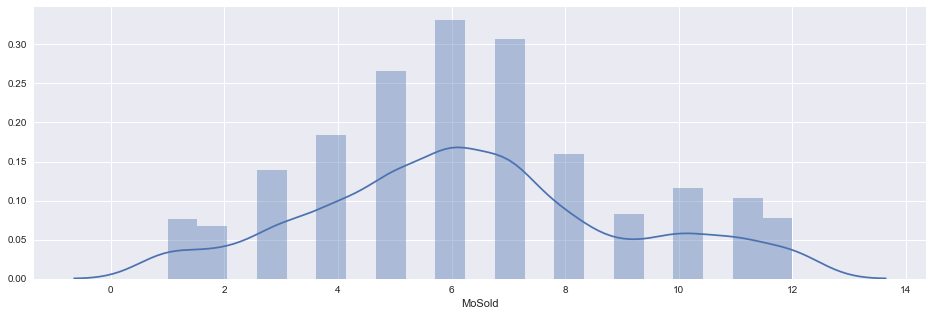

In [1170]:
sns.distplot(train.MoSold)

As can be seen above, there is a peak in the middle of the year which is mostly in, or at the start of, summer when house sales are usually higher. And there's a uniform trend towards the end and start of the season (obviously, not many people are moving in or out in the holiday season or around that). Hence we can safely say that reducing this variable into seasons will be better to understand the data more effectively.

In [1171]:
def seasons(x):
    if x in [12, 1, 2]:
        return("Winter")
    elif x in [3, 4, 5]:
        return("Spring")
    elif x in [6, 7, 8]:
        return("Summer")
    elif x in [9, 10, 11]:
        return("Fall")
train["SznSold"] = train["MoSold"].apply(seasons)

Dropping the variables now.

In [1172]:
train = train.drop(datetimes, axis = 1)
train.shape

(1459, 80)

And converting the season variable to category.

In [1173]:
train.SznSold = train.SznSold.astype('category')
train.SznSold.dtype

CategoricalDtype(categories=['Fall', 'Spring', 'Summer', 'Winter'], ordered=False)

Doing the same for testing data set.

In [1174]:
test_og = test.copy()
test["Age_House"] = test['YrSold'] - test['YearBuilt']
test["Age_Remod"] = test['YrSold'] - test['YearRemodAdd']
test["Age_Garage"] = test['YrSold'] - test['GarageYrBlt']
test["Age_Garage"][test["Age_Garage"] <= 0] = test.Age_Garage.max()
test["SznSold"] = test["MoSold"].apply(seasons)
test.SznSold = test.SznSold.astype('category')
test = test.drop(datetimes, axis = 1)
test.shape

(1446, 79)

#### 2.2 Categorical Variables
When it comes to categorical variables, there are some basic challenges we need to overcome before applying a machine learning model on them. Some of them that we will look to address in the two steps below- 
> 1. Feature Elimination - We will have to use ANOVA in this case as the target variable is continuous. We will use this feature selection technique to eliminate unimportant features having a high skewness towards one category (over 90 % of the distribution is occupied by a single variable). This is based on the general perception that variables having little variation usually contribute little to the target prediction (which again is not always the case, hence ANOVA).
> 2. Feature Cardinality - When there are too many categories (we will take that limit as 5 here) in a feature or if the distribution is skewed towards one or two categories, we will have to find ways to minimize the cardinality of those variables by combining certain categories which are rare based on either frequency or domain information. This is important because too many features usually lead to a less than desirable model.

#### 2.2.1 Feature Elimination
Let's first extract features that have a category occupying over 90% of the distribution.

In [1175]:
cols_cat_90 = []
for e in train.select_dtypes("category"):
    if train[e].value_counts(normalize = True).max() >= 0.9:
        cols_cat_90.append(e)
        
print("Columns with category occupying over 90% of the distribution")
print("============================================================")
print(cols_cat_90)
print("\nNo. of columns =", len(cols_cat_90))

Columns with category occupying over 90% of the distribution
['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']

No. of columns = 14


Now, let's take a look at their distribution.

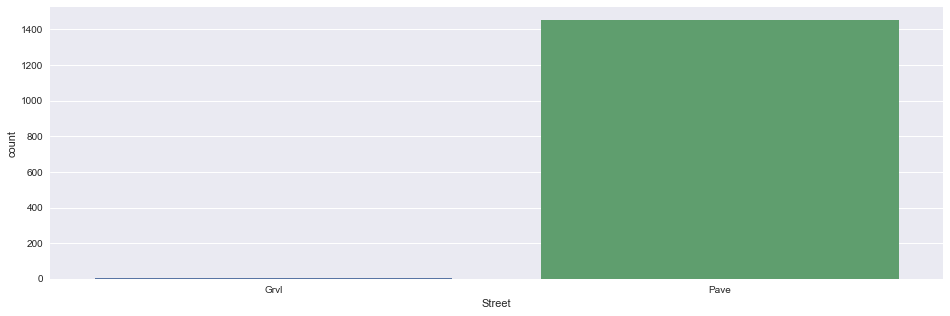

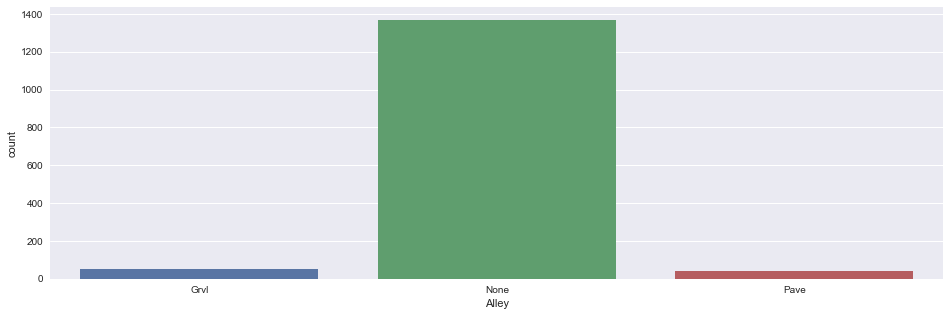

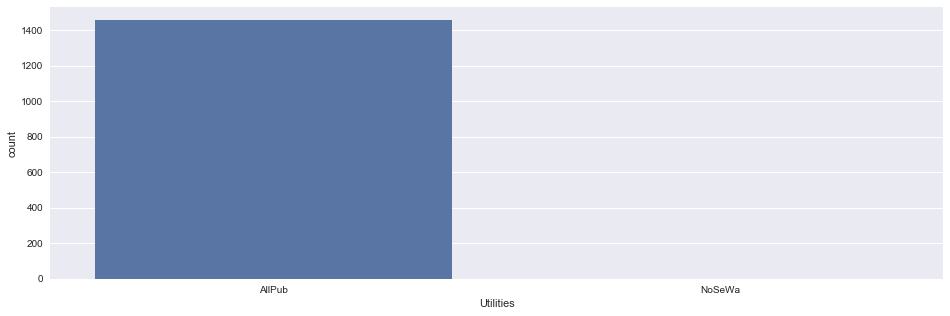

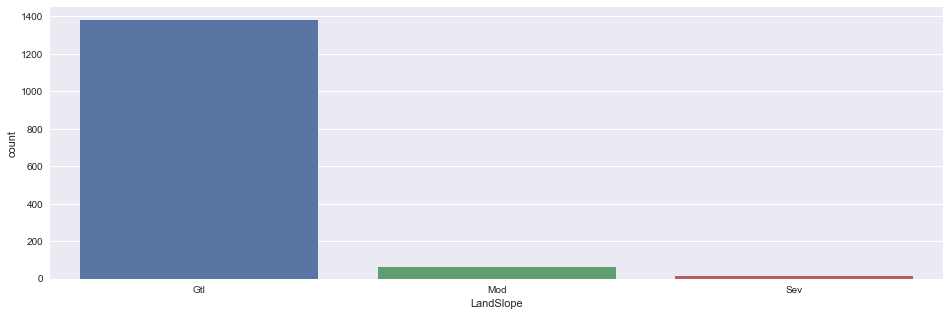

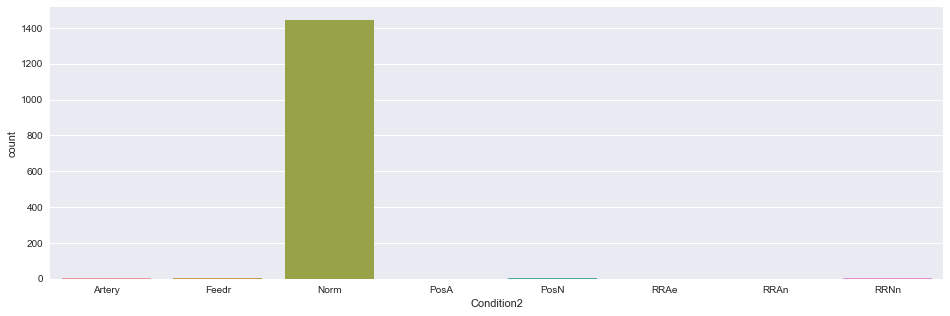

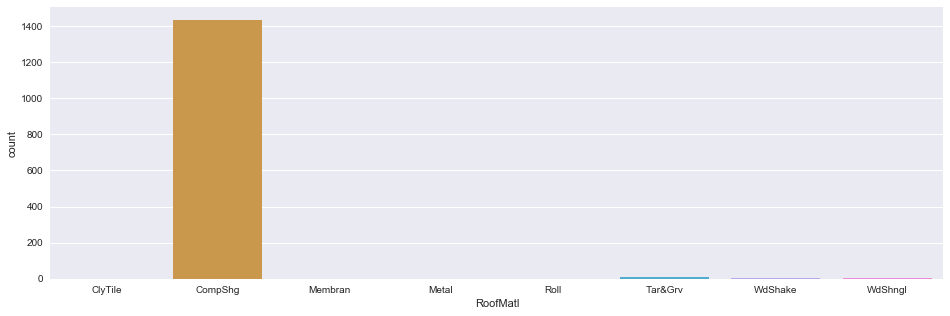

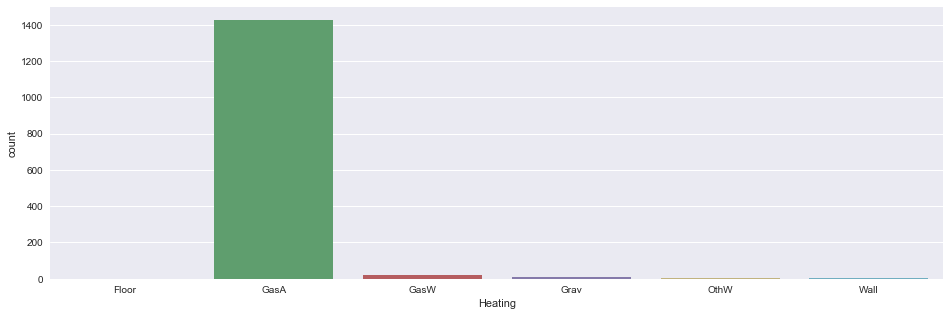

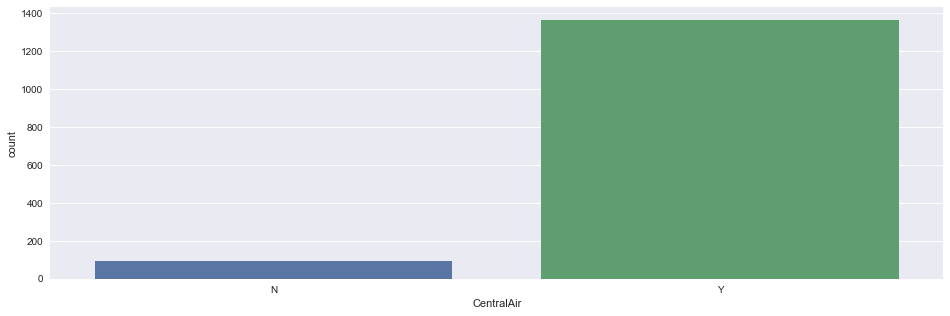

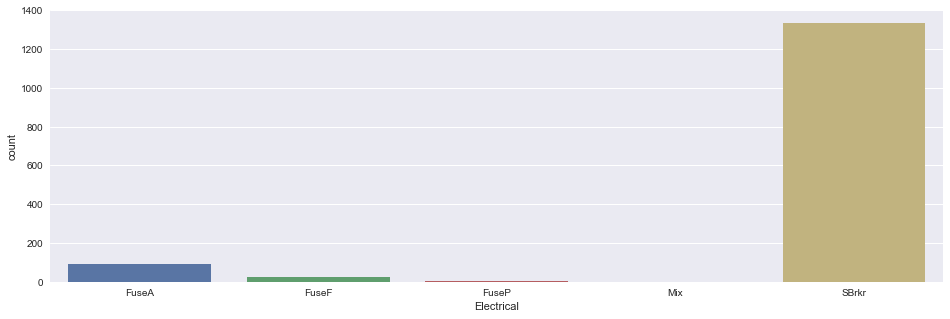

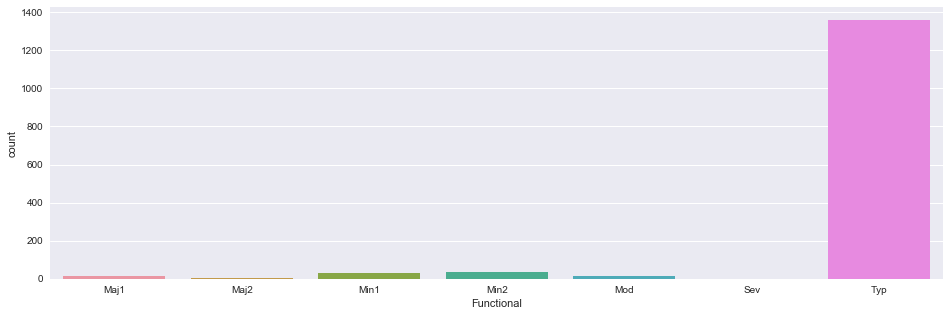

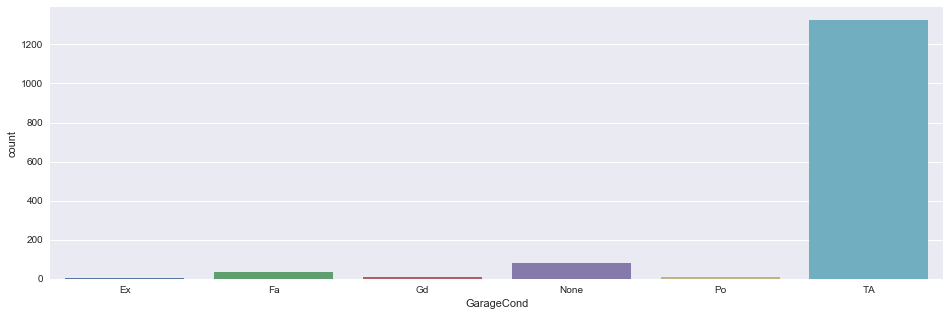

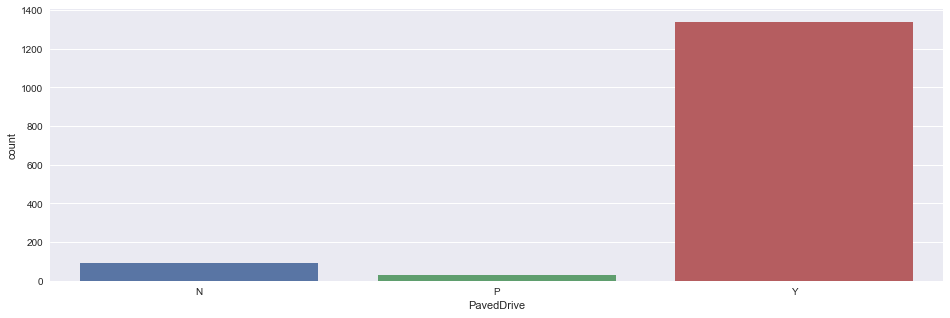

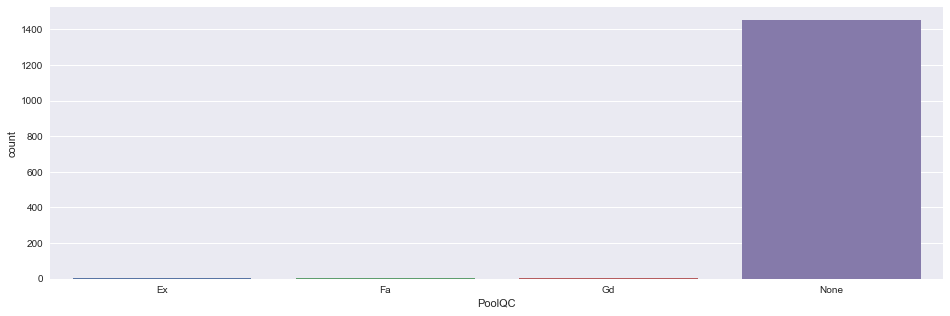

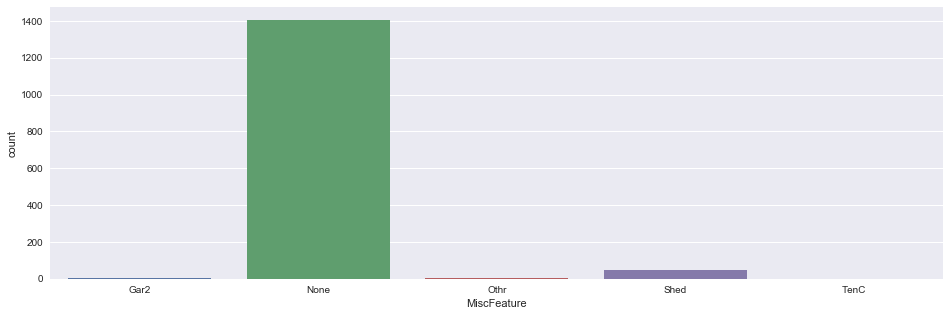

In [1176]:
plt.rcParams['figure.figsize'] = [16, 5]
for e in cols_cat_90:
    plt.figure()
    sns.countplot(train[e])

As can be seen, these variables are highly skewed. We will now use ANOVA to see if these need to stay. If they are insignificant, we will eliminate them. If not, we will treat them in the next step.

In [1177]:
from sklearn.feature_selection import f_classif
X = train.loc[:, cols_cat_90]
X = pd.get_dummies(X, drop_first = False)
y = train.SalePrice
anova = f_classif(X, y)
percent = []
for e in X.columns:
    percent.append(round((X[e].sum() / len(X) * 100)))
result = pd.DataFrame({"Features": X.columns,
              "Percent" : percent,
              "F-values": anova[0],
              "p-values": np.round(anova[1], 3)})
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,Features,Percent,F-values,p-values
0,Street_Grvl,0.0,1.868361,0.000
1,Street_Pave,100.0,1.868398,0.000
2,Alley_Grvl,3.0,0.712832,1.000
3,Alley_None,94.0,0.797760,0.999
4,Alley_Pave,3.0,1.081563,0.145
5,Utilities_AllPub,100.0,0.239356,1.000
6,Utilities_NoSeWa,0.0,0.239494,1.000
7,LandSlope_Gtl,95.0,1.195060,0.008
8,LandSlope_Mod,4.0,1.133349,0.046
9,LandSlope_Sev,1.0,1.045696,0.273


For deciding which variables to drop (or keep), we will use the following condition
> For a given variable if **either all the categories or at least the dominant category (over 90 %) is insignificant (p > 0.05)** we will then **DROP** those variables. 

From the above table the **Variables to keep** are -  
[Street, LandSlope, CentralAir, Electrical, GarageCond]

We will drop the rest of the variables.

In [1178]:
# updating the variables to remove
cols_cat_90 = list(set(cols_cat_90) - set(["Street", "LandSlope", "CentralAir", "Electrical", "GarageCond"]))
cols_cat_90

['PavedDrive',
 'Alley',
 'Utilities',
 'Functional',
 'RoofMatl',
 'Condition2',
 'MiscFeature',
 'PoolQC',
 'Heating']

In [1179]:
train = train.drop(cols_cat_90, axis = 1)
print(train.shape)

(1459, 71)


In [1180]:
test = test.drop(cols_cat_90, axis = 1)
print(test.shape)

(1446, 70)


#### 2.2.2 Feature Cardinality
We will now see how each of the categorical variable is distributed both using plots and numeric counts. We will re-establish the categories if one of the following is true - 
> 1. The distribution is heavily skewed towards one or two categories only i.e. about 80-90 %. 
> 2. If there are categories that are very rare (by thumb rule under 5% of the distribution) or if there are too many categories (> 10) and they cannot be combined using domain information we will just combine them into a new category "Others".

In [1181]:
for e in train.select_dtypes("category"):
    if train[e].nunique() > 2:
        print(train[e].value_counts(normalize = True, sort = False) * 100)
        print()

20     36.737491
30      4.729267
40      0.274160
45      0.822481
50      9.869774
60     20.493489
70      4.112406
75      1.096642
80      3.906785
85      1.370802
90      3.564085
120     5.962988
160     4.318026
180     0.685401
190     2.056203
Name: MSSubClass, dtype: float64

C (all)     0.685401
FV          4.455106
RH          1.096642
RL         78.821110
RM         14.941741
Name: MSZoning, dtype: float64

IR1    33.173406
IR2     2.810144
IR3     0.685401
Reg    63.331049
Name: LotShape, dtype: float64

Bnk     4.318026
HLS     3.427005
Low     2.467443
Lvl    89.787526
Name: LandContour, dtype: float64

Corner     18.026045
CulDSac     6.442769
FR2         3.221385
FR3         0.274160
Inside     72.035641
Name: LotConfig, dtype: float64

Gtl    94.653873
Mod     4.455106
Sev     0.891021
Name: LandSlope, dtype: float64

Blmngtn     1.165182
Blueste     0.137080
BrDale      1.096642
BrkSide     3.975326
ClearCr     1.919123
CollgCr    10.281014
Crawfor     3.495545
Ed

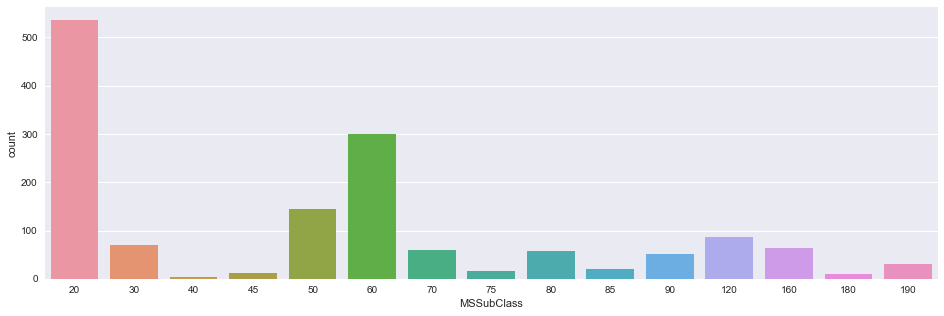

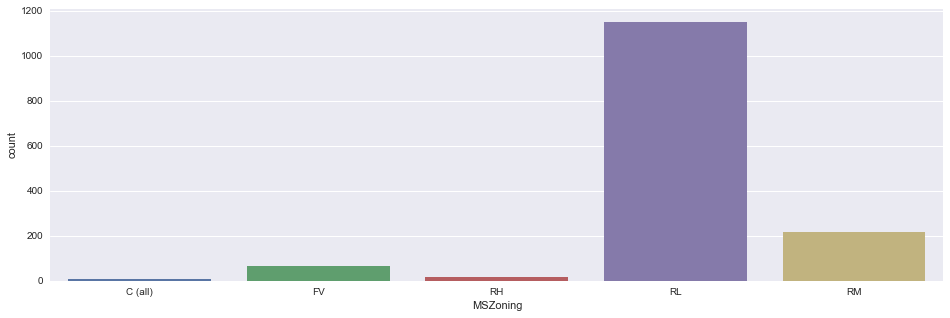

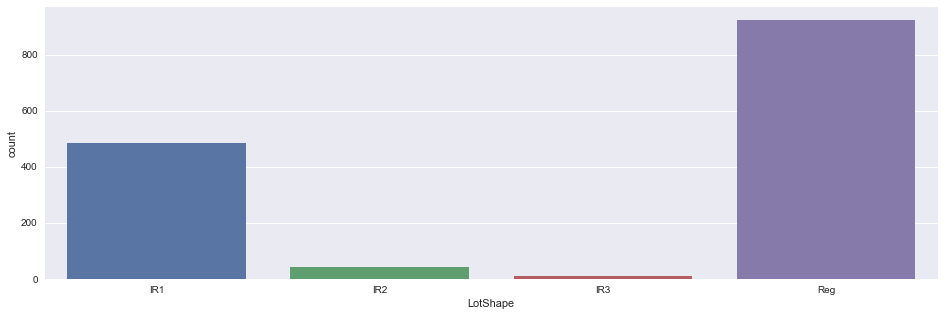

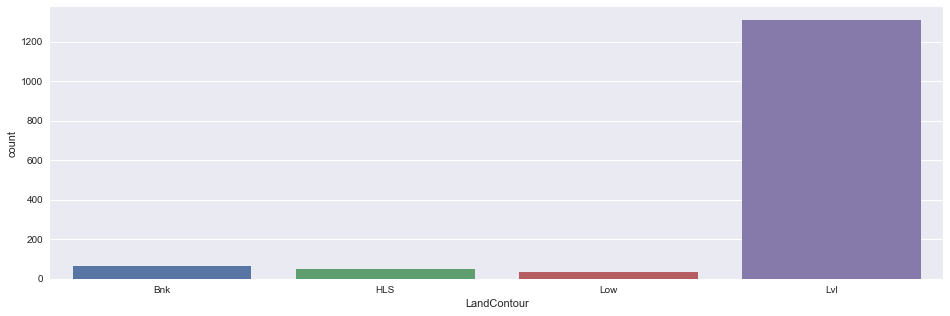

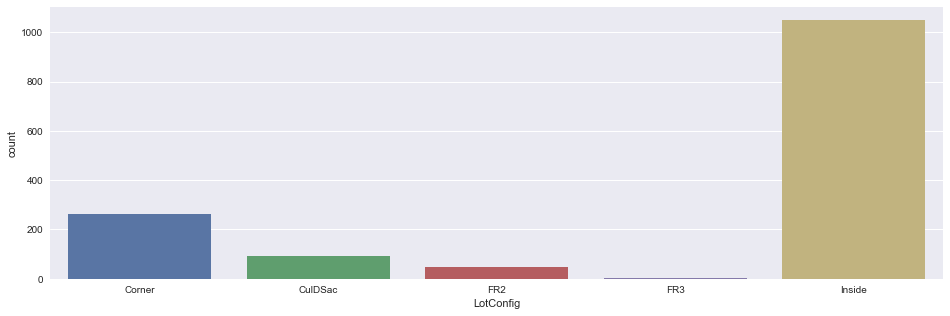

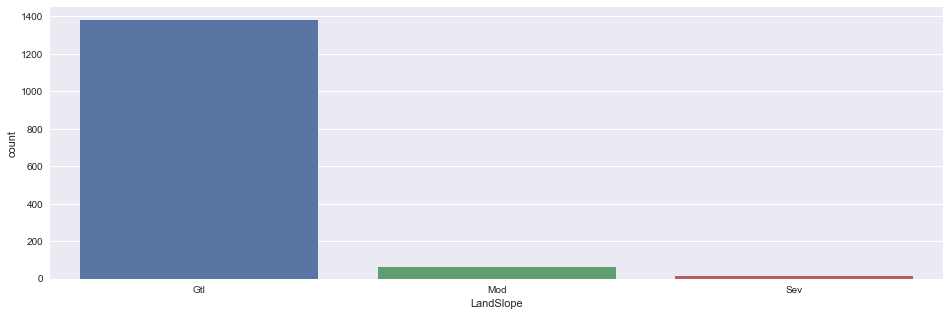

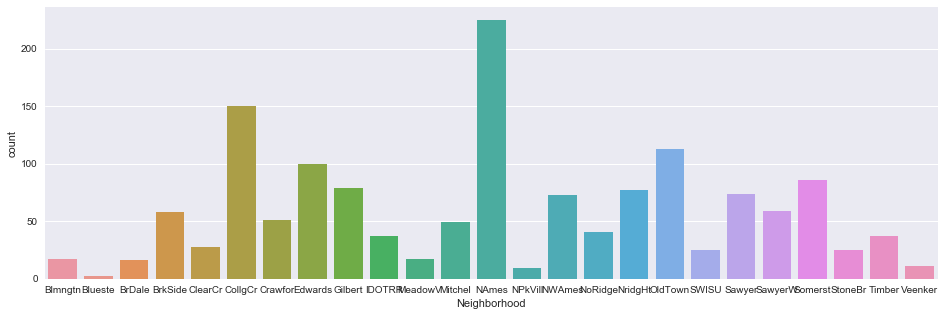

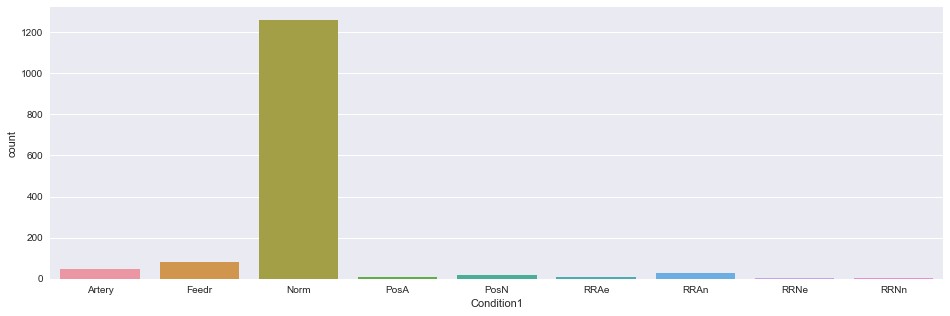

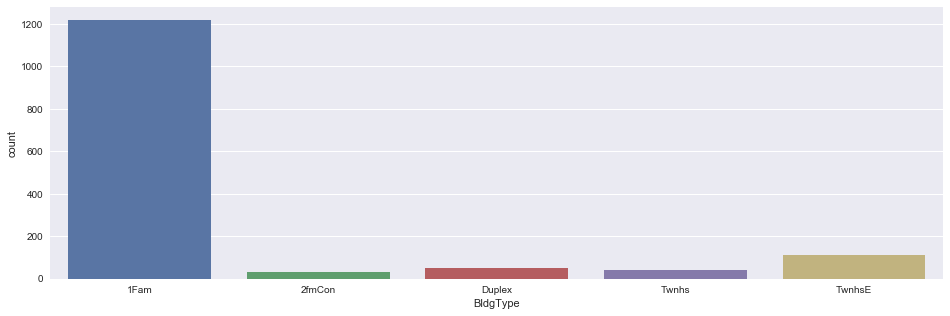

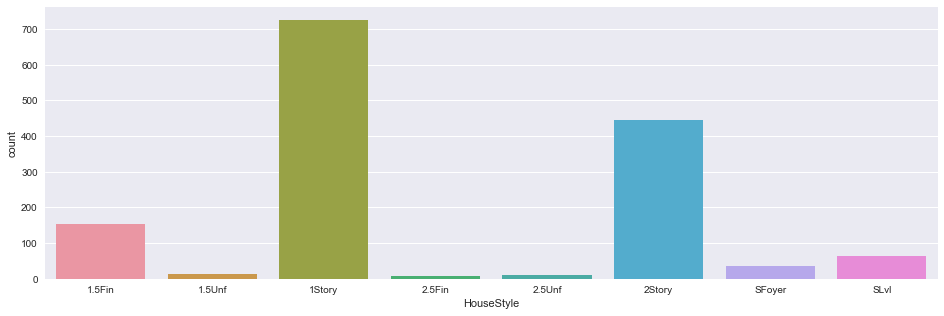

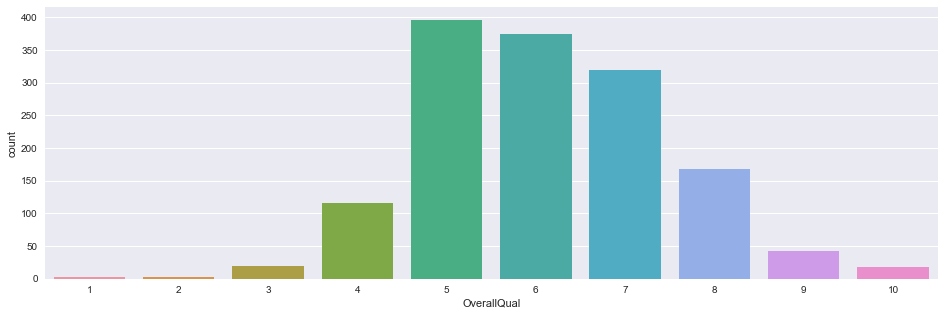

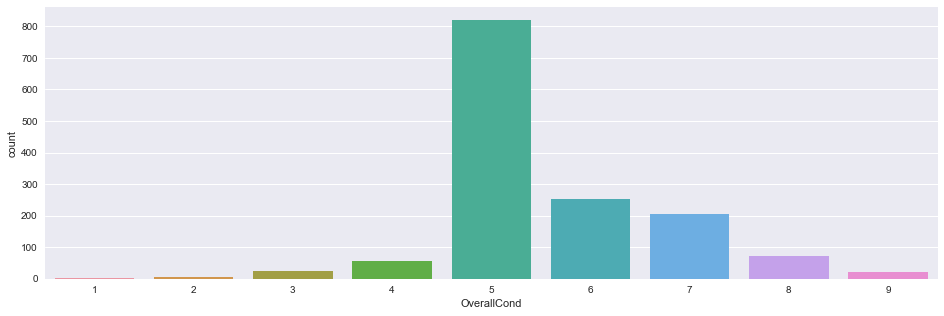

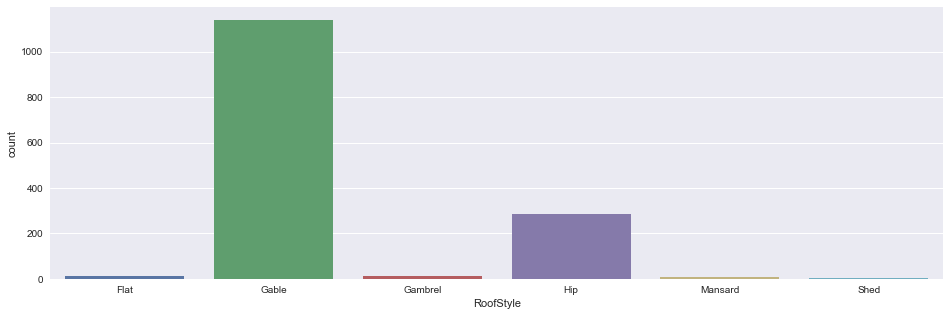

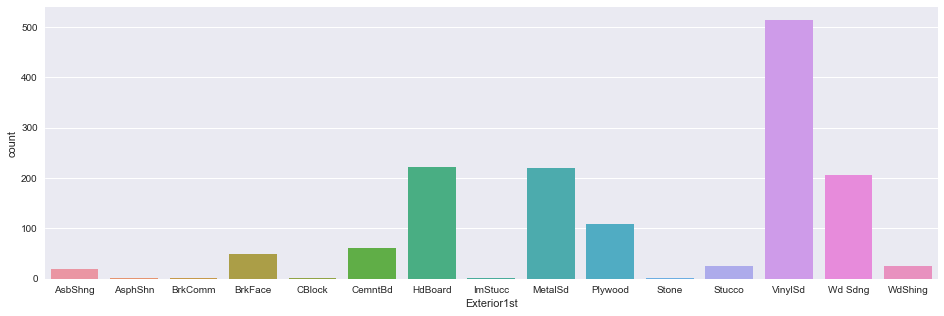

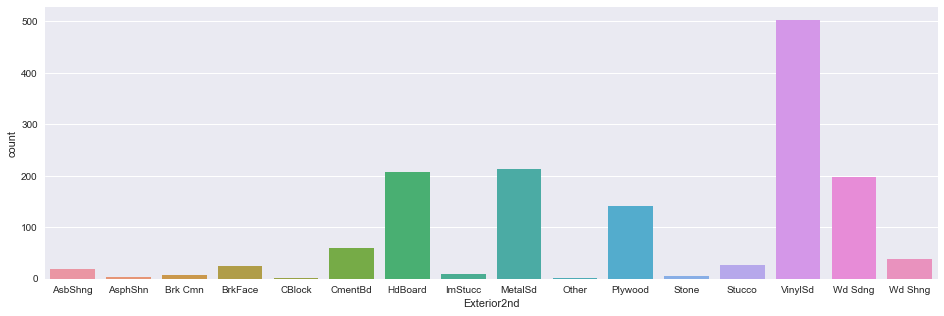

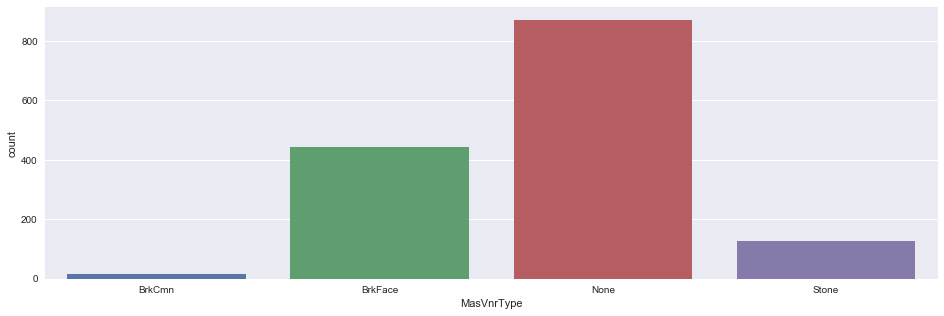

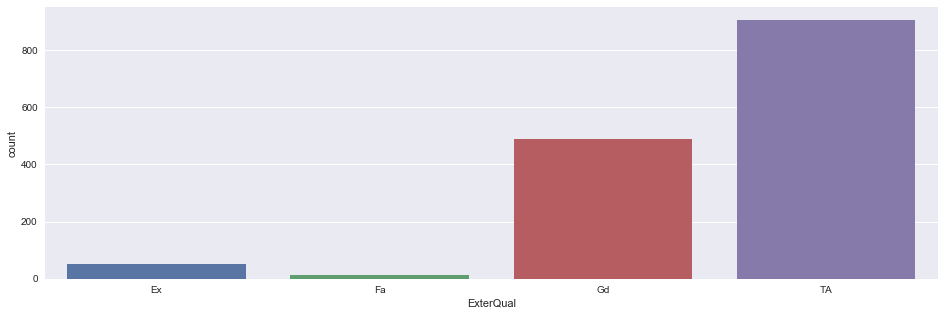

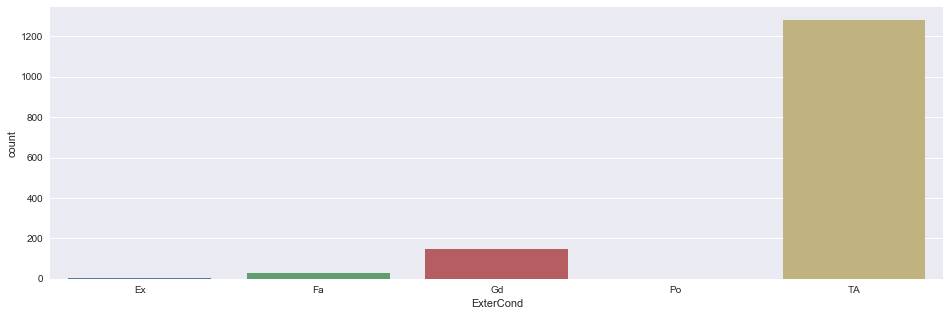

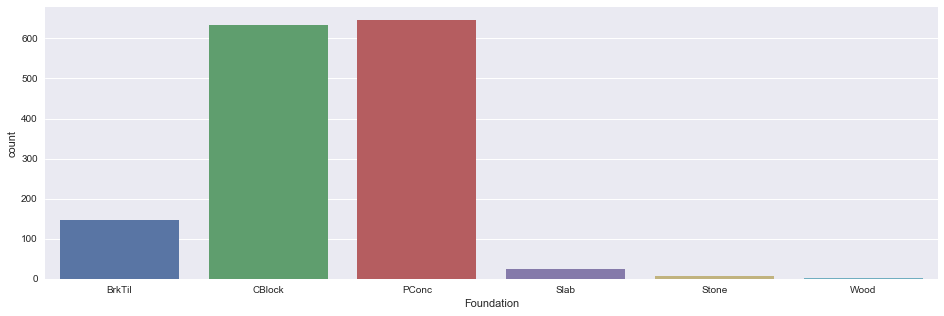

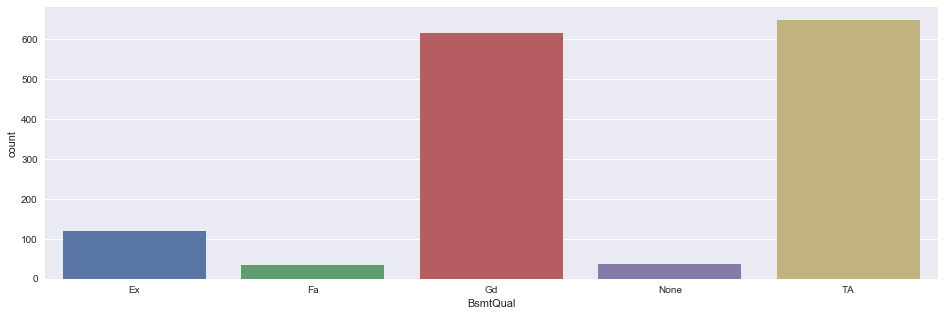

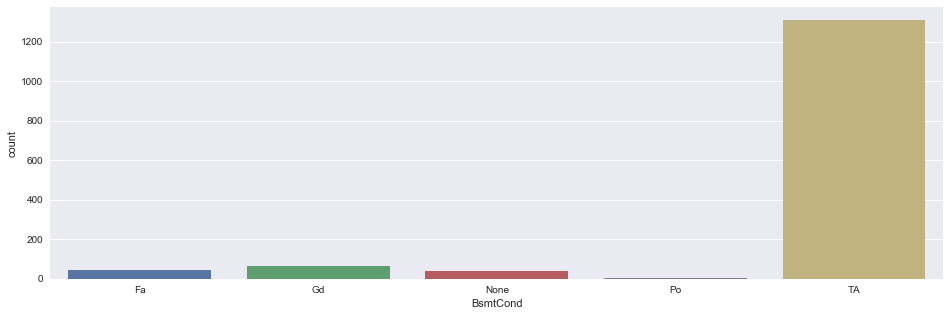

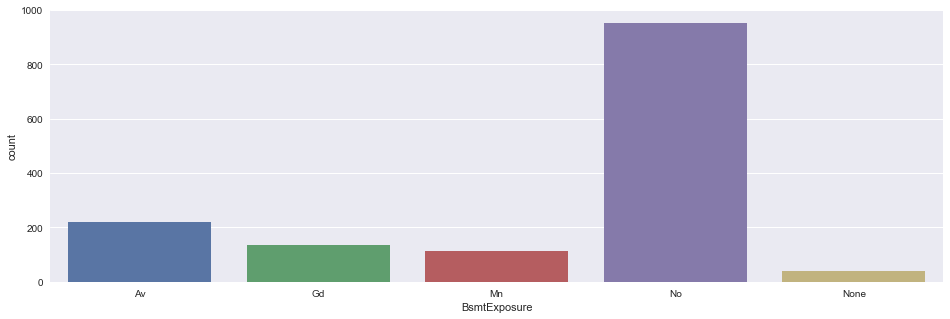

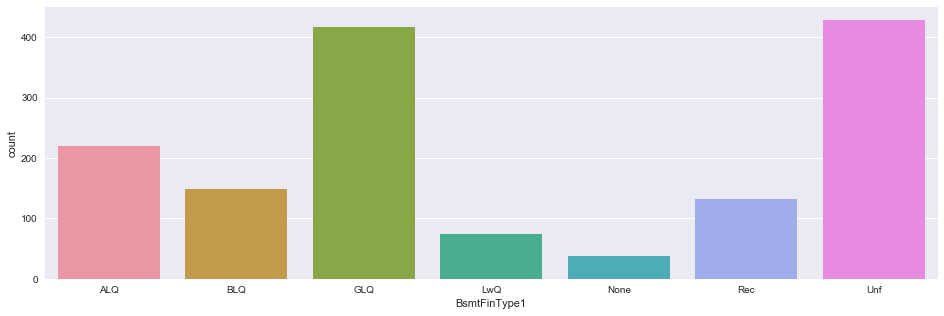

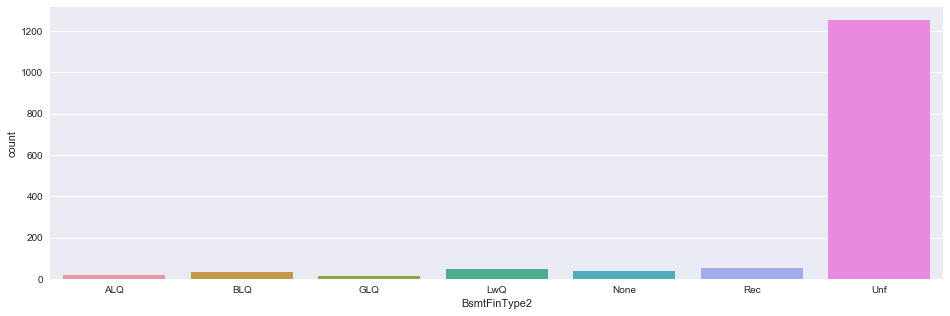

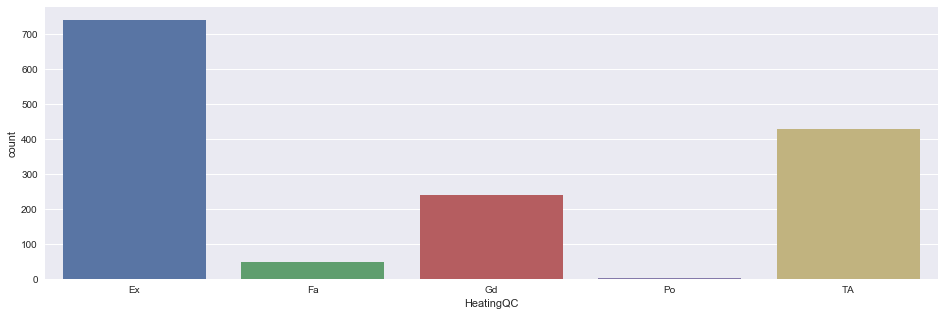

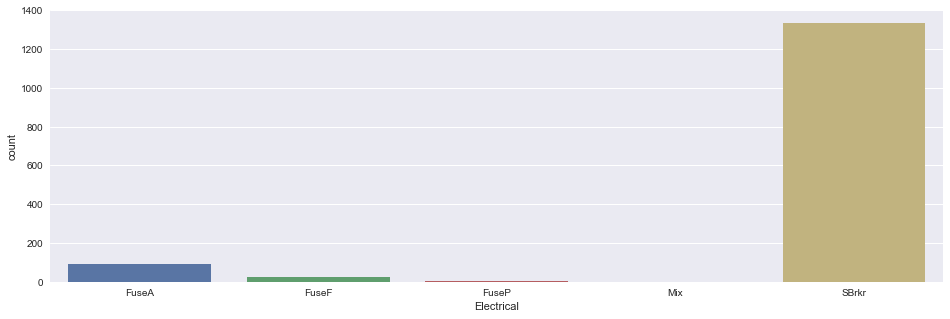

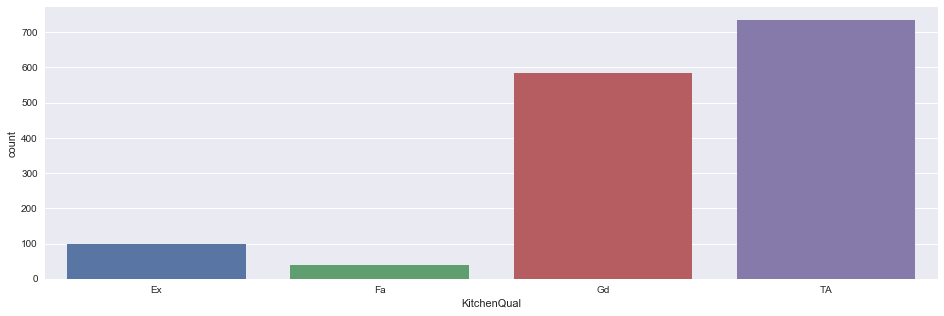

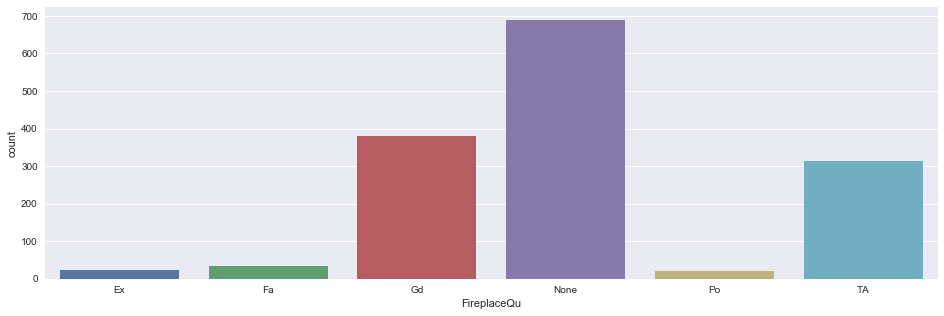

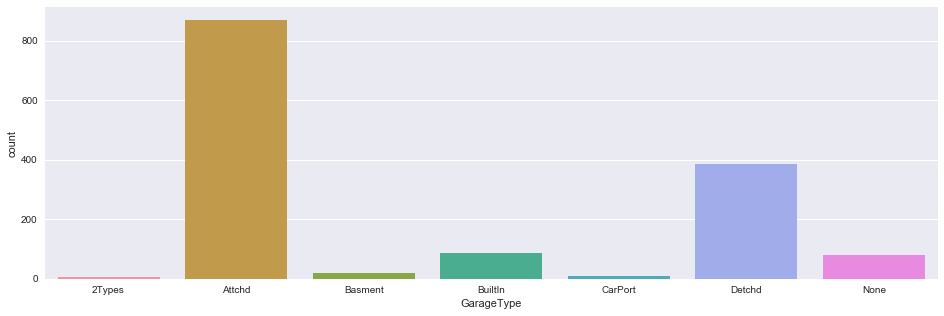

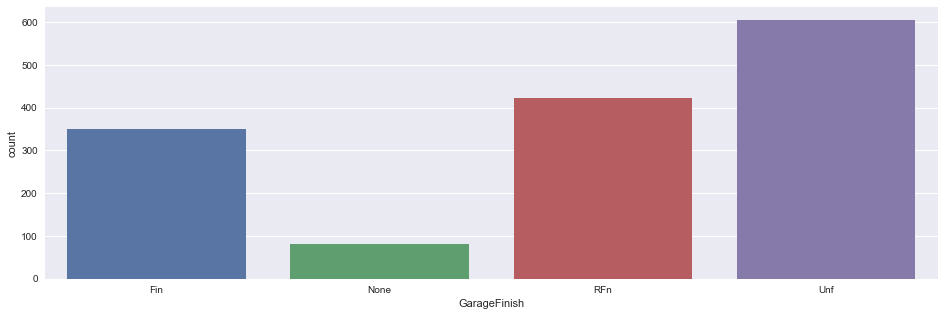

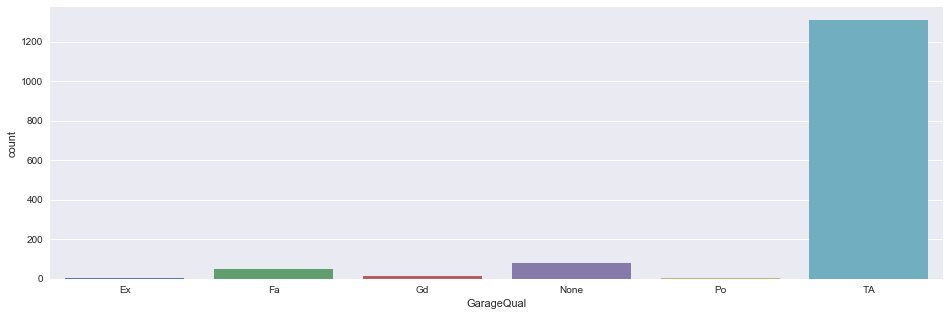

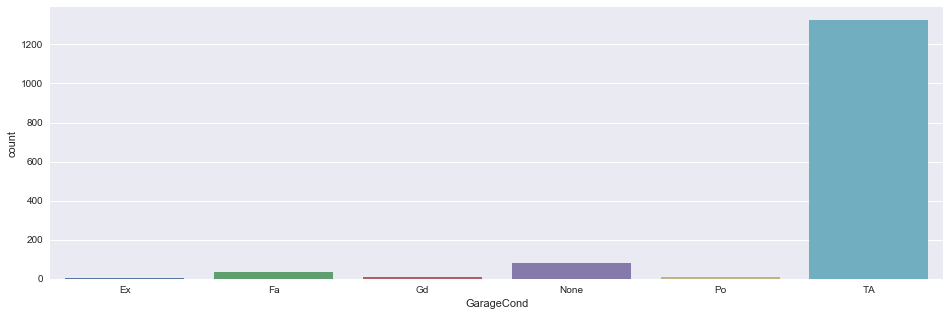

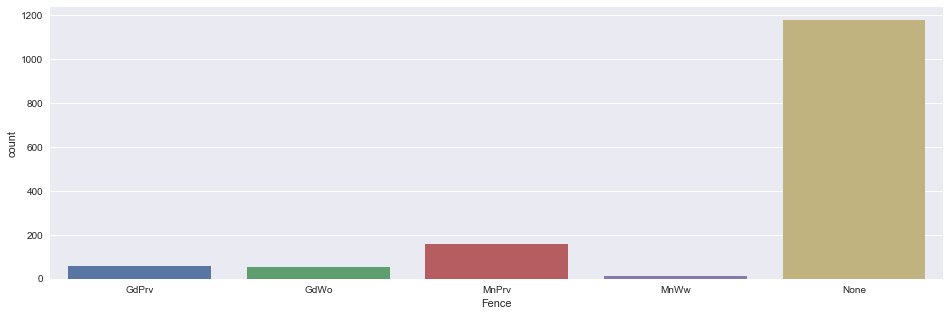

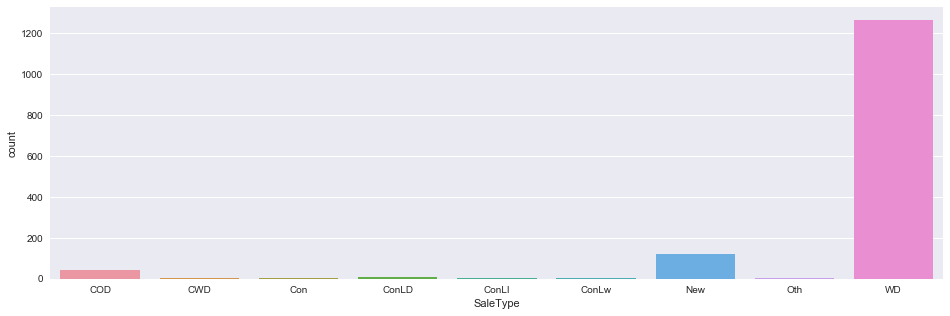

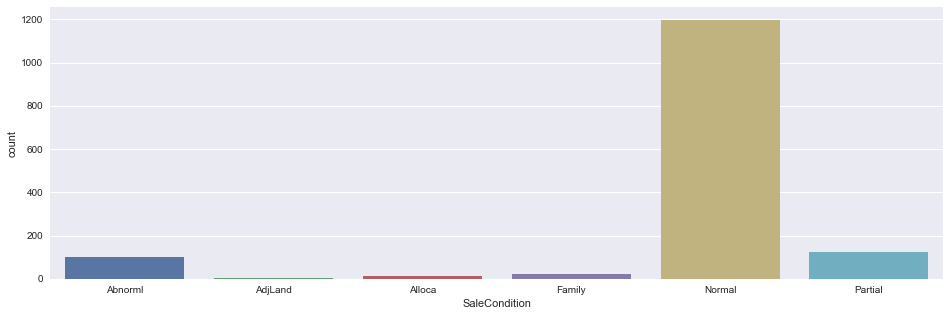

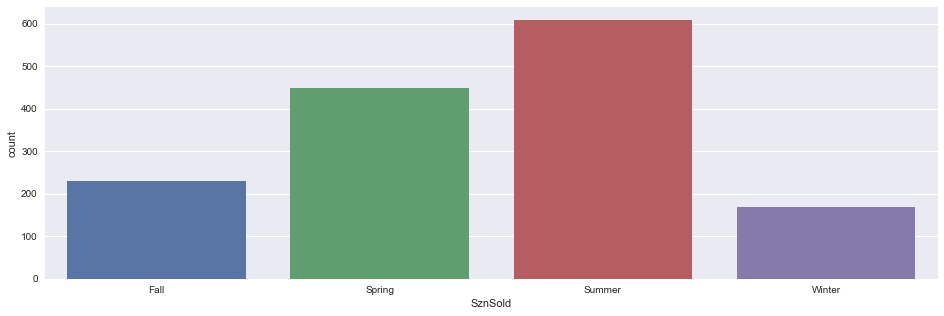

In [1182]:
plt.rcParams['figure.figsize'] = [16, 5]
plt.rcParams.update({'figure.max_open_warning': 0})
for e in train.select_dtypes("category"):
    if train[e].nunique() > 2:
        plt.figure()
        sns.countplot(train[e])

Now we will re-establish some of the categories from above variables.

In [1183]:
# Conversion to str 
for e in train.select_dtypes("category"):
    train[e] = train[e].astype(str)
    
for e in test.select_dtypes("category"):
    test[e] = test[e].astype(str)

In [1184]:
# MSZoning
train['MSZoning'][train['MSZoning'].str.startswith('R')] = "R"

# LotShape
train['LotShape'][train['LotShape'].str.startswith('I')] = "IR"

# LandContour
train['LandContour'][train['LandContour'] != "Lvl"] = "N Lvl"

# LotConfig
train['LotConfig'][train['LotConfig'].str.startswith('F')] = "FR"

# LandSlope
train['LandSlope'][train['LandSlope'] == "Gtl"] = "Low"
train['LandSlope'][train['LandSlope'] != "Low"] = "High"

# Condition1
train['Condition1'][train['Condition1'].str.startswith("Pos")] = "Pos"
train['Condition1'][train['Condition1'].str.startswith("RR")] = "RR"

# HouseStyle
train['HouseStyle'][train['HouseStyle'] == "1Story"] = "1"
train['HouseStyle'][train['HouseStyle'].str.startswith("1.5")] = "1.5"
train['HouseStyle'][train['HouseStyle'].str.startswith("2")] = "2+"
train['HouseStyle'][train['HouseStyle'].str.startswith("S")] = "Split"

# OverallQual
def level(x):
    if x in ["1", "2", "3", "4"]:
        return "Low"
    elif x in ["5", "6", "7"]:
        return "Med"
    else:
        return "High"
train['OverallQual'] = train['OverallQual'].apply(level)

# OverallCond
def level(x):
    if x in ["1", "2", "3", "4"]:
        return "Bad"
    elif x in ["5"]:
        return "Average"
    else:
        return "Good"
train['OverallCond'] = train['OverallCond'].apply(level)

# RoofStyle
train['RoofStyle'][train['RoofStyle'].isin(['Gambrel', 'Mansard', 'Flat', 'Shed'])] = "Others"

# Exterior1st
train['Exterior1st'][train['Exterior1st'].isin(['BrkFace', 'WdShing', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock'])] = "Others"

# Exterior2nd
train['Exterior2nd'][train['Exterior2nd'].isin(['Wd Shng', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone', 'Other', 'CBlock'])] = "Others"

# MasVnrType
train['MasVnrType'][train['MasVnrType'].str.startswith("Brk")] = "Brick"

# ExterQual, ExterCond, BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond 
def quality(x):
    if x in ['TA', 'Fa', 'Po']:
        return "Low"
    elif x in ['Ex', 'Gd']:
        return "High"
    else:
        return "None"

train['ExterQual'] = train['ExterQual'].apply(quality)
train['ExterCond'] = train['ExterCond'].apply(quality)
train['BsmtQual'] = train['BsmtQual'].apply(quality)
train['BsmtCond'] = train['BsmtCond'].apply(quality)
train['FireplaceQu'] = train['FireplaceQu'].apply(quality)
train['GarageQual'] = train['GarageQual'].apply(quality)
train['GarageCond'] = train['GarageCond'].apply(quality)

# Foundation
train['Foundation'][train['Foundation'].isin(['Wood', 'Slab', 'Stone'])] = "Other"

# HeatingQC, KitchenQual
def quality(x):
    if x in ['TA', 'Fa', 'Po']:
        return "Low"
    elif x in ['Gd']:
        return "Med"
    elif x in ['Ex']:
        return "High"
    else:
        return "None"
    
train['HeatingQC'] = train['HeatingQC'].apply(quality)
train['KitchenQual'] = train['KitchenQual'].apply(quality)

# Electrical
train['Electrical'][train['Electrical'] != "SBrkr"] = "Other"

# GarageType
train['GarageType'][train['GarageType'].isin(['Attchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'])] = "Attchd"

# SaleType
train['SaleType'][train['SaleType'].isin(['COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'])] = "Other"

# SaleCondition
train['SaleCondition'][train['SaleCondition'].isin(['AdjLand', 'Alloca', 'Family'])] = "Other"

In [1185]:
# MSZoning
test['MSZoning'][test['MSZoning'].str.startswith('R')] = "R"

# LotShape
test['LotShape'][test['LotShape'].str.startswith('I')] = "IR"

# LandContour
test['LandContour'][test['LandContour'] != "Lvl"] = "N Lvl"

# LotConfig
test['LotConfig'][test['LotConfig'].str.startswith('F')] = "FR"

# LandSlope
test['LandSlope'][test['LandSlope'] == "Gtl"] = "Low"
test['LandSlope'][test['LandSlope'] != "Low"] = "High"

# Condition1
test['Condition1'][test['Condition1'].str.startswith("Pos")] = "Pos"
test['Condition1'][test['Condition1'].str.startswith("RR")] = "RR"

# HouseStyle
test['HouseStyle'][test['HouseStyle'] == "1Story"] = "1"
test['HouseStyle'][test['HouseStyle'].str.startswith("1.5")] = "1.5"
test['HouseStyle'][test['HouseStyle'].str.startswith("2")] = "2+"
test['HouseStyle'][test['HouseStyle'].str.startswith("S")] = "Split"

# OverallQual
test['OverallQual'] = test['OverallQual'].apply(level)

# OverallCond
test['OverallCond'] = test['OverallCond'].apply(level)

# RoofStyle
test['RoofStyle'][test['RoofStyle'].isin(['Gambrel', 'Mansard', 'Flat', 'Shed'])] = "Others"

# Exterior1st
test['Exterior1st'][test['Exterior1st'].isin(['BrkFace', 'WdShing', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock'])] = "Others"

# Exterior2nd
test['Exterior2nd'][test['Exterior2nd'].isin(['Wd Shng', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone', 'Other', 'CBlock'])] = "Others"

# MasVnrType
test['MasVnrType'][test['MasVnrType'].str.startswith("Brk")] = "Brick"

# ExterQual, ExterCond, BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond 
test['ExterQual'] = test['ExterQual'].apply(quality)
test['ExterCond'] = test['ExterCond'].apply(quality)
test['BsmtQual'] = test['BsmtQual'].apply(quality)
test['BsmtCond'] = test['BsmtCond'].apply(quality)
test['FireplaceQu'] = test['FireplaceQu'].apply(quality)
test['GarageQual'] = test['GarageQual'].apply(quality)
test['GarageCond'] = test['GarageCond'].apply(quality)

# Foundation
test['Foundation'][test['Foundation'].isin(['Wood', 'Slab', 'Stone'])] = "Other"

# HeatingQC, KitchenQual
test['HeatingQC'] = test['HeatingQC'].apply(quality)
test['KitchenQual'] = test['KitchenQual'].apply(quality)

# Electrical
test['Electrical'][test['Electrical'] != "SBrkr"] = "Other"

# GarageType
test['GarageType'][test['GarageType'].isin(['Attchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'])] = "Attchd"

# SaleType
test['SaleType'][test['SaleType'].isin(['COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'])] = "Other"

# SaleCondition
test['SaleCondition'][test['SaleCondition'].isin(['AdjLand', 'Alloca', 'Family'])] = "Other"

#### 2.3 Numeric Variables
For the numeric variables, we will look to do the following - 
> 1. Check for multi-collinearity. If there are two correlated variables in our dataset, we will eliminate the one having higher cumulative correlation with all the other variables.
> 2. Check the skewness of each variable. If skewness is greater than 0.75 we will have to transform the variables using a "log + 1" transformation as we need to get them closer to a normal distribution (which is ideally desirable for a linear regression algorithm, but not always possible).  

Extracting all the numeric feature names.

In [1138]:
numeric = []
for e in train.columns:
    if (train[e].dtype in ["int64", "float"]):
        numeric.append(e)
        
numeric = numeric[1:-4] + numeric[-3:]
print(numeric)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age_House', 'Age_Remod', 'Age_Garage']


#### 2.3.1 Multi-collinearity

Getting the correlation plot.

In [1139]:
corr_mat = train[numeric].corr()
corr_mat.style.background_gradient(cmap = "coolwarm").set_precision(2)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age_House,Age_Remod,Age_Garage
LotFrontage,1,0.1,0.11,0.077,-0.0092,0.16,0.24,0.25,0.042,0.05,0.22,0.011,-0.028,0.12,-0.013,0.14,0.034,0.22,0.044,0.17,0.2,-0.017,0.07,0.027,0.024,0.023,0.11,-0.06,-0.037,-0.079,0.079
LotArea,0.1,1,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,0.15,0.18,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,-0.015,-0.015,0.0028
MasVnrArea,0.11,0.1,1,0.26,-0.071,0.11,0.36,0.34,0.17,-0.069,0.39,0.083,0.027,0.27,0.2,0.1,-0.039,0.28,0.25,0.36,0.37,0.16,0.12,-0.11,0.019,0.062,0.012,-0.03,-0.31,-0.18,-0.14
BsmtFinSF1,0.077,0.21,0.26,1,-0.05,-0.5,0.52,0.45,-0.14,-0.065,0.21,0.65,0.067,0.059,0.0051,-0.11,-0.081,0.045,0.26,0.22,0.3,0.2,0.11,-0.1,0.026,0.062,0.14,0.0035,-0.25,-0.13,-0.12
BsmtFinSF2,-0.0092,0.11,-0.071,-0.05,1,-0.21,0.1,0.097,-0.099,0.015,-0.0097,0.16,0.071,-0.076,-0.032,-0.016,-0.041,-0.035,0.047,-0.038,-0.018,0.068,0.003,0.036,-0.03,0.089,0.042,0.0049,0.05,0.07,-0.011
BsmtUnfSF,0.16,-0.0026,0.11,-0.5,-0.21,1,0.42,0.32,0.0047,0.028,0.24,-0.42,-0.096,0.29,-0.041,0.17,0.03,0.25,0.051,0.21,0.18,-0.0053,0.13,-0.0026,0.021,-0.013,-0.035,-0.024,-0.15,-0.18,-0.0062
TotalBsmtSF,0.24,0.26,0.36,0.52,0.1,0.42,1,0.82,-0.17,-0.033,0.46,0.31,-0.00057,0.32,-0.048,0.051,-0.069,0.29,0.34,0.44,0.49,0.23,0.25,-0.096,0.037,0.084,0.13,-0.019,-0.39,-0.29,-0.14
1stFlrSF,0.25,0.3,0.34,0.45,0.097,0.32,0.82,1,-0.2,-0.014,0.57,0.24,0.0018,0.38,-0.12,0.13,0.068,0.41,0.41,0.44,0.49,0.24,0.21,-0.066,0.056,0.089,0.13,-0.021,-0.28,-0.24,-0.1
2ndFlrSF,0.042,0.051,0.17,-0.14,-0.099,0.0047,-0.17,-0.2,1,0.063,0.69,-0.17,-0.024,0.42,0.61,0.5,0.059,0.62,0.2,0.18,0.14,0.092,0.21,0.062,-0.024,0.041,0.082,0.016,-0.011,-0.14,-0.067
LowQualFinSF,0.05,0.0048,-0.069,-0.065,0.015,0.028,-0.033,-0.014,0.063,1,0.13,-0.047,-0.0059,-0.00064,-0.027,0.11,0.0075,0.13,-0.021,-0.094,-0.068,-0.025,0.018,0.061,-0.0043,0.027,0.062,-0.0038,0.18,0.061,0.076


As we can see, the correlation matrix is large and the task to find correlated variables might prove tedious. So, we will use some basic programming to extract correlated variable pairs and ultimately the variable to drop.

In [1189]:
corr_var = []
for c in corr_mat.columns:
    for r in corr_mat.index:
        if ((corr_mat.loc[c, r] >= 0.5) | (corr_mat.loc[c, r] <= -0.5)) & (c != r):
            corr_var.append(list([c, r]))
            
for i in range(len(corr_var)):
    corr_var[i].sort()
    
temp = []
for e in corr_var:
    if e not in temp:
        temp.append(e)

corr_var = temp
del(temp) # removing unnecessary variable

# extracting data for dataframe
corr_var_1, corr_var_2, corr_val = [], [], []
for e in corr_var:
    corr_var_1.append(e[0])
    corr_var_2.append(e[1])
    corr_val.append(round(corr_mat.loc[e[0], e[1]], 2))

rcum_1, rcum_2 = [], []
for e in corr_var_1:
    rcum_1.append(round((corr_mat[e].sum() - 1), 2))
    
for e in corr_var_2:
    rcum_2.append(round((corr_mat[e].sum() - 1), 2))

# creating dataframe
corr_df = pd.DataFrame({'r': corr_val, 'Var_1': corr_var_1, 'rcum_Var_1':rcum_1, 'Var_2':corr_var_2, 'rcum_Var_2':rcum_2})
corr_df['Var_to_Remove'] = np.where((corr_df['rcum_Var_1']) > (corr_df['rcum_Var_2']), corr_df['Var_1'], corr_df['Var_2'])
corr_df

,r,Var_1,rcum_Var_1,Var_2,rcum_Var_2,Var_to_Remove
0,0.52,BsmtFinSF1,2.34,TotalBsmtSF,4.87,TotalBsmtSF
1,0.65,BsmtFinSF1,2.34,BsmtFullBath,0.82,BsmtFinSF1
2,0.82,1stFlrSF,5.38,TotalBsmtSF,4.87,1stFlrSF
3,0.57,1stFlrSF,5.38,GrLivArea,7.32,GrLivArea
4,0.69,2ndFlrSF,3.20,GrLivArea,7.32,GrLivArea
5,0.61,2ndFlrSF,3.20,HalfBath,1.88,2ndFlrSF
6,0.50,2ndFlrSF,3.20,BedroomAbvGr,3.74,BedroomAbvGr
7,0.62,2ndFlrSF,3.20,TotRmsAbvGrd,6.22,TotRmsAbvGrd
8,0.63,FullBath,3.97,GrLivArea,7.32,GrLivArea
9,0.52,BedroomAbvGr,3.74,GrLivArea,7.32,GrLivArea


In [1190]:
var_drop = list(set(corr_df['Var_to_Remove']))
print(train.shape, test.shape, sep = '\n')
train = train.drop(var_drop, axis = 1)
test  = test.drop(var_drop, axis = 1)
print(train.shape, test.shape, sep = '\n')

(1459, 71) (1446, 70) 

(1459, 61)
(1446, 60)


We will also update the list of numeric variables accordingly.

In [1191]:
for e in var_drop:
    numeric.remove(e)

#### 2.3.2 Skewed Variables

We will now plot distributions for variables having skewness greater than 0.75.

In [1192]:
from scipy.stats import skew
skew_val = train[numeric].skew()
skew_75 = list(skew_val[skew_val > 0.75].index)
print(skew_75)
skew_val[skew_75].sort_values(ascending = False)

['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age_Garage']


MiscVal          24.468441
PoolArea         14.823236
LotArea          12.203431
3SsnPorch        10.300725
LowQualFinSF      9.008149
KitchenAbvGr      4.486640
BsmtFinSF2        4.253594
ScreenPorch       4.120572
BsmtHalfBath      4.101759
EnclosedPorch     3.088518
MasVnrArea        2.676551
OpenPorchSF       2.363530
WoodDeckSF        1.540947
BsmtUnfSF         0.919312
Age_Garage        0.764418
dtype: float64

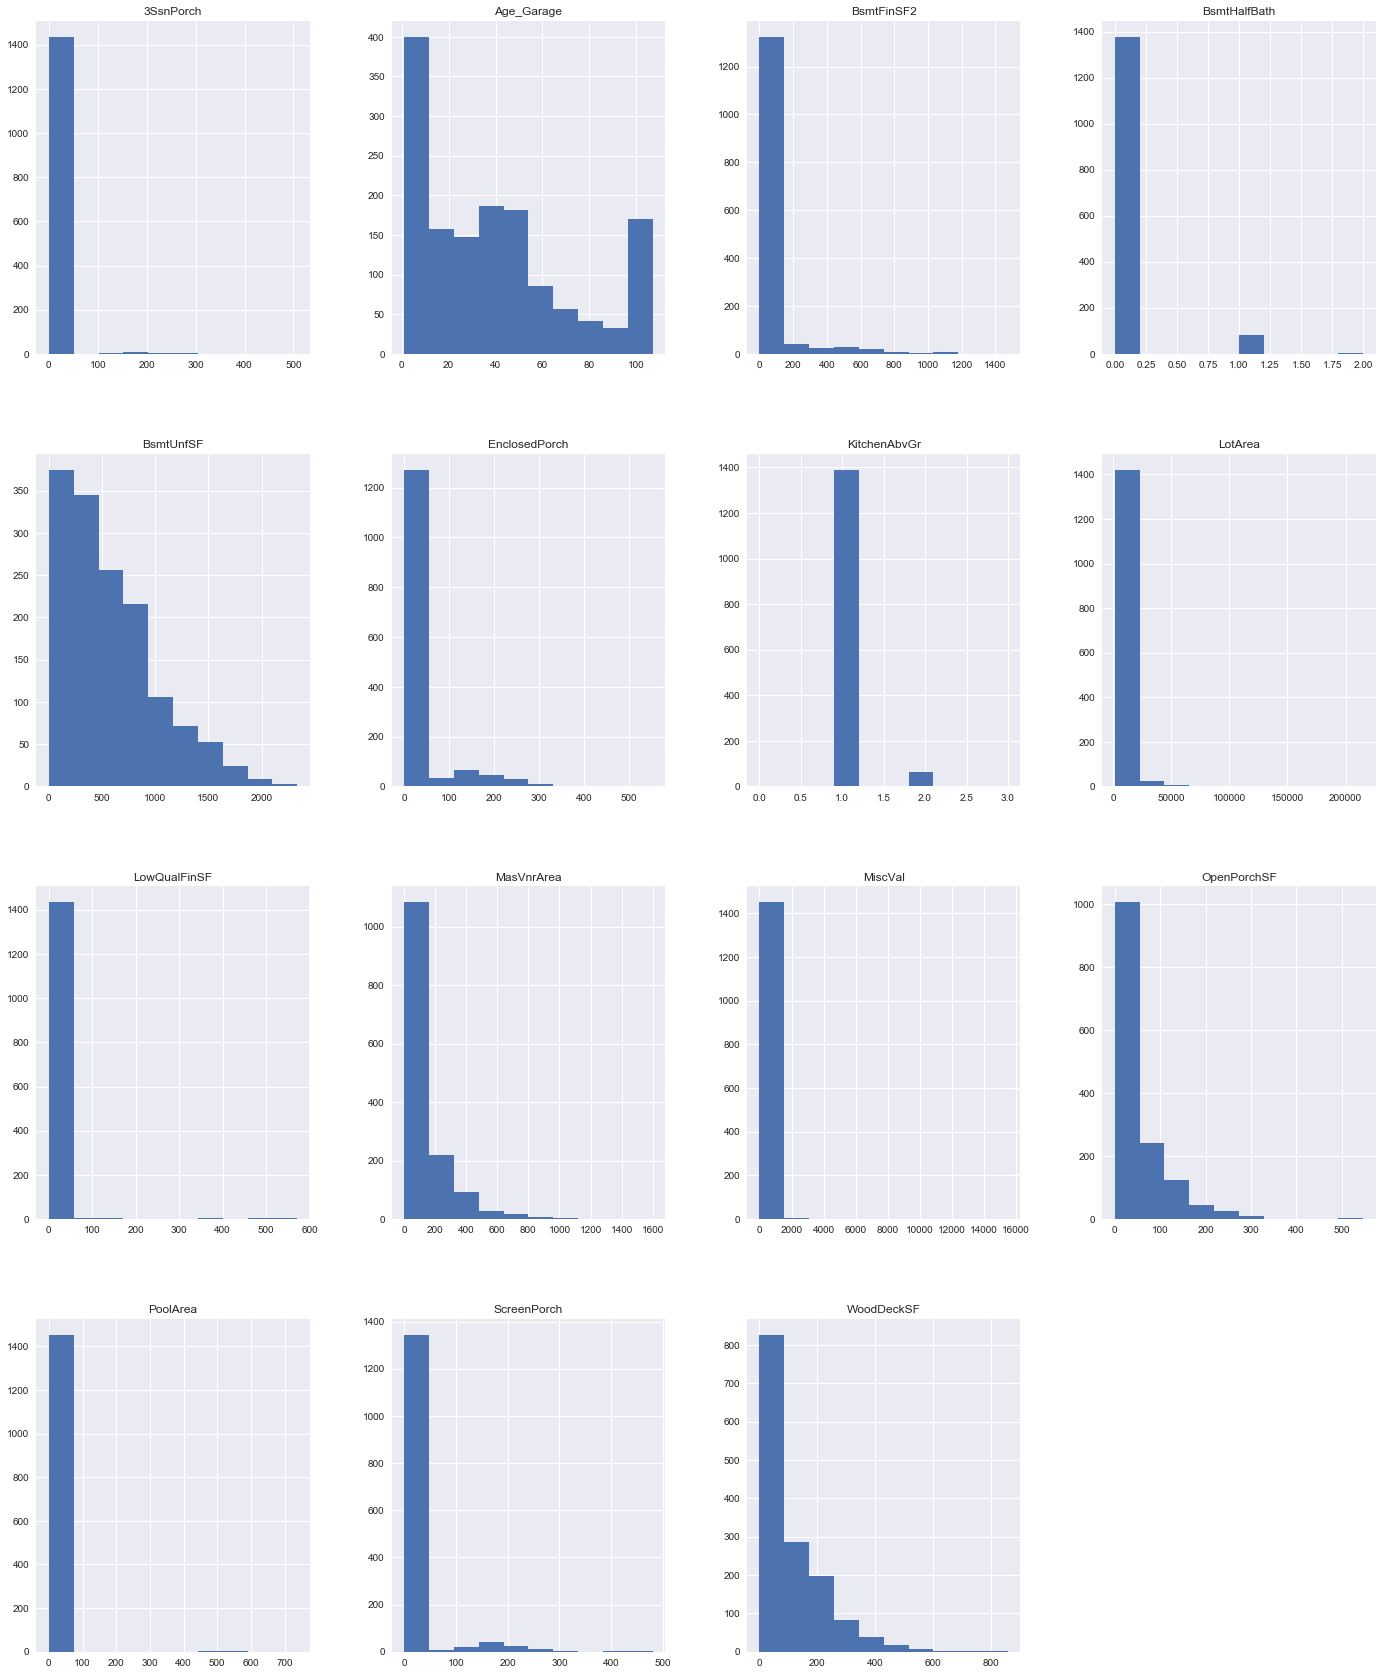

In [1193]:
plt.style.use('seaborn')
train[skew_75].hist(figsize = (24, 30)); # ; for supressing the array information

Looking at the distribution of these highly skewed variables, some of them are tending towards singularity i.e. tending to have a high percentage of similar values. Let's check the count and numeric distribution of those variables that have skewness over 5.

In [1194]:
for e in skew_val[skew_val > 5].index:
    print(e, ('-'*len(e)), (train[e].value_counts().head() / len(train)) * 100, sep = '\n')
    print('\n#############################################\n')

LotArea
-------
7200     1.713502
9600     1.644962
6000     1.165182
9000     0.959561
10800    0.959561
Name: LotArea, dtype: float64

#############################################

LowQualFinSF
------------
0      98.217958
80      0.205620
360     0.137080
528     0.068540
53      0.068540
Name: LowQualFinSF, dtype: float64

#############################################

3SsnPorch
---------
0      98.355038
168     0.205620
216     0.137080
144     0.137080
180     0.137080
Name: 3SsnPorch, dtype: float64

#############################################

PoolArea
--------
0      99.520219
738     0.068540
648     0.068540
576     0.068540
555     0.068540
Name: PoolArea, dtype: float64

#############################################

MiscVal
-------
0      96.435915
400     0.753941
500     0.548321
700     0.342700
450     0.274160
Name: MiscVal, dtype: float64

#############################################



As can be seen, we have four variables with over 95% of distribution being occupied by 0. We will remove these variables from our data set.

In [1195]:
train = train.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'], axis = 1)
train.shape

(1459, 57)

In [1196]:
test = test.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'], axis = 1)
test.shape

(1446, 56)

We will now transform the remaining skewed variables using the 'log + 1' transformation.

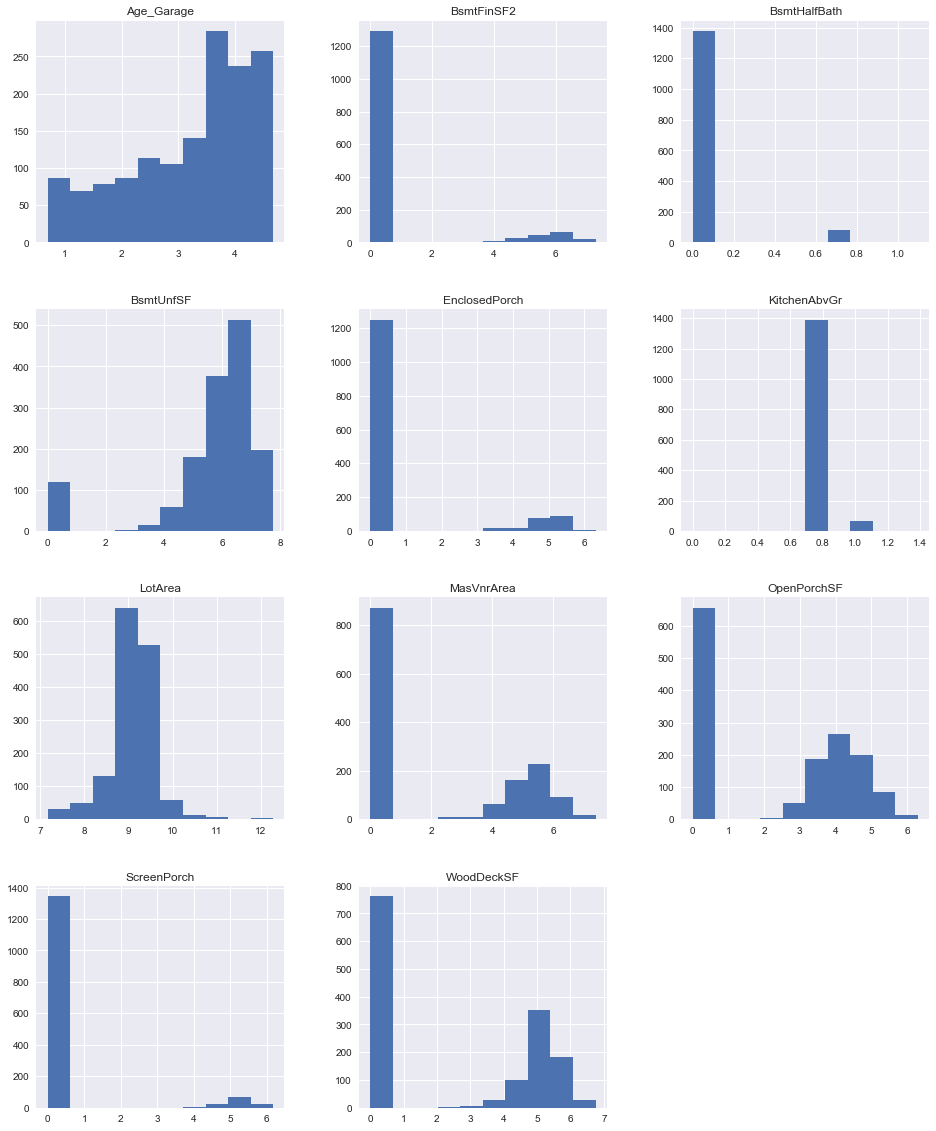

In [1197]:
for e in ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']:
    skew_75.remove(e)

for e in skew_75:
    train[e] = np.log1p(train[e])
    test[e] = np.log1p(test[e])
    
train[skew_75].hist(figsize = (16, 20));

Now that we have cleaned our data, we will rename our dataset to df and create the df_x and df_y sets as well as extract column names to work with our data more efficiently.

In [1198]:
train_id = train['Id'] # extracting for future use, if needed
df = train.drop(['Id'], axis = 1)
df_y = df['SalePrice']
df_x = df.drop(['SalePrice'], axis = 1)
cols = df_x.columns
cols_num, cols_cat = [], []
for e in cols:
    if df_x[e].dtype in ('float64', 'int64'):
        cols_num.append(e)
    else:
        cols_cat.append(e)

### 3. Exploratory Data Analysis
#### 3.1 Categorical Variables

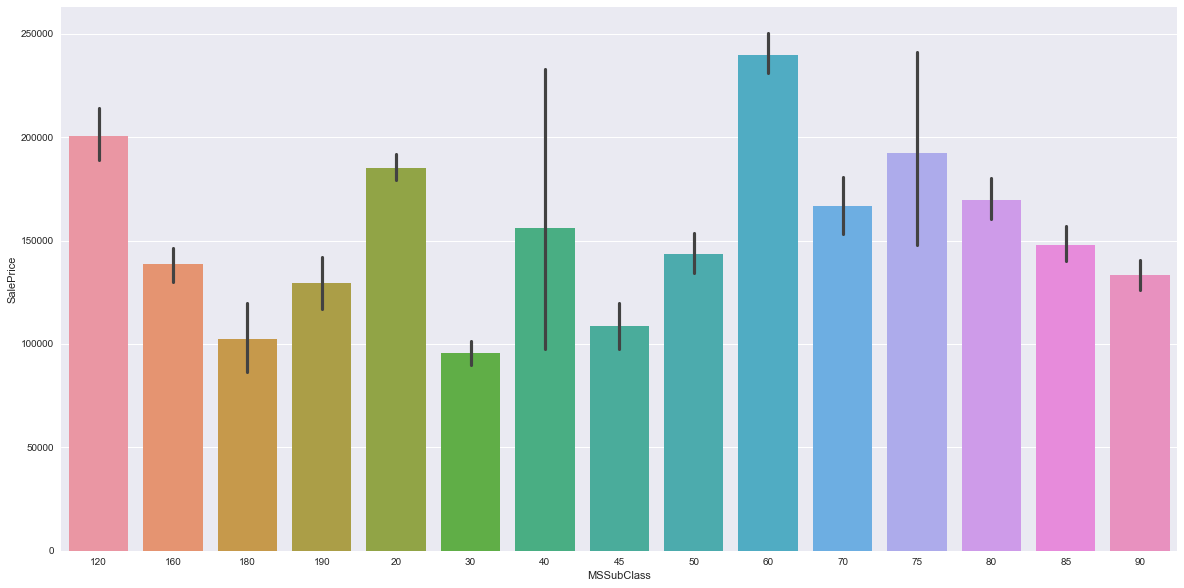

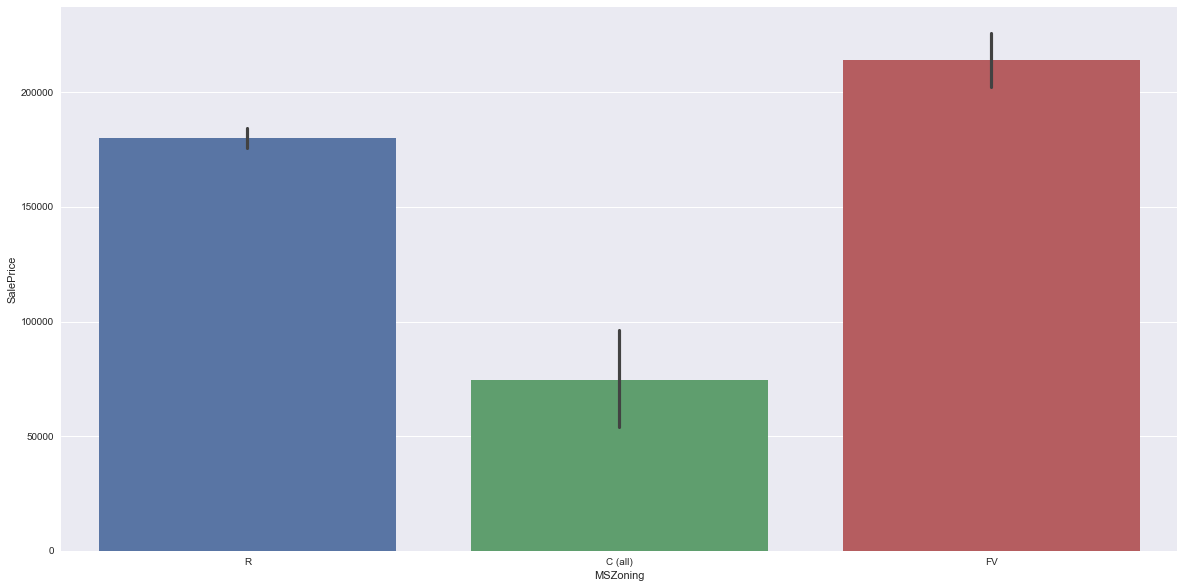

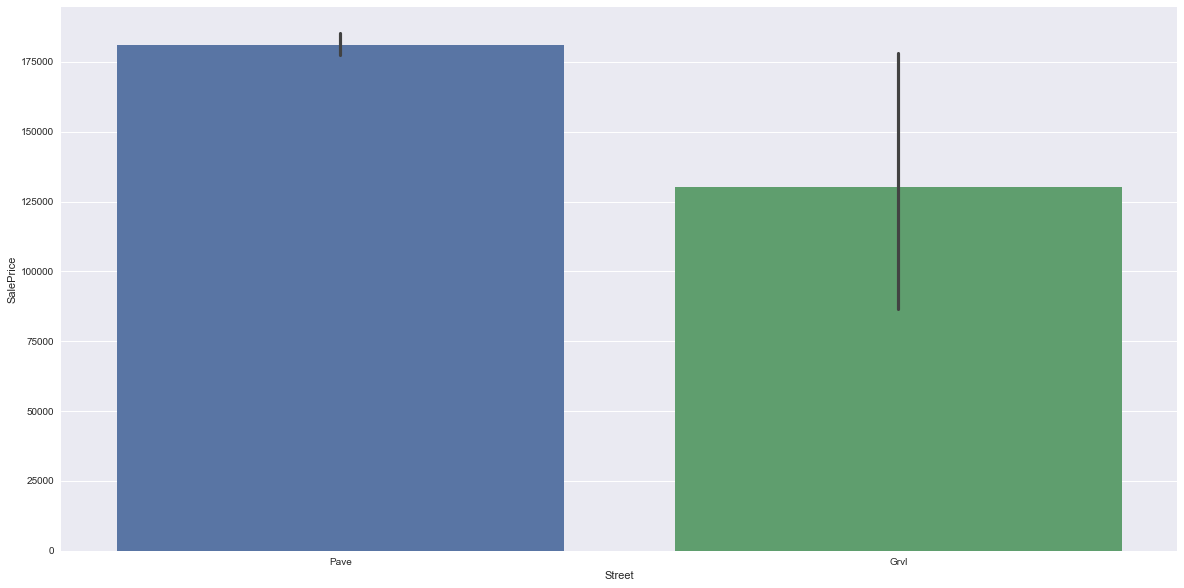

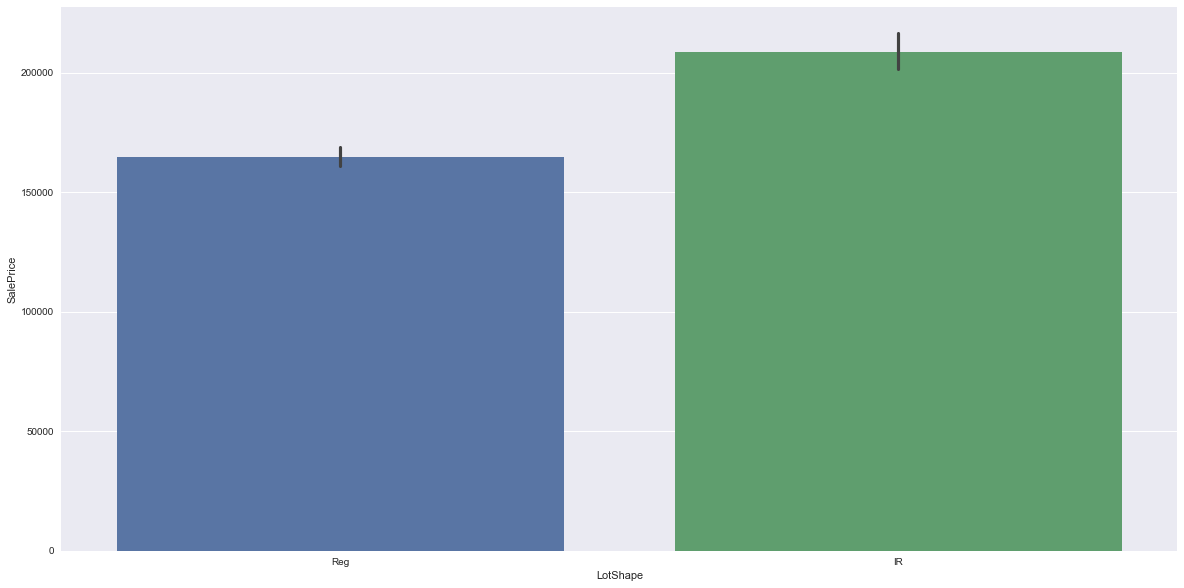

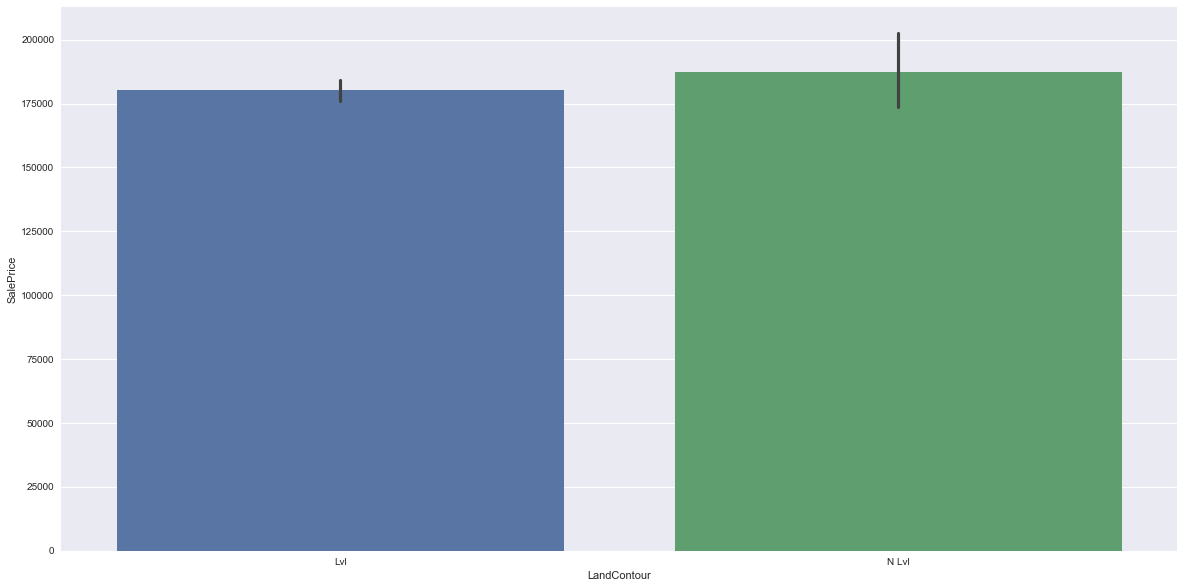

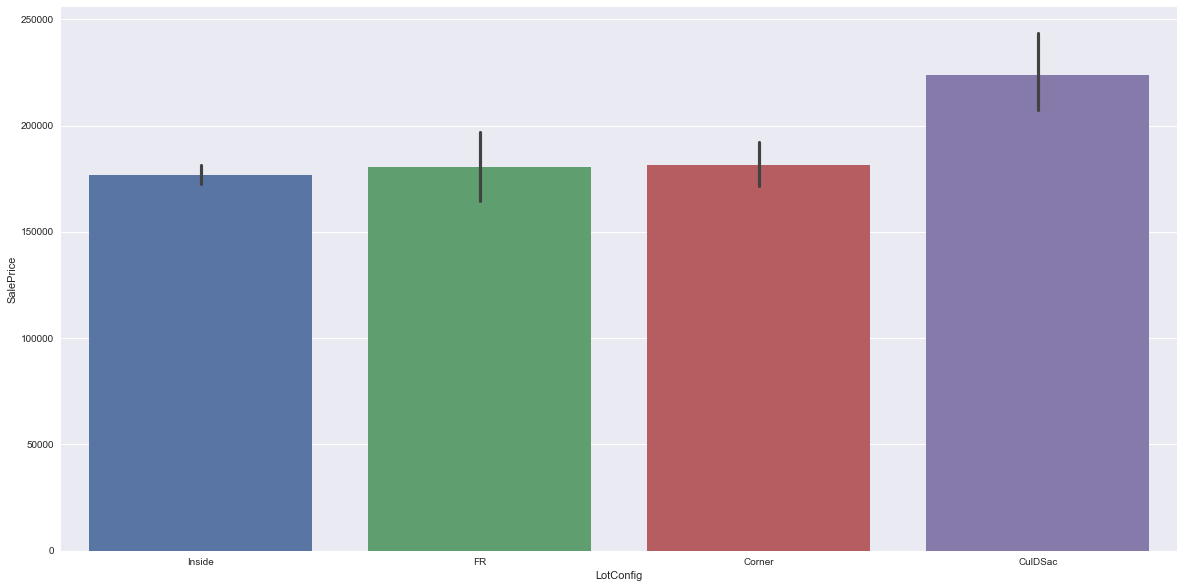

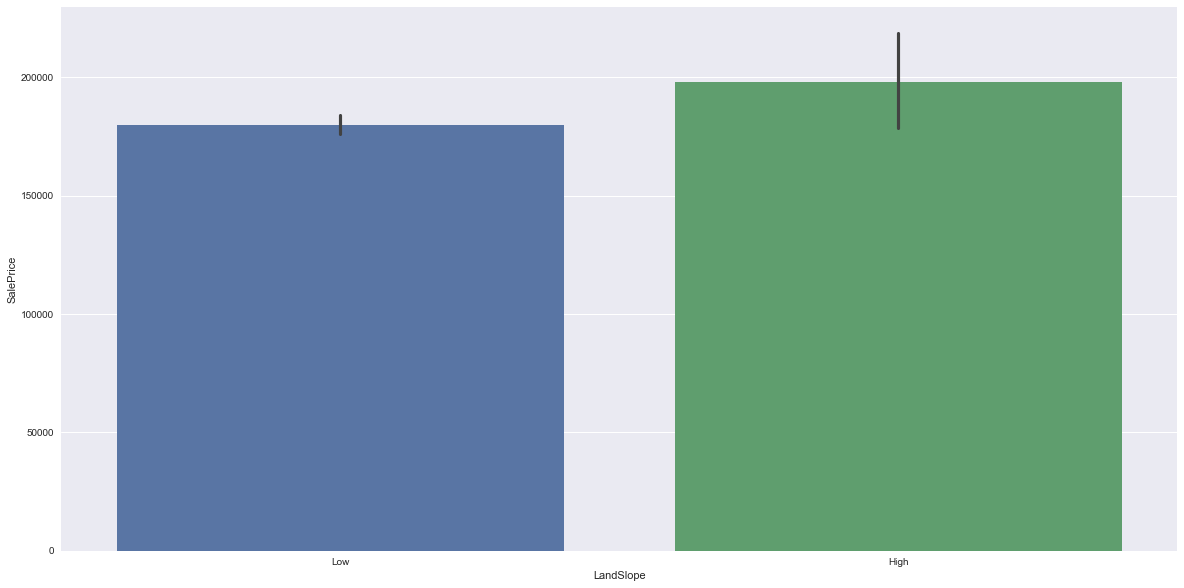

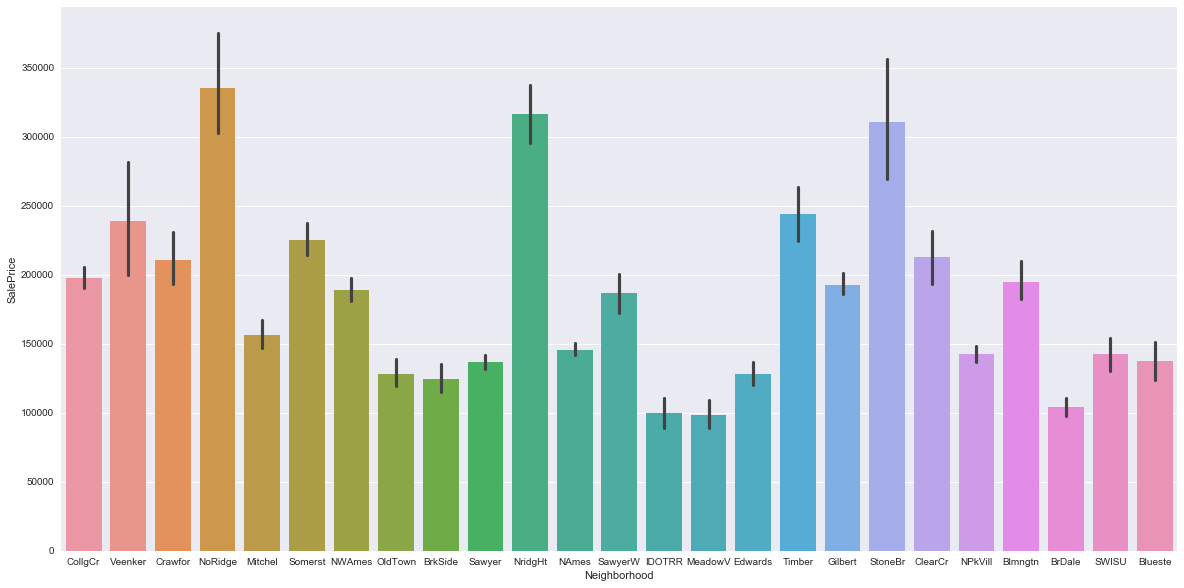

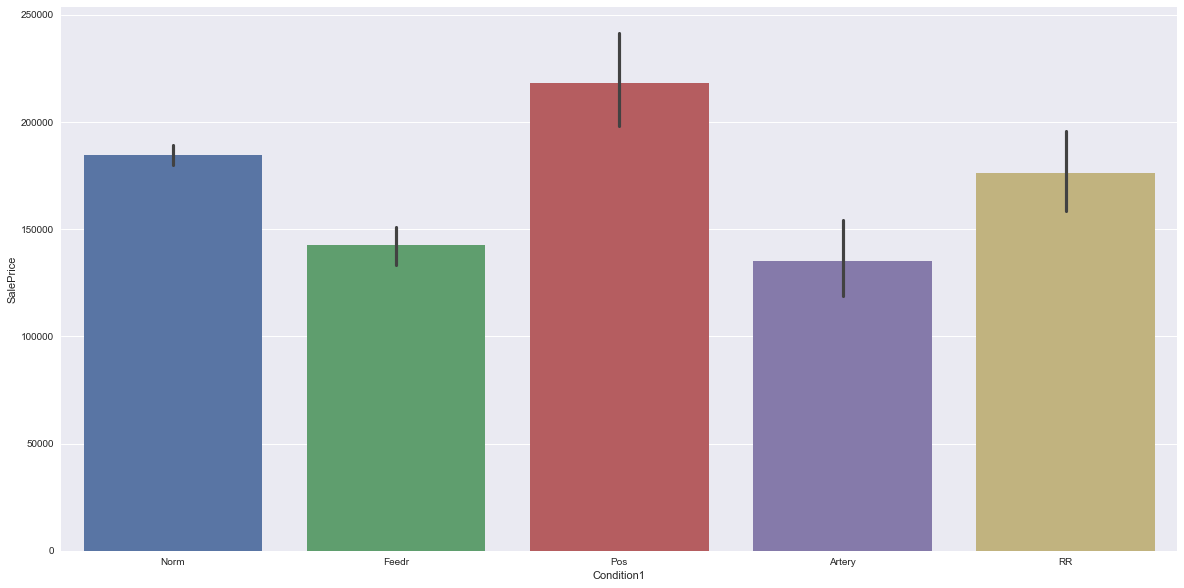

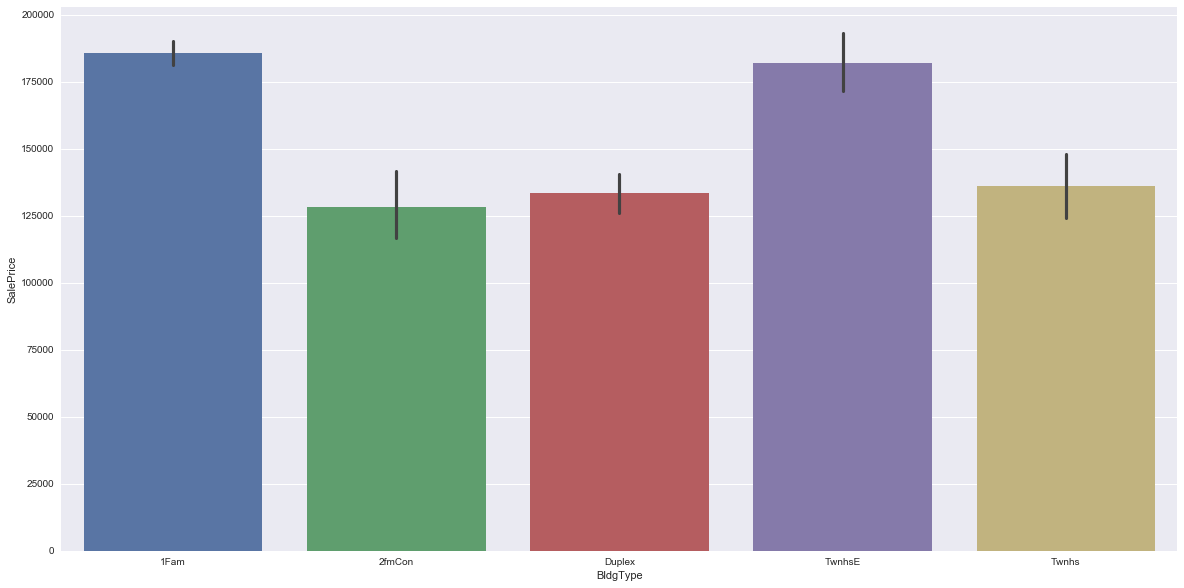

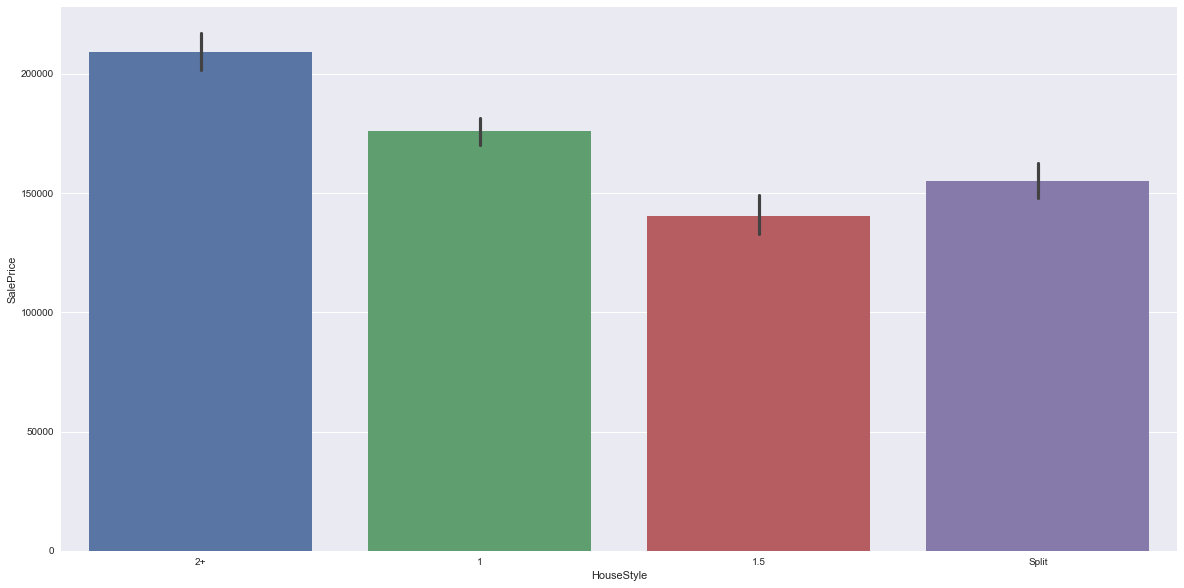

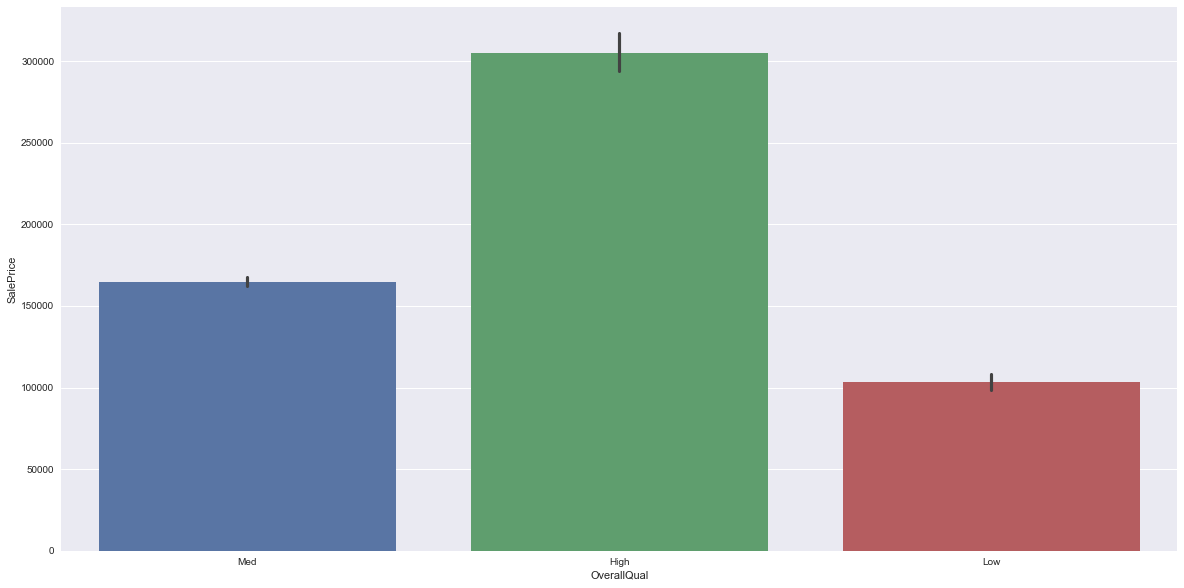

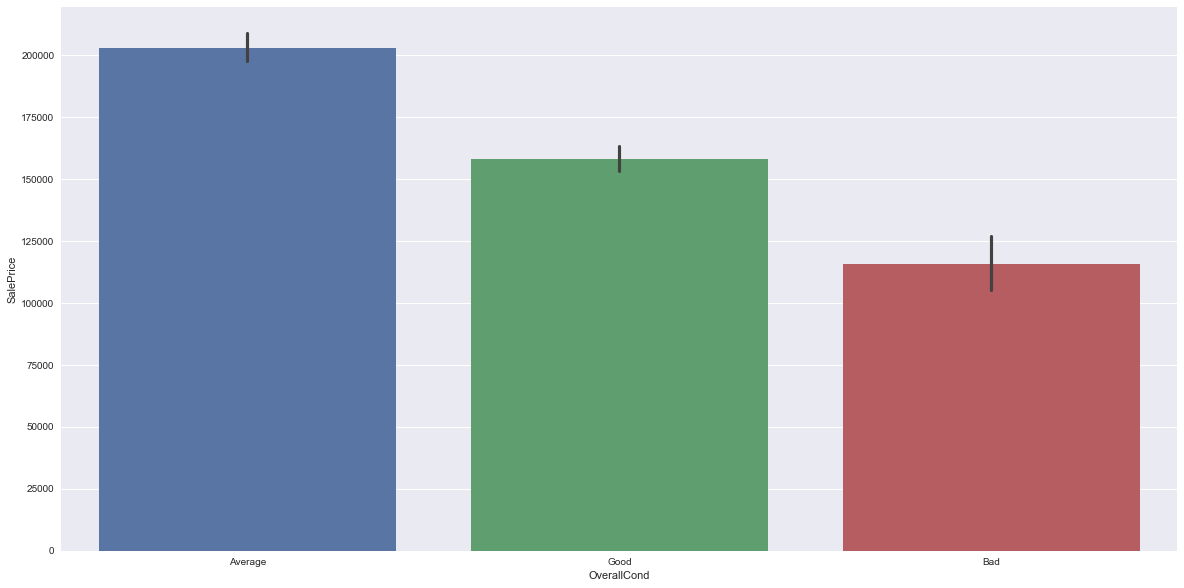

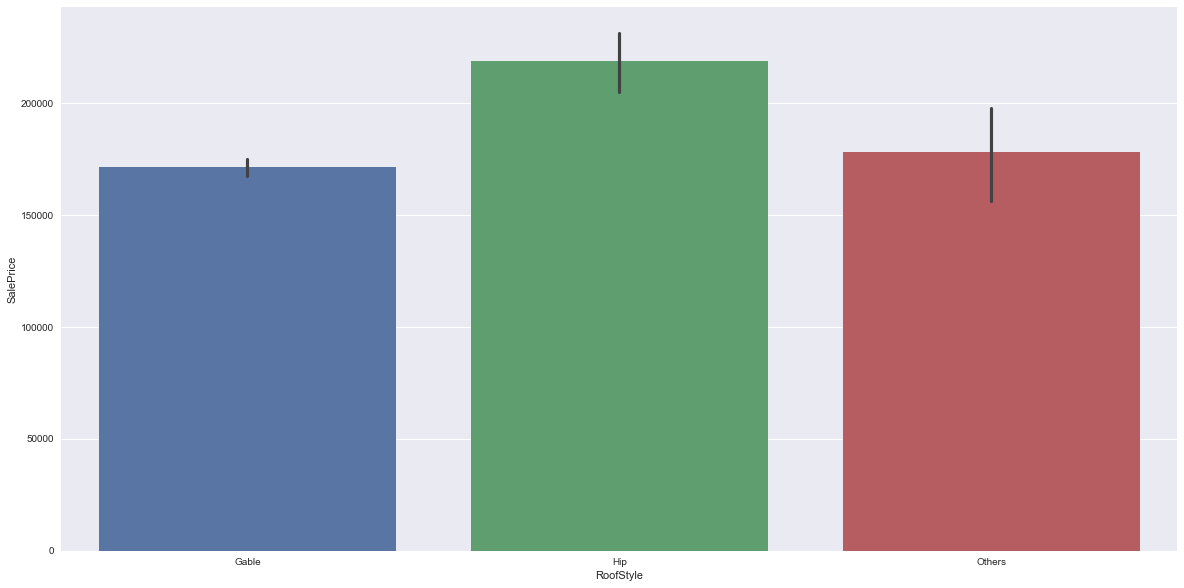

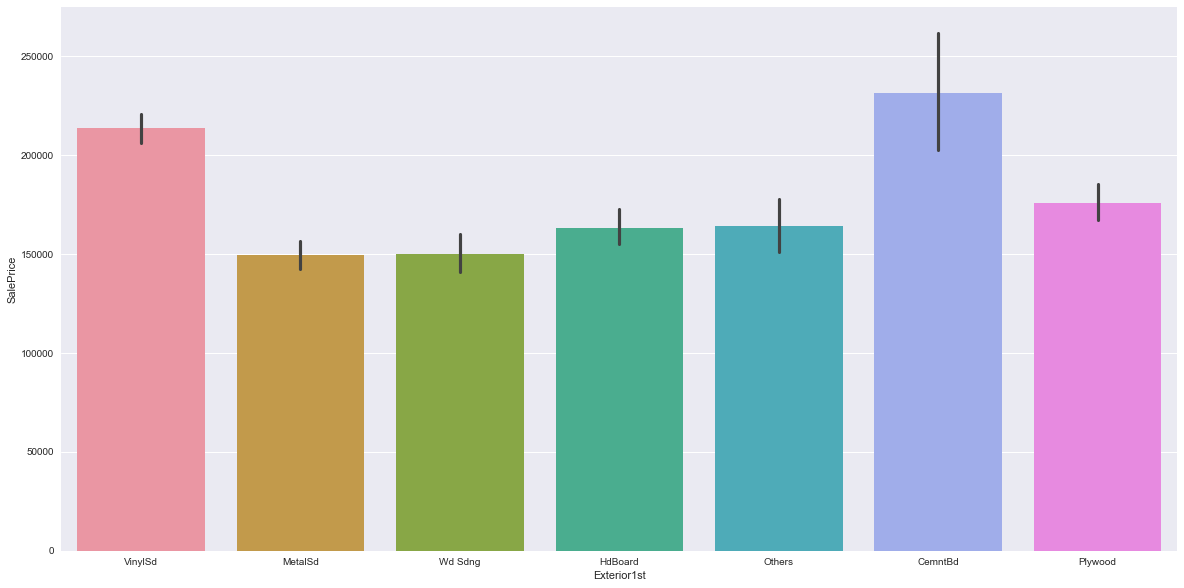

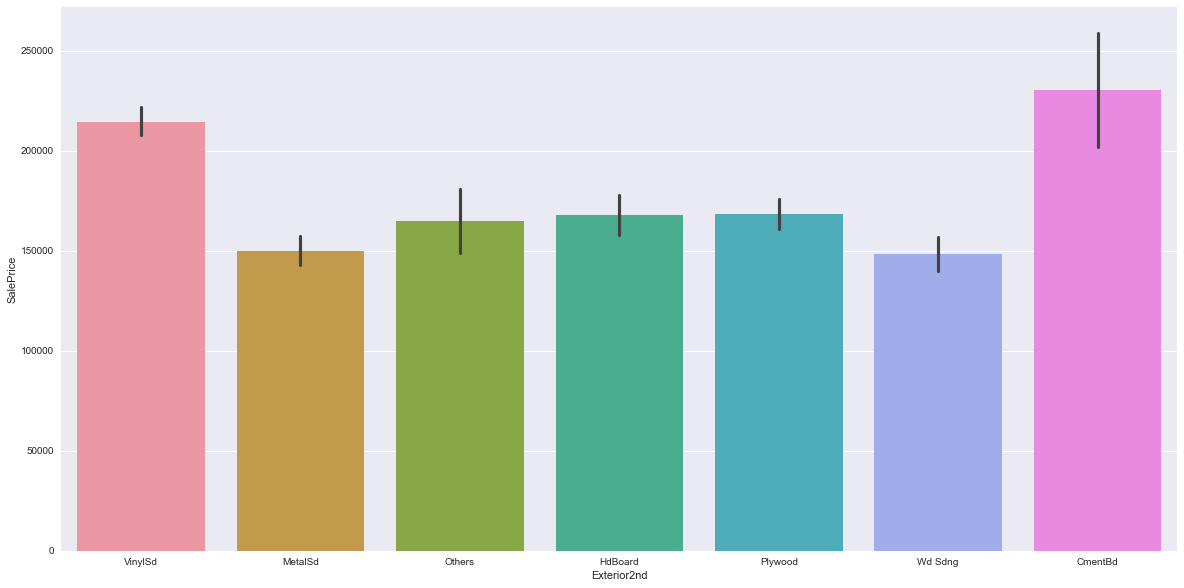

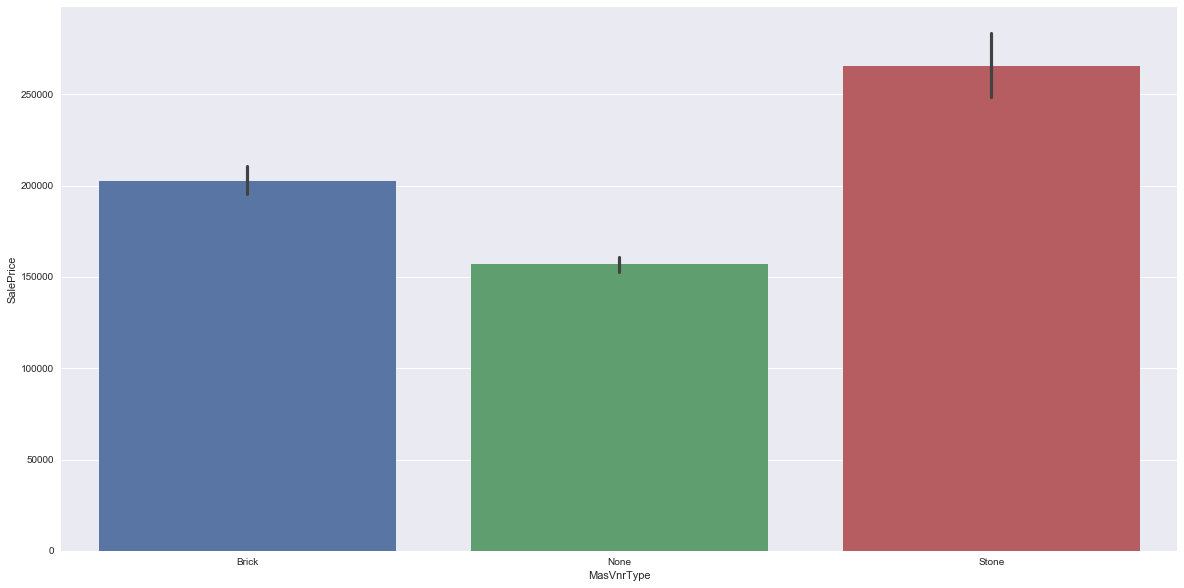

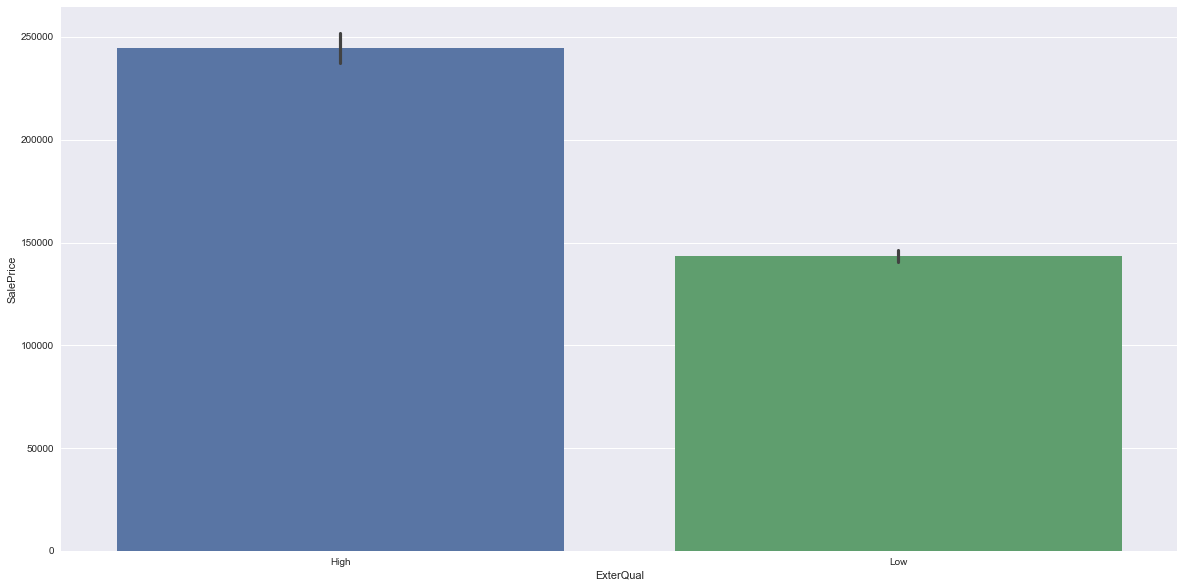

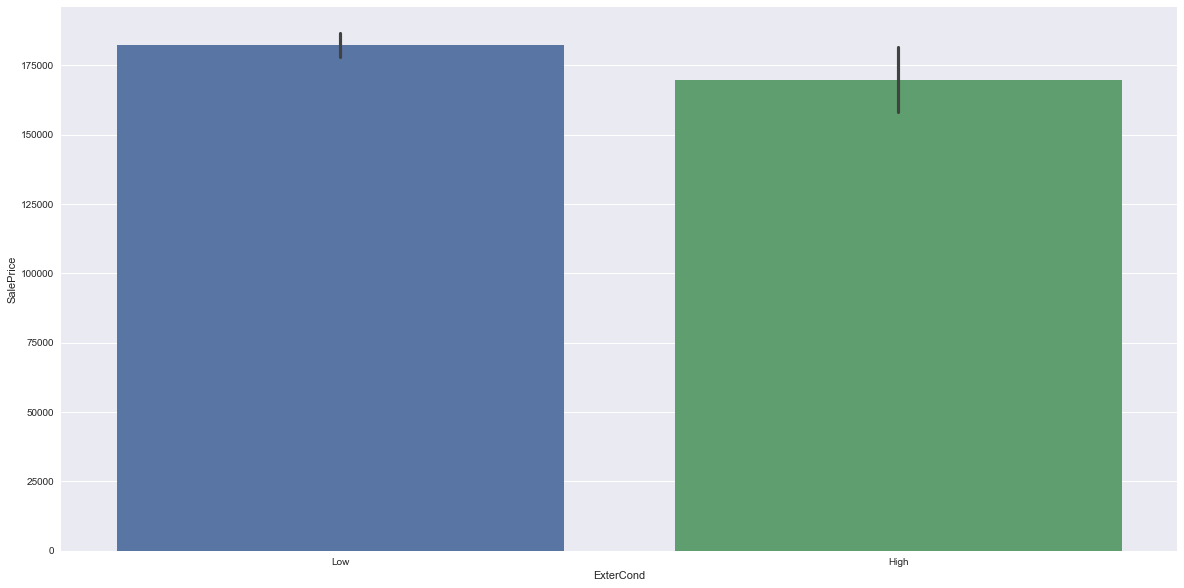

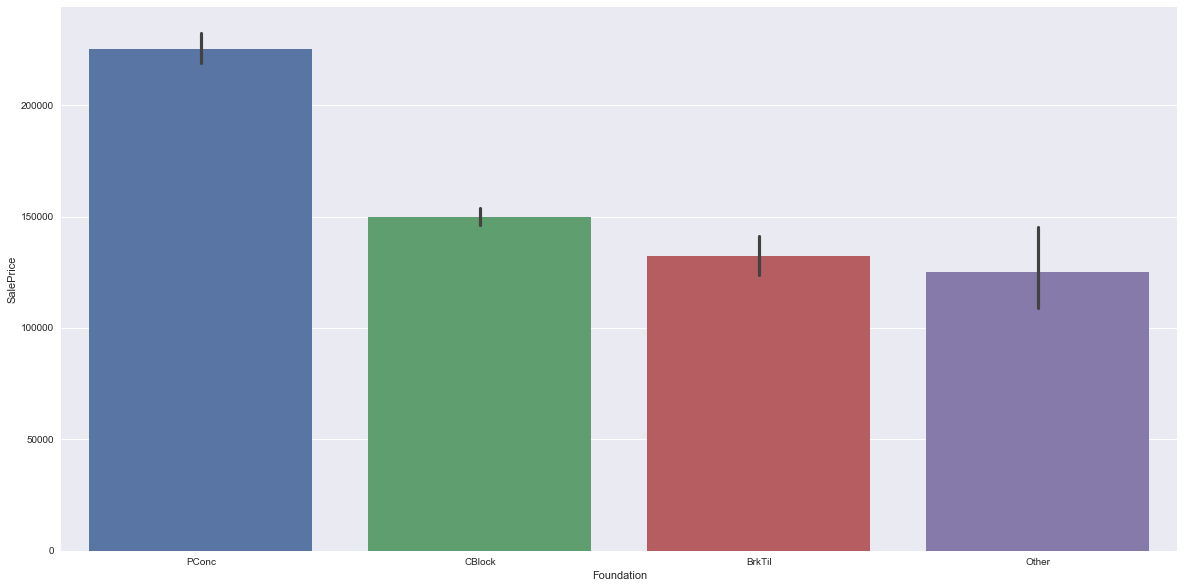

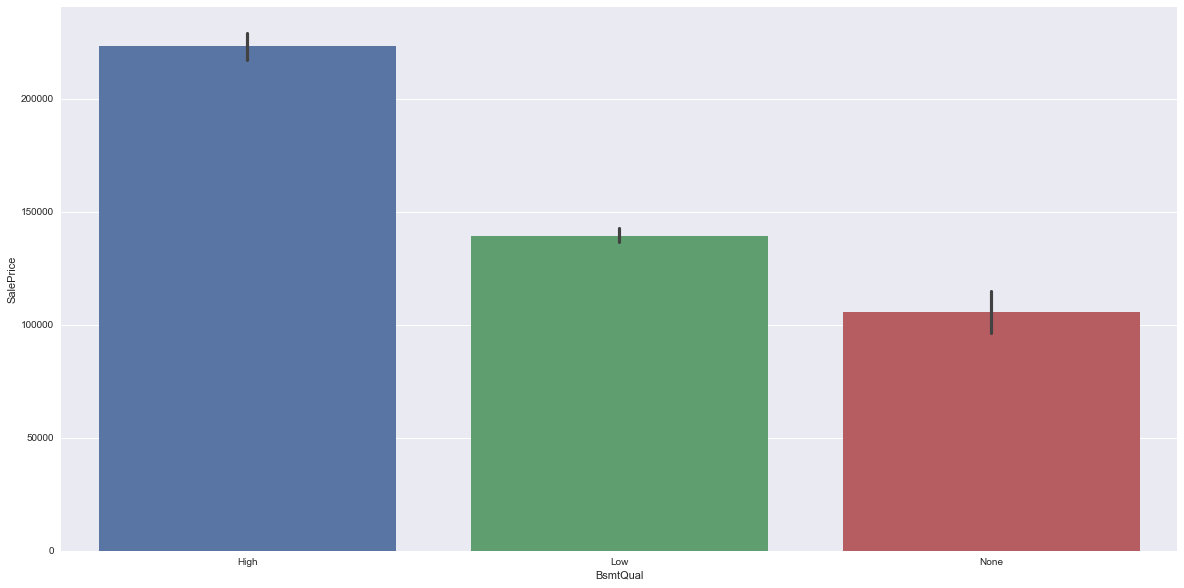

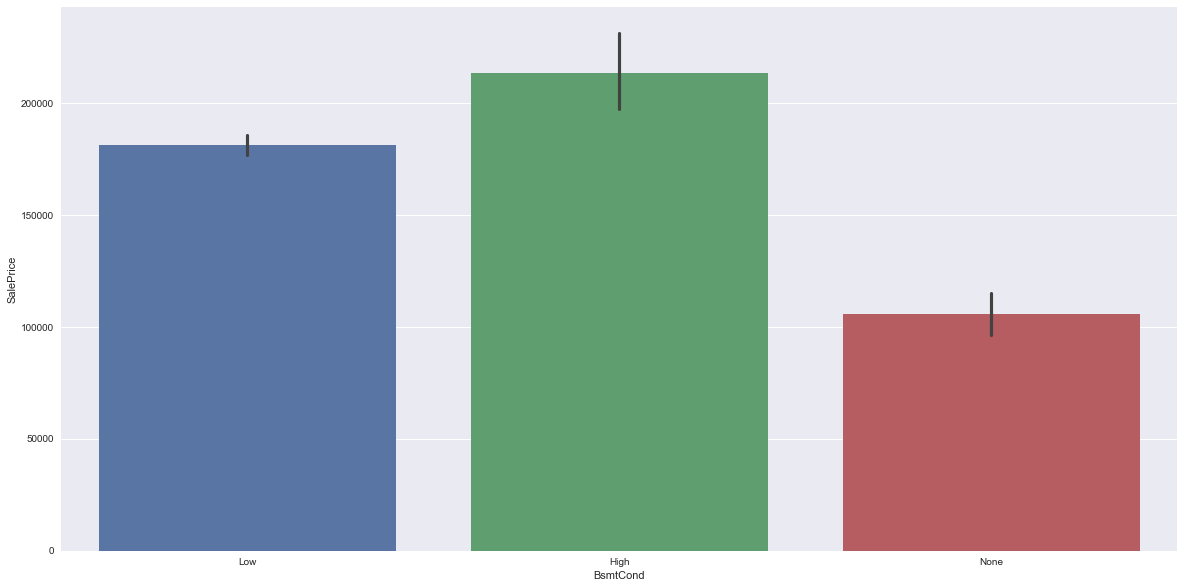

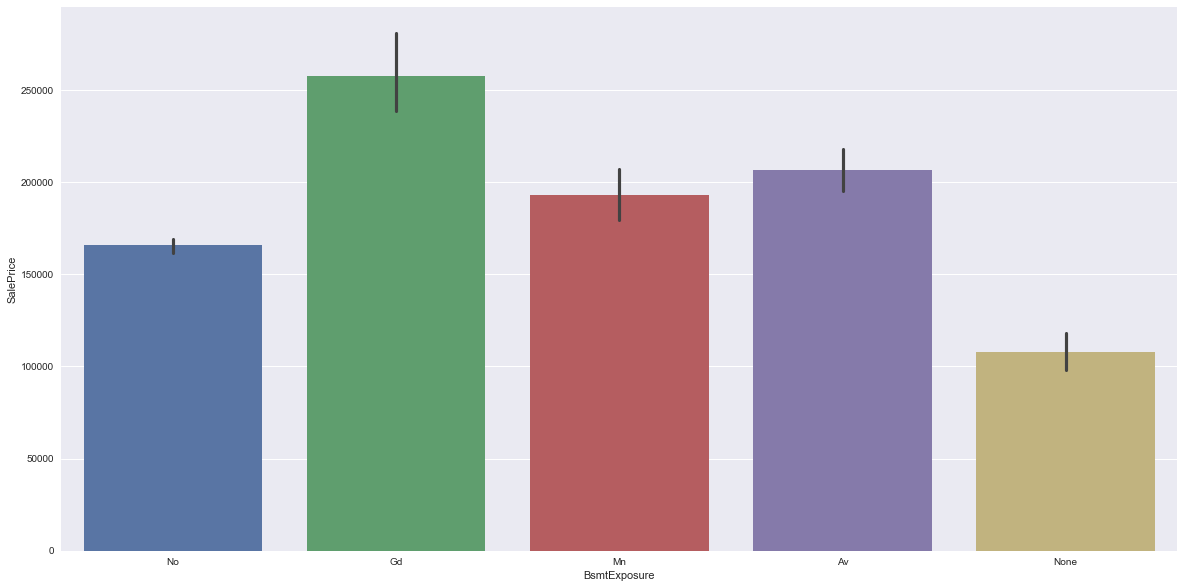

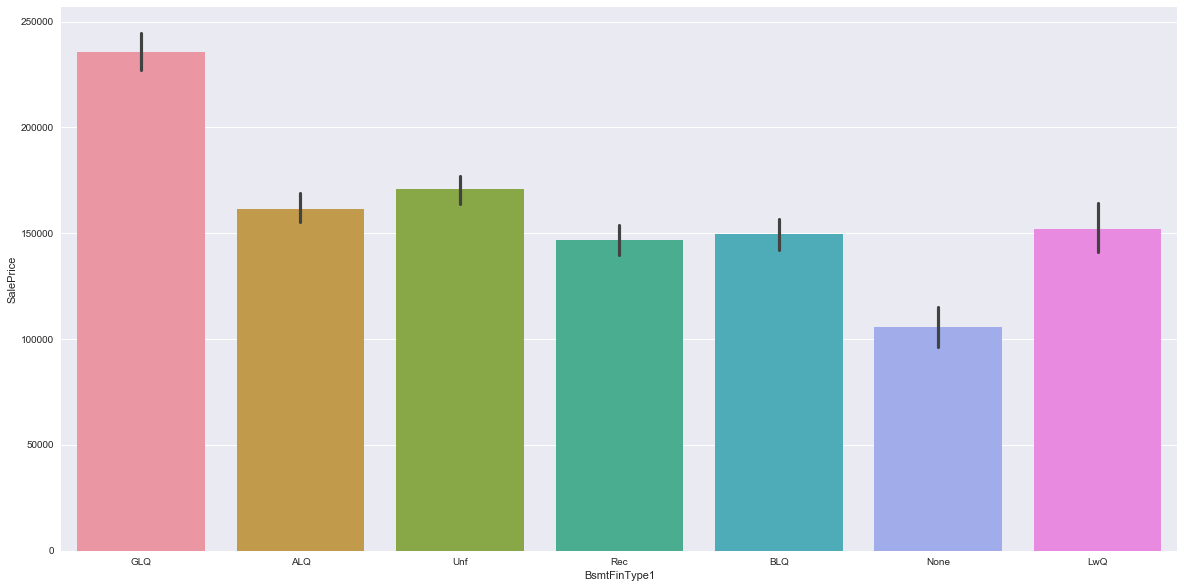

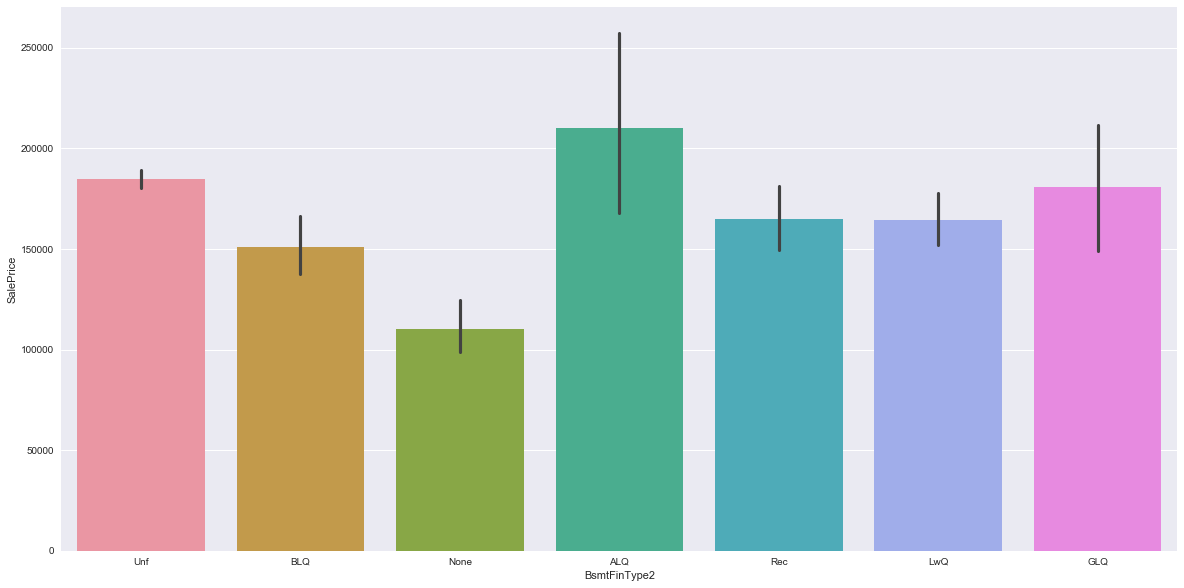

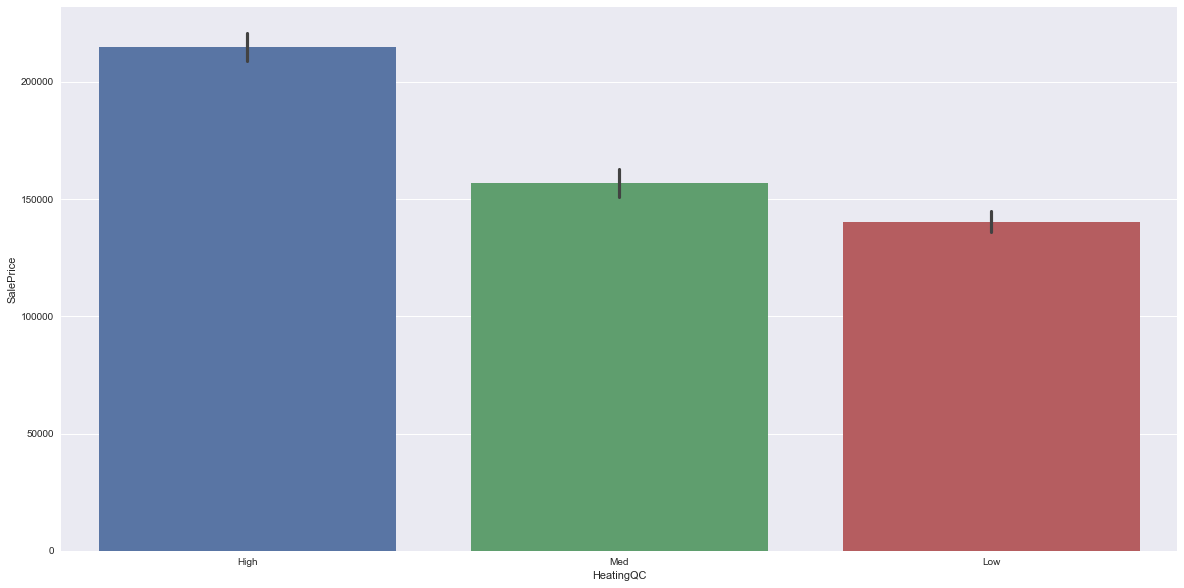

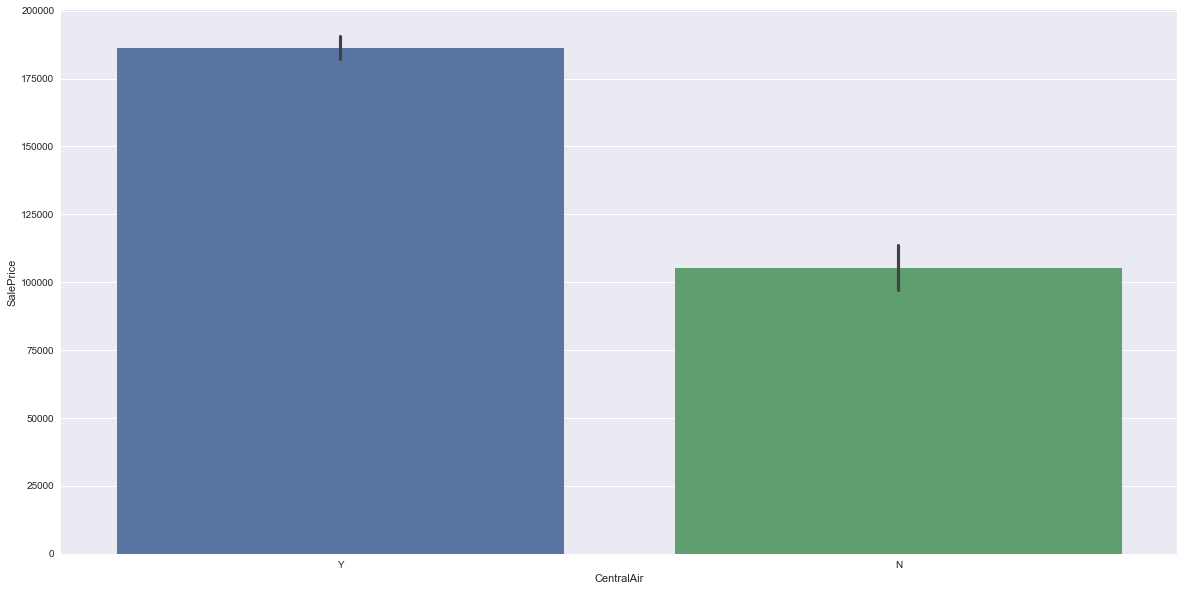

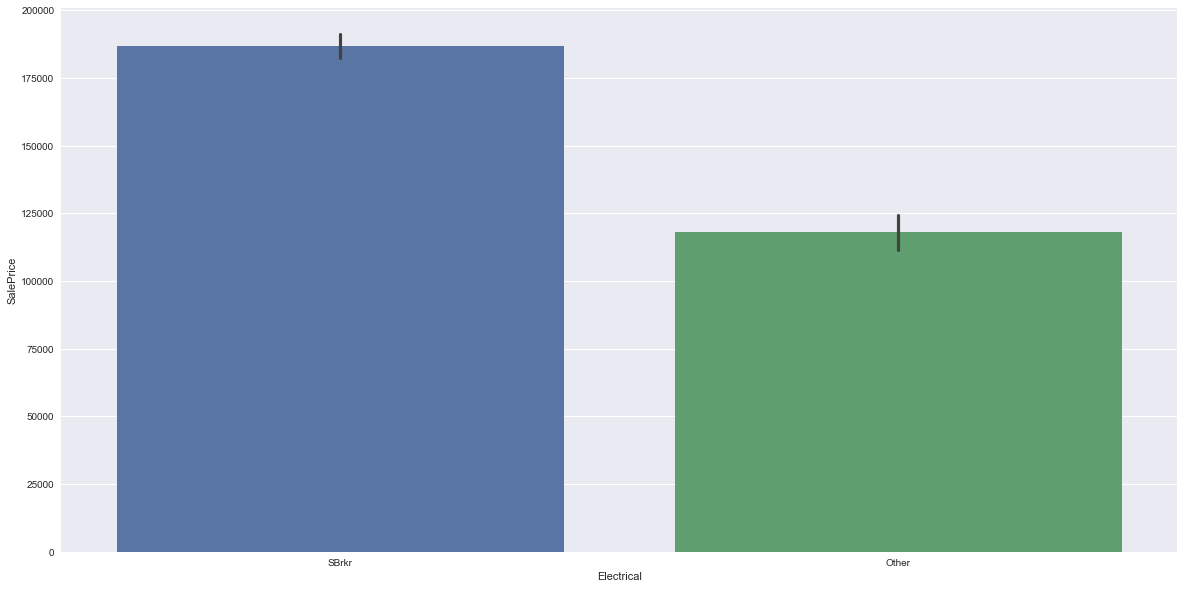

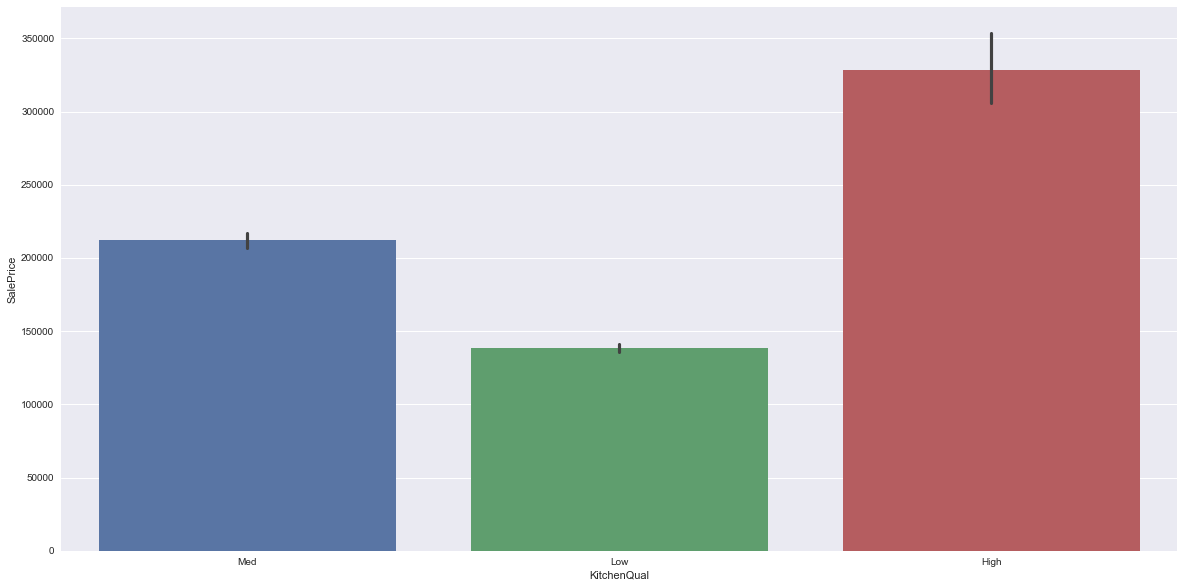

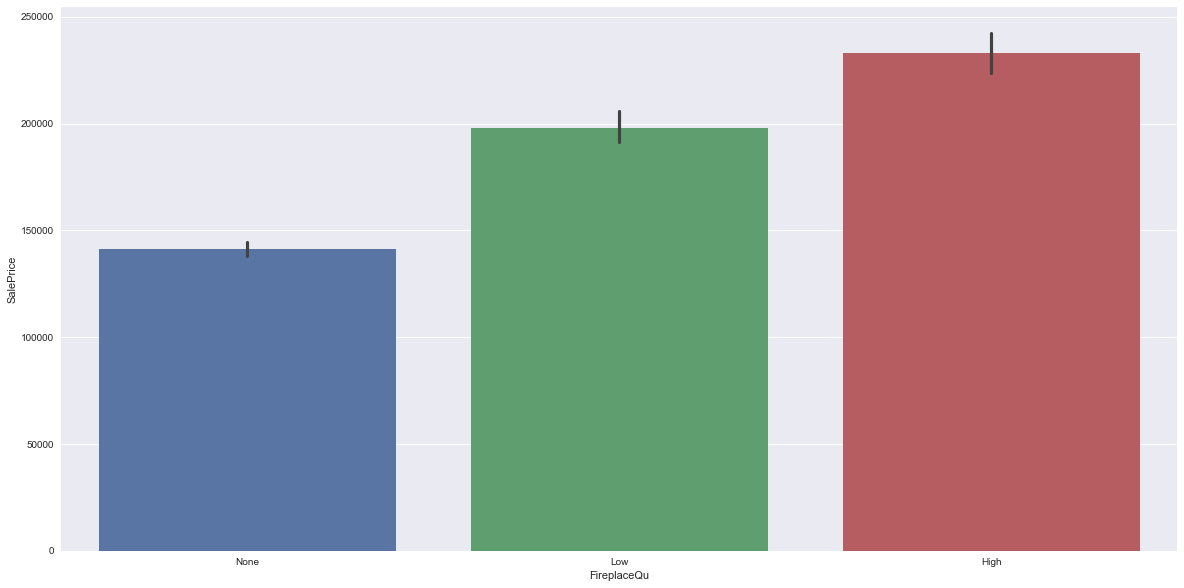

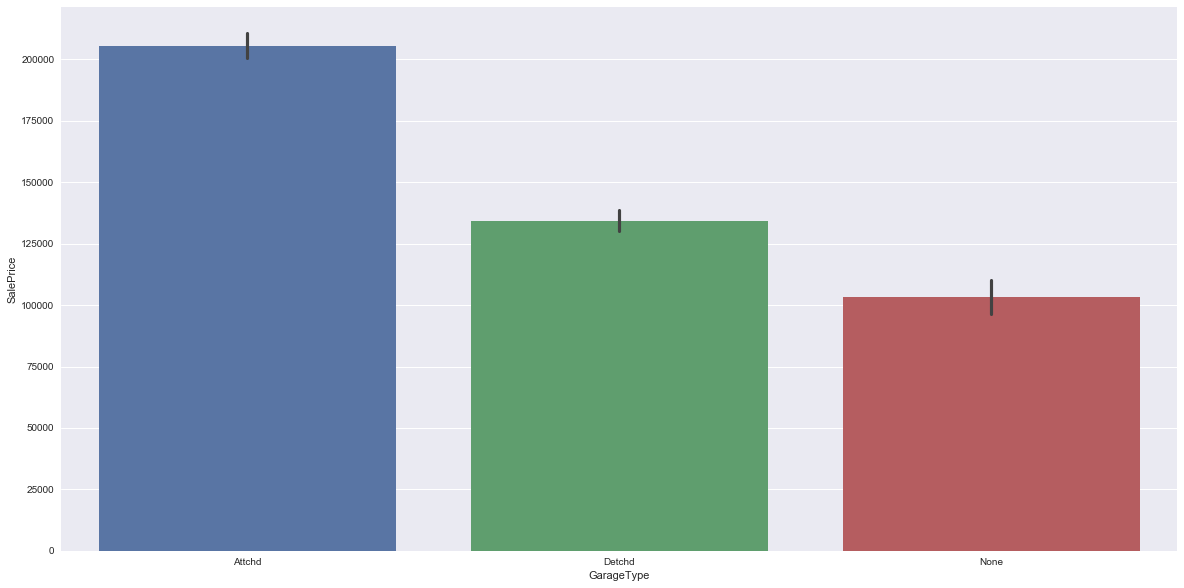

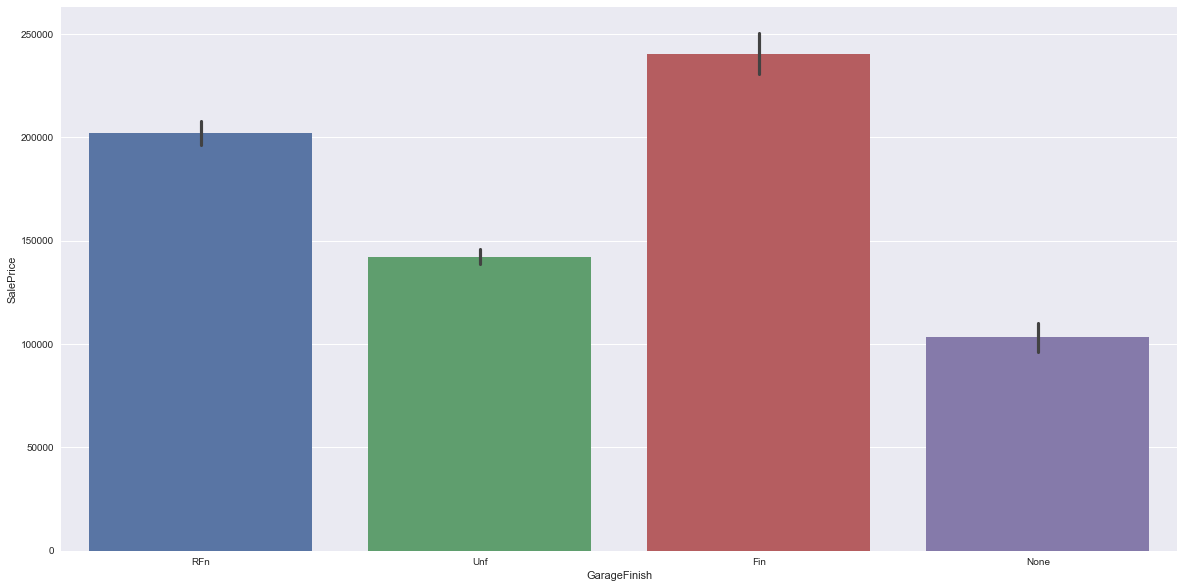

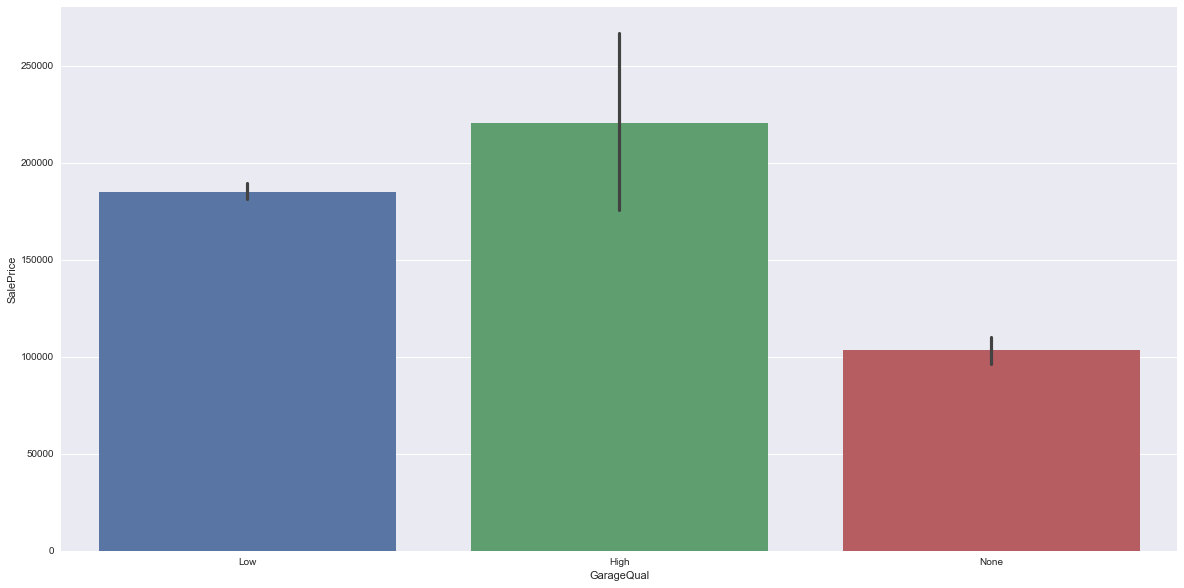

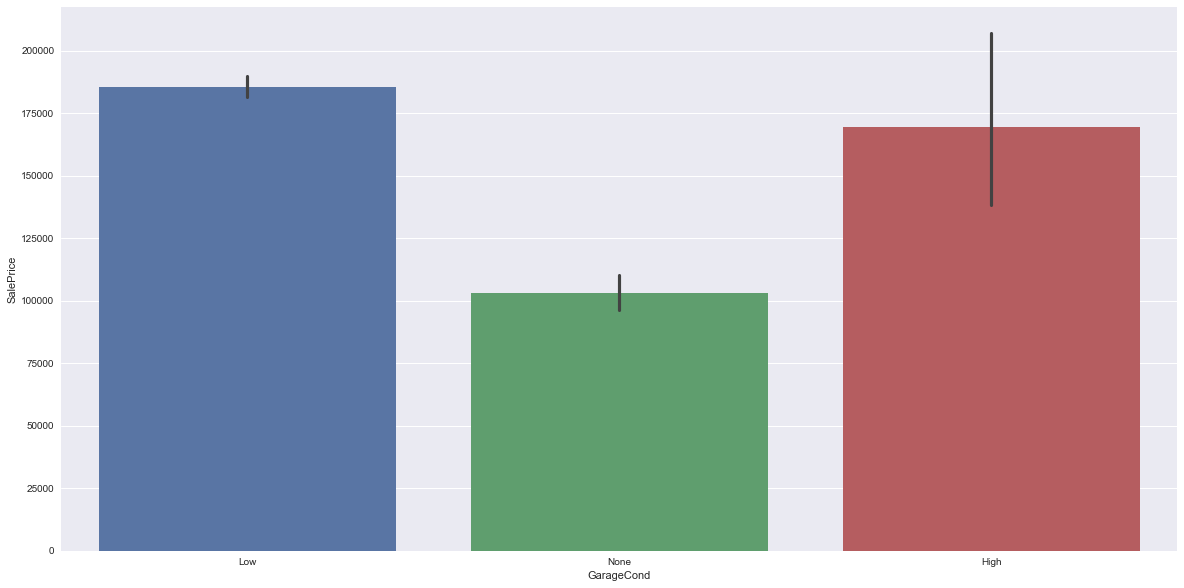

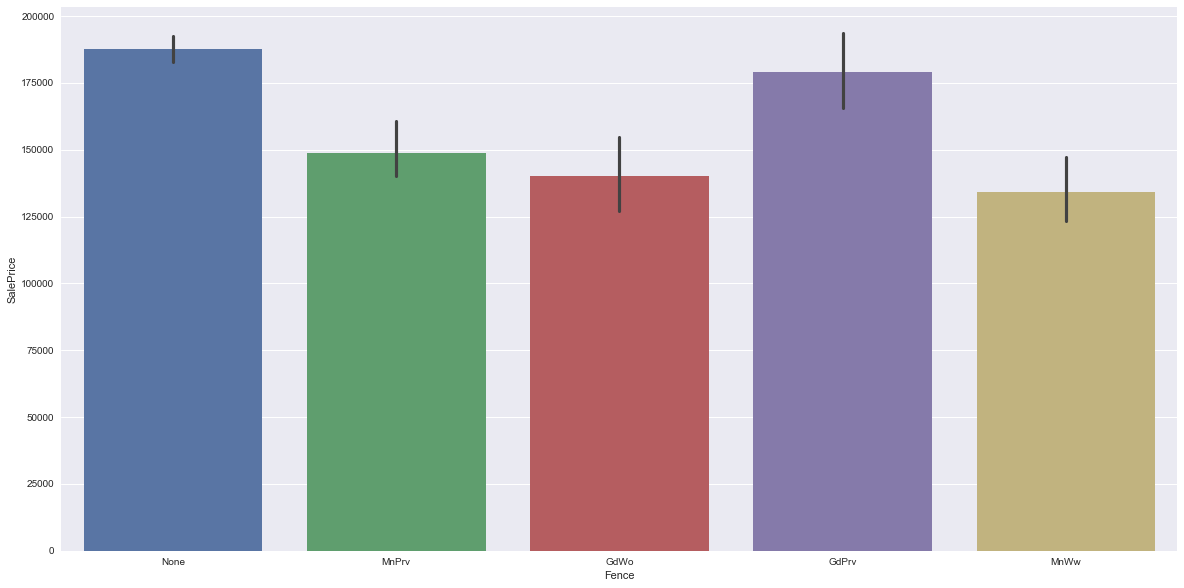

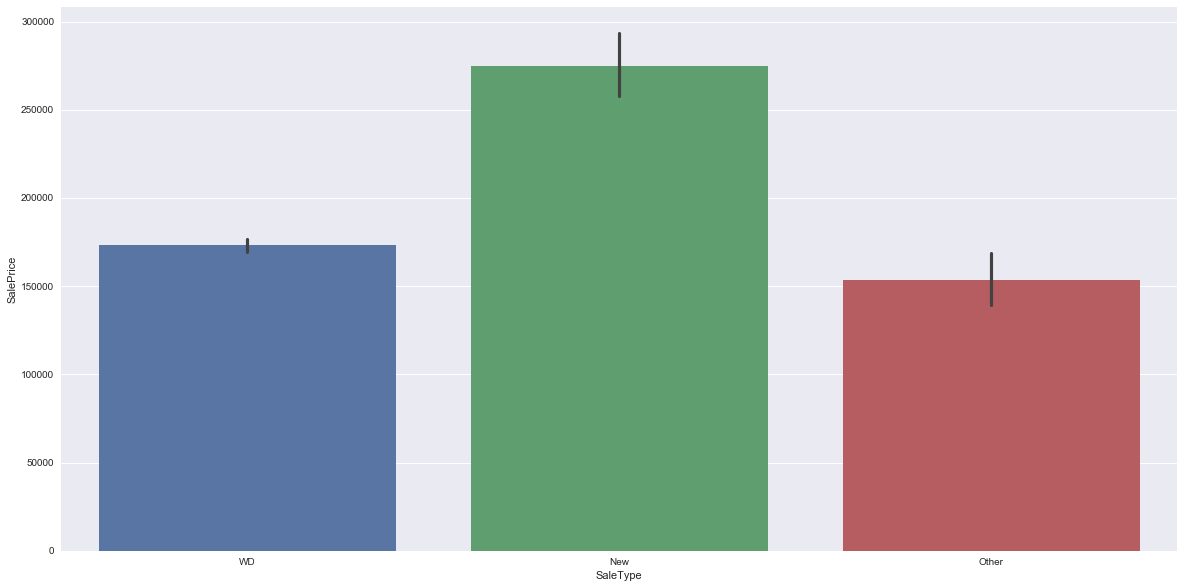

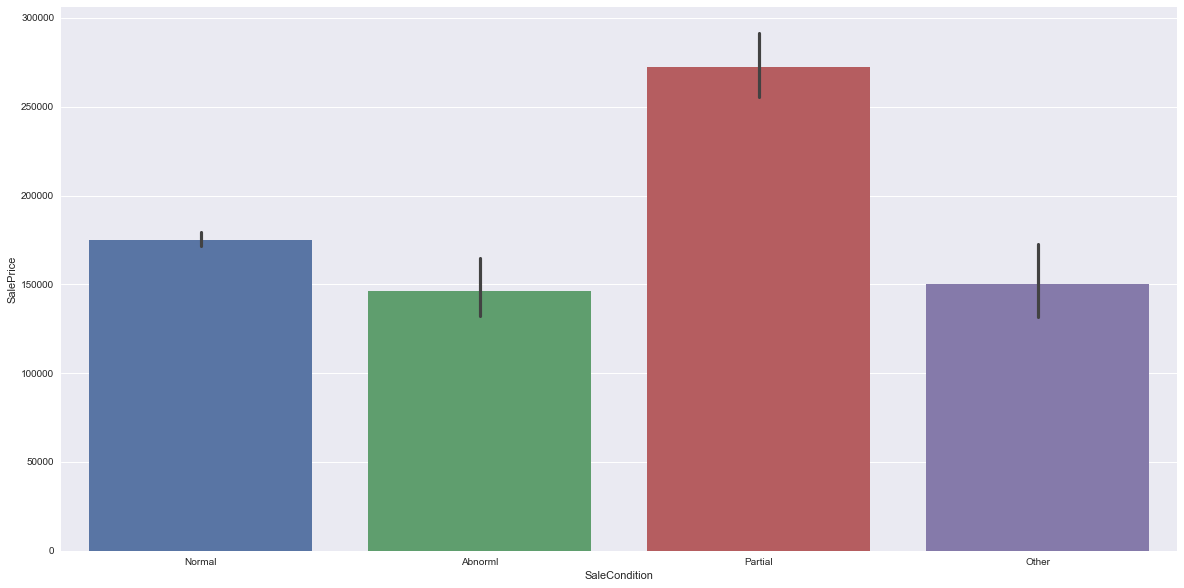

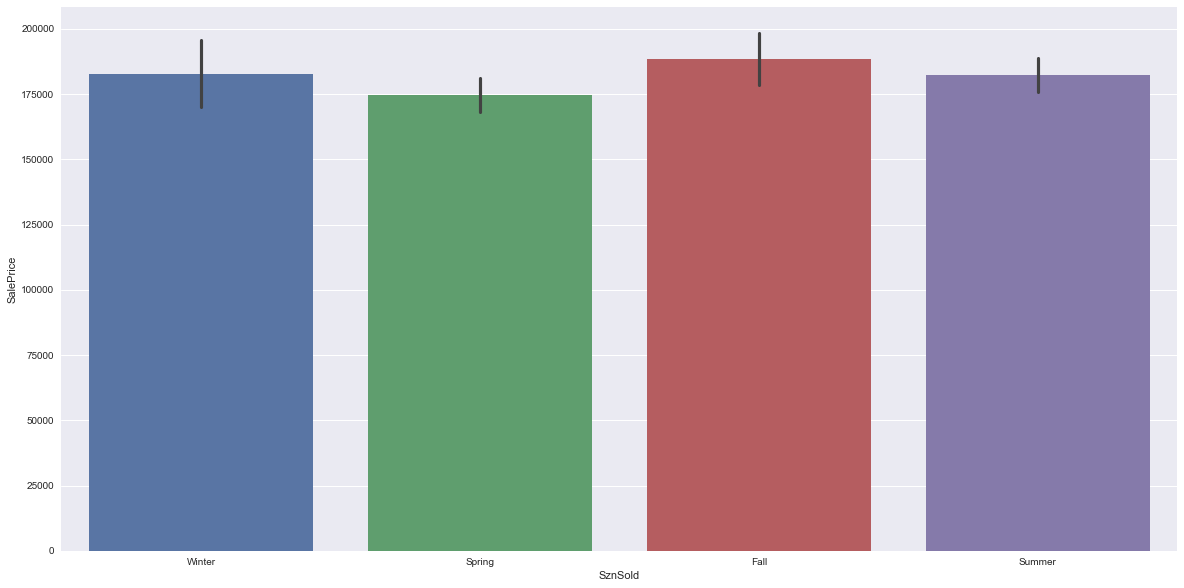

In [1202]:
plt.rcParams['figure.figsize'] = [20, 10]
for e in cols_cat:
    sns.barplot(x = df_x[e], y = df_y);
    plt.show()

#### 3.2 Numerical Variables

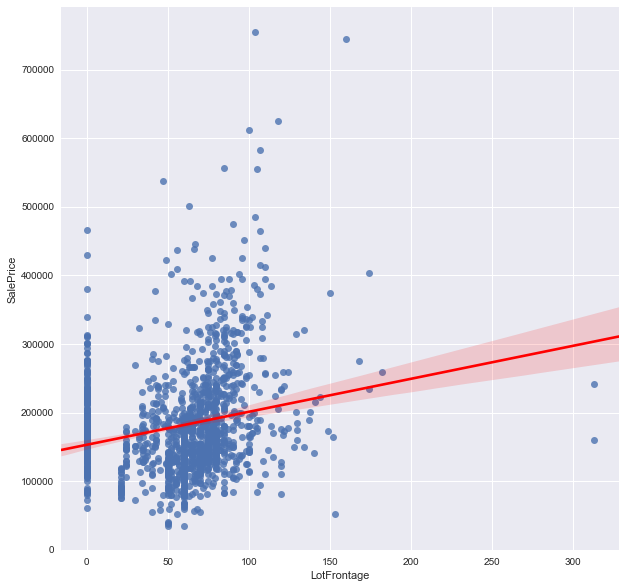

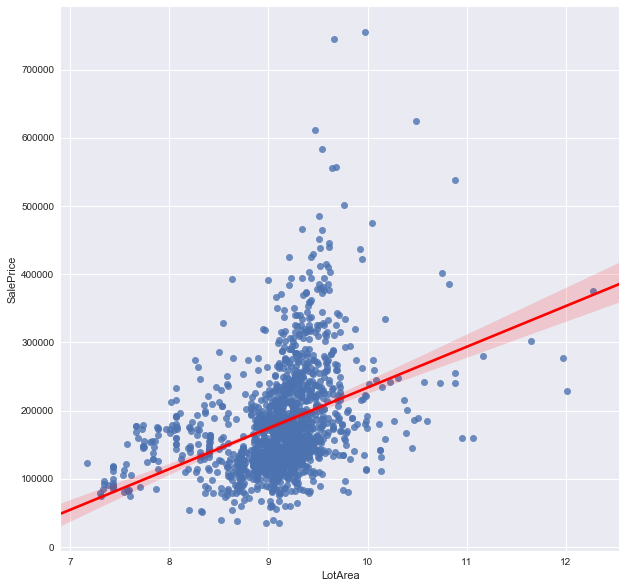

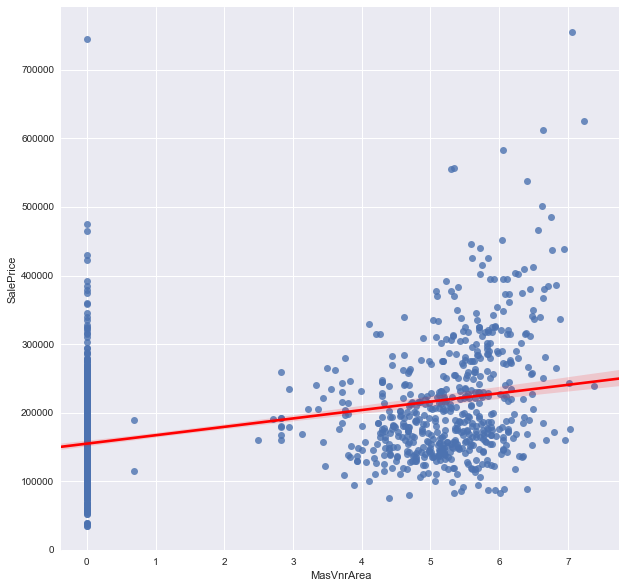

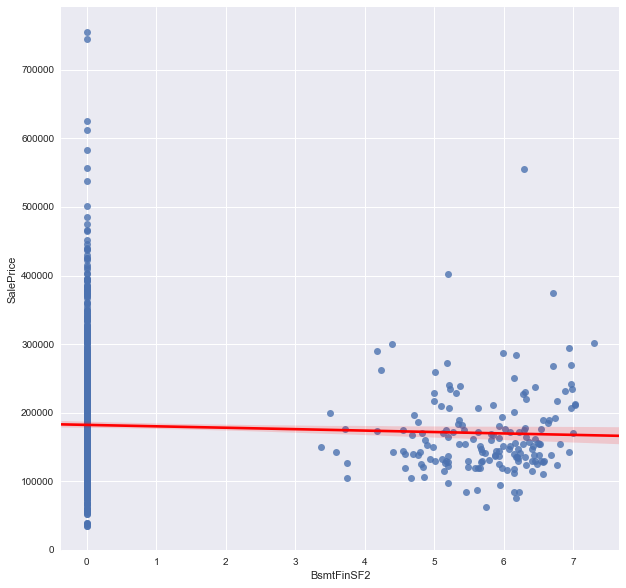

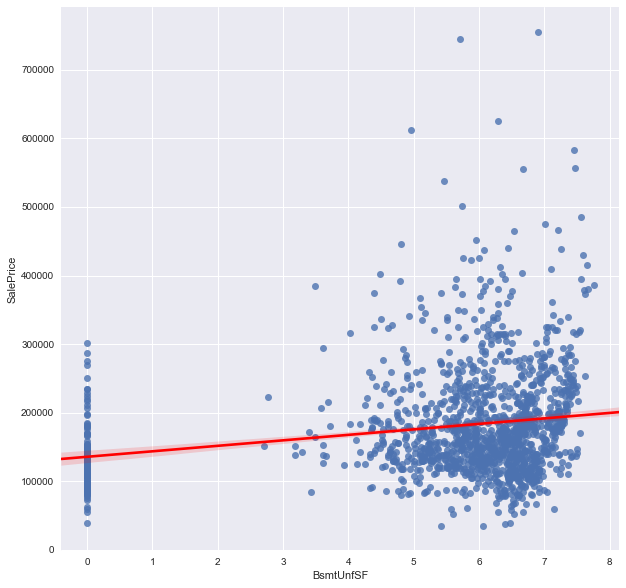

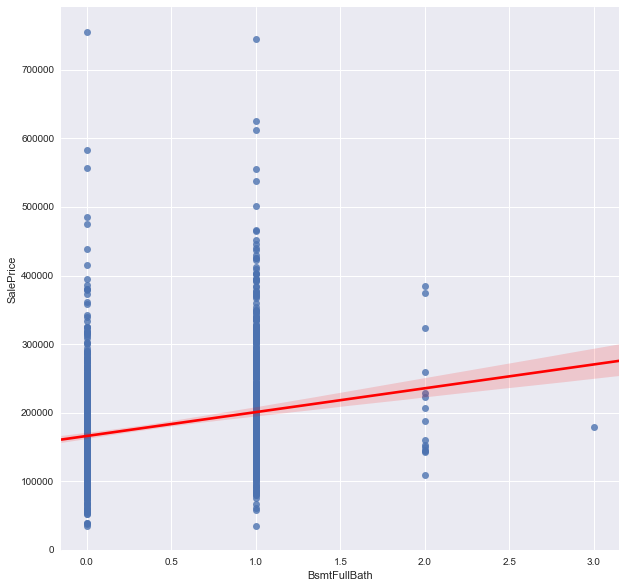

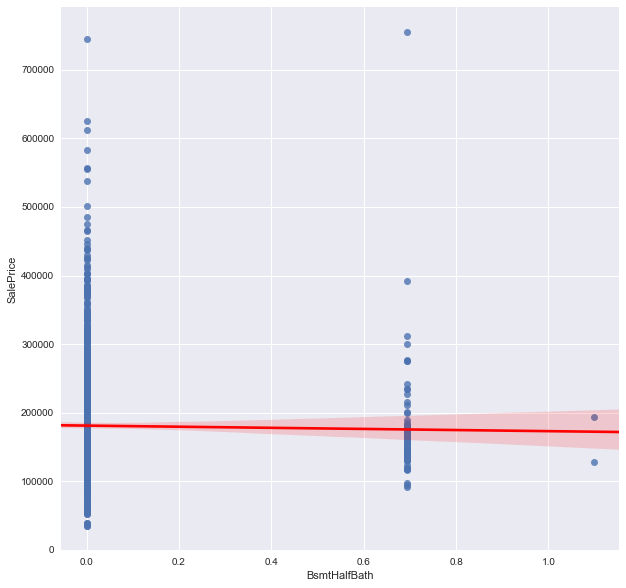

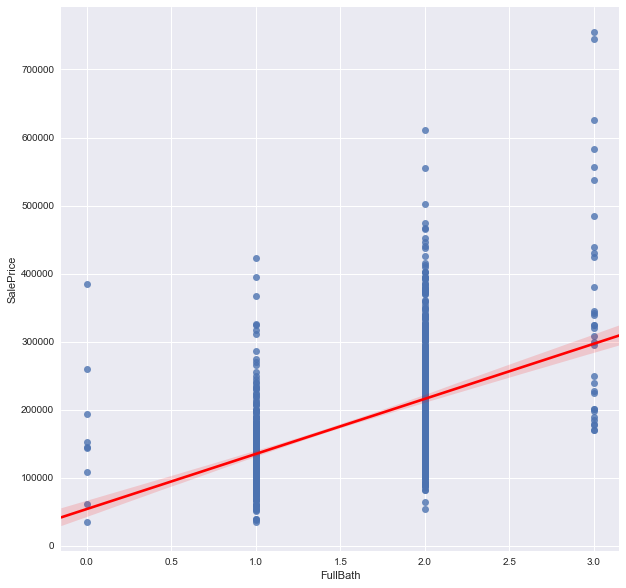

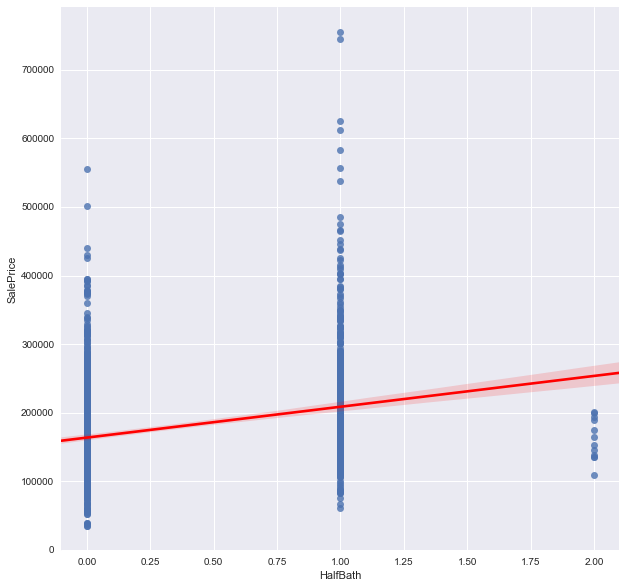

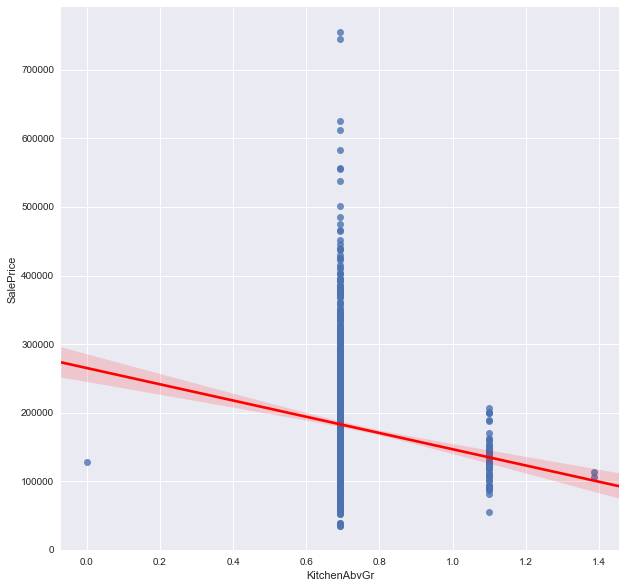

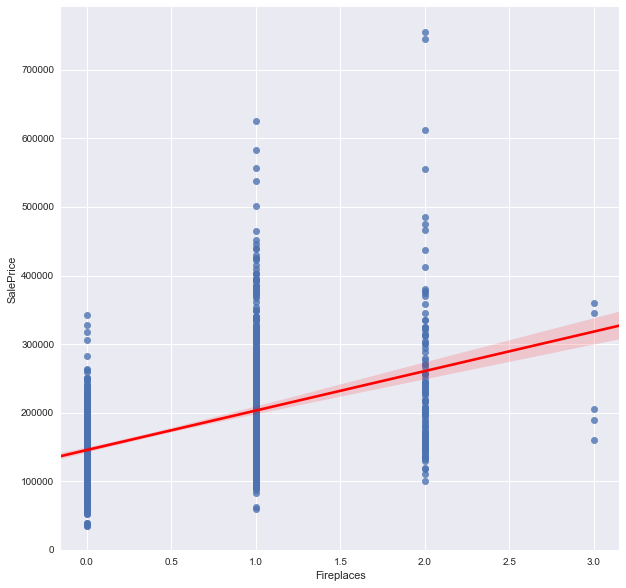

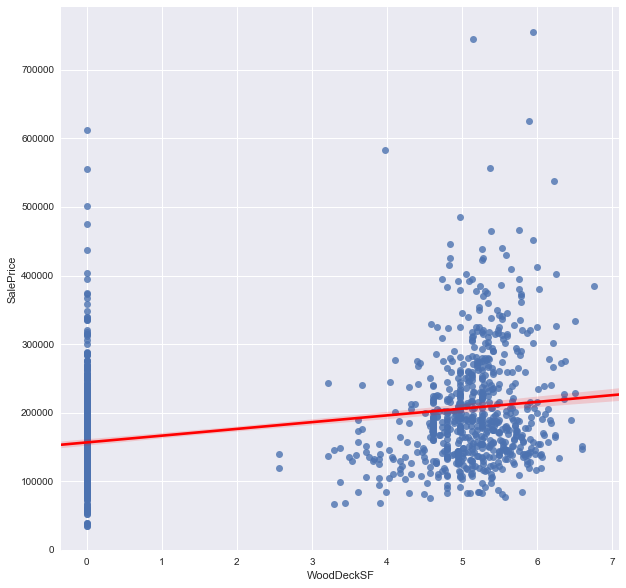

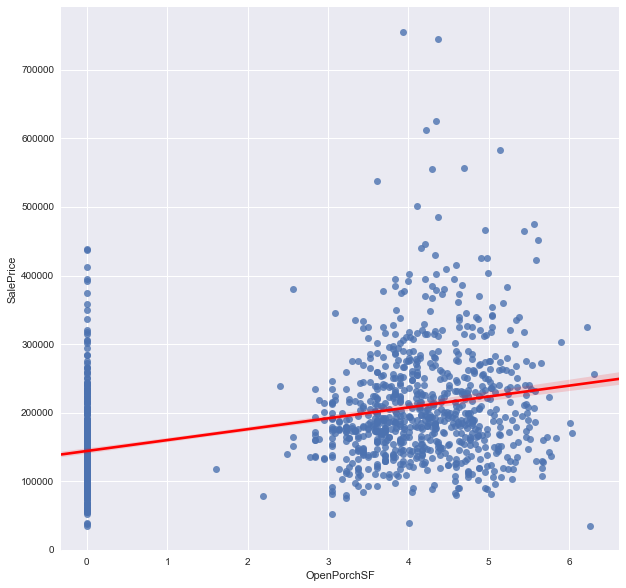

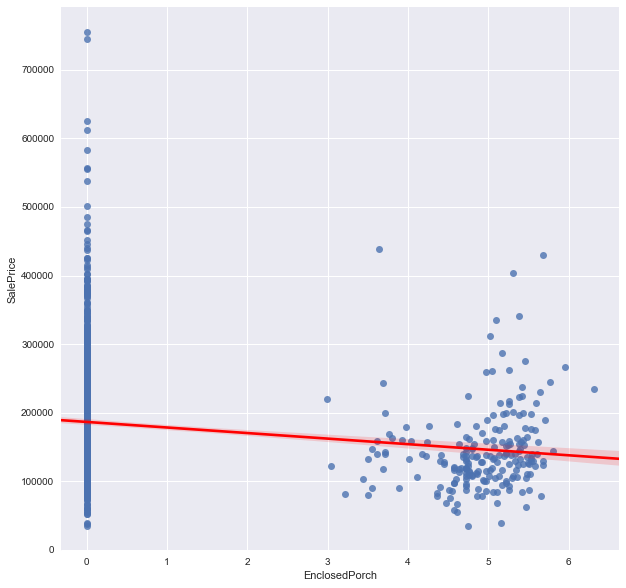

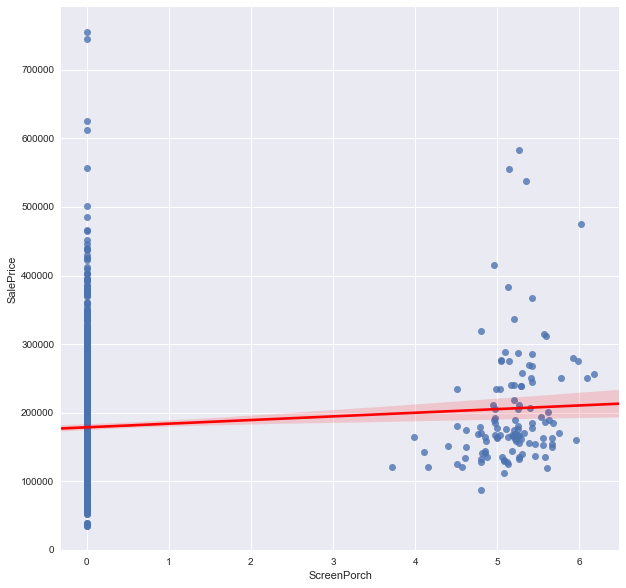

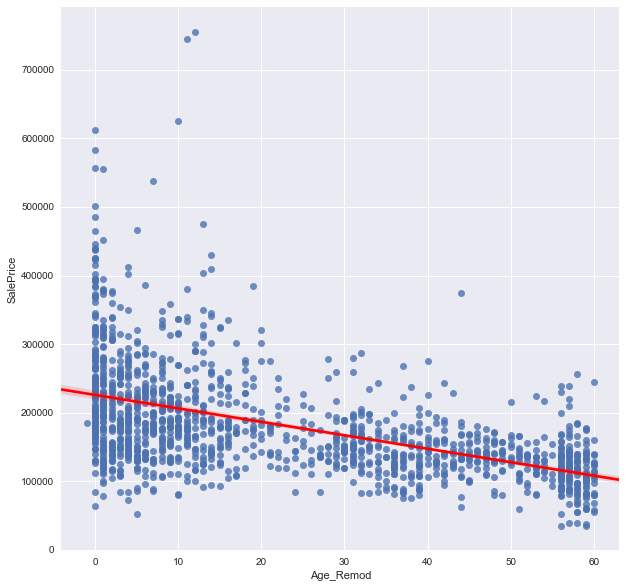

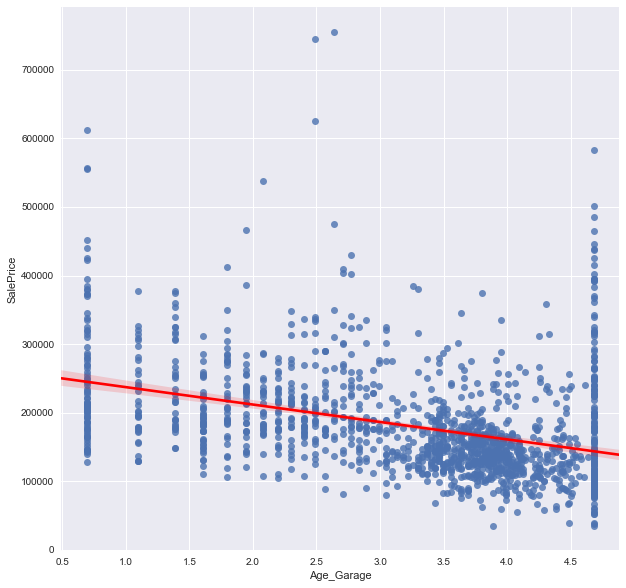

In [1203]:
plt.rcParams['figure.figsize'] = [10, 10]
for e in cols_num:
    sns.regplot(x = df_x[e], y = df_y, line_kws = {'color':'red'});
    plt.show()

All the graphs above are pretty self-explanatory and the trend seems to be inline with what the popular market beliefs are (older the house, lower the cost and so on). We will now move on to build our base model.

### 4. Model Building

We will be using Linear Regression for this particular problem. Before building our model though, we will need to prep our data set a bit more so as to pass it on to our models.

#### 4.1 Data Prep for Model
#### 4.1.1 Dummy Variables
The linear regression model in the scipy library needs all data in numeric form. So, we will have to convert our categorical variables into dummy variables. Let's go ahead and do that.

In [1205]:
test.shape

(1446, 56)

In [1206]:
df = pd.get_dummies(df, columns = cols_cat, drop_first = True)
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,Age_Remod,Age_Garage,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_R,Street_Pave,LotShape_Reg,LandContour_N Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,LandSlope_Low,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5,HouseStyle_2+,HouseStyle_Split,OverallQual_Low,OverallQual_Med,OverallCond_Bad,OverallCond_Good,RoofStyle_Hip,RoofStyle_Others,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone,ExterQual_Low,ExterCond_Low,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Low,BsmtQual_None,BsmtCond_Low,BsmtCond_None,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Low,HeatingQC_Med,CentralAir_Y,Electrical_SBrkr,KitchenQual_Low,KitchenQual_Med,FireplaceQu_Low,FireplaceQu_None,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Low,GarageQual_None,GarageCond_Low,GarageCond_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,SznSold_Spring,SznSold_Summer,SznSold_Winter
0,65.0,9.042040,5.283204,0.0,5.017280,1,0.000000,2,1,0.693147,0,0.000000,4.127134,0.000000,0.0,208500,5,1.791759,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1
1,80.0,9.169623,0.000000,0.0,5.652489,0,0.693147,2,0,0.693147,1,5.700444,0.000000,0.000000,0.0,181500,31,3.465736,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0
2,68.0,9.328212,5.093750,0.0,6.075346,1,0.000000,2,1,0.693147,1,0.000000,3.761200,0.000000,0.0,223500,6,2.079442,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0
3,60.0,9.164401,0.000000,0.0,6.293419,1,0.000000,1,0,0.693147,1,0.000000,3.583519,5.609472,0.0,140000,36,2.197225,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
4,84.0,9.565284,5.860786,0.0,6.196444,1,0.000000,2,1,0.693147,1,5.262690

In [1207]:
df.shape

(1459, 150)

In [1221]:
test = pd.get_dummies(test, columns = cols_cat, drop_first = True)

KeyError: "['MSSubClass' 'MSZoning' 'Street' 'LotShape' 'LandContour' 'LotConfig'\n 'LandSlope' 'Neighborhood' 'Condition1' 'BldgType' 'HouseStyle'\n 'OverallQual' 'OverallCond' 'RoofStyle' 'Exterior1st' 'Exterior2nd'\n 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'\n 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'HeatingQC' 'CentralAir'\n 'Electrical' 'KitchenQual' 'FireplaceQu' 'GarageType' 'GarageFinish'\n 'GarageQual' 'GarageCond' 'Fence' 'SaleType' 'SaleCondition' 'SznSold'] not in index"

#### 4.1.2 Splitting the Data
We will now split our dataset into train and test tests.

In [1222]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)
print(df_train.shape, df_test.shape, sep = '\n')

(1021, 150)
(438, 150)


We will now split our train and test sets into x and y sets as well.

In [1223]:
df_train_y = df_train['SalePrice']
df_train_x = df_train.drop(['SalePrice'], axis = 1)
df_test_y = df_test['SalePrice']
df_test_x = df_test.drop(['SalePrice'], axis = 1)
print(df_train_x.shape, df_train_y.shape, df_test_x.shape, df_test_y.shape, sep = '\n')

(1021, 149)
(1021,)
(438, 149)
(438,)


#### 4.1.3 Adding the Constant term
We will also need to add the constant (intercept) term to each of the \_x datasets

In [1224]:
import statsmodels.api as sm
df_train_x = sm.add_constant(df_train_x)
df_train_x.head()

,const,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Age_Remod,Age_Garage,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_R,Street_Pave,LotShape_Reg,LandContour_N Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,LandSlope_Low,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5,HouseStyle_2+,HouseStyle_Split,OverallQual_Low,OverallQual_Med,OverallCond_Bad,OverallCond_Good,RoofStyle_Hip,RoofStyle_Others,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone,ExterQual_Low,ExterCond_Low,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Low,BsmtQual_None,BsmtCond_Low,BsmtCond_None,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Low,HeatingQC_Med,CentralAir_Y,Electrical_SBrkr,KitchenQual_Low,KitchenQual_Med,FireplaceQu_Low,FireplaceQu_None,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Low,GarageQual_None,GarageCond_Low,GarageCond_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,SznSold_Spring,SznSold_Summer,SznSold_Winter
757,1.0,0.0,9.360225,5.796058,0.0,5.459586,0,0.0,2,1,0.693147,1,5.817111,0.000000,0.0,0.0,32,3.496508,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
883,1.0,60.0,8.733111,0.000000,0.0,6.679599,1,0.0,1,0,0.693147,0,0.000000,5.241747,0.0,0.0,56,2.302585,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
353,1.0,60.0,9.050289,0.000000,0.0,6.437752,0,0.0,1,0,0.693147,0,4.672829,0.000000,0.0,0.0,7,1.791759,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0
420,1.0,78.0,8.862342,5.303305,0.0,3.583519,2,0.0,2,0,1.098612,0,0.000000,0.000000,0.0,0.0,10,2.484907,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
1430,1.0,60.0,9.995656,0.000000,0.0,6.597146,0,0.0,2,1,0.693147,1,4.615121,3.713572,0.0,0.0,1,0.693147,0,0,0,0,0,0,0,0,1

In [1225]:
df_test_x['const'] = 1
df_test_x = pd.concat([df_test_x['const'], df_test_x.drop('const', axis = 1)], axis = 1)
df_test_x.head()

,const,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Age_Remod,Age_Garage,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_R,Street_Pave,LotShape_Reg,LandContour_N Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,LandSlope_Low,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5,HouseStyle_2+,HouseStyle_Split,OverallQual_Low,OverallQual_Med,OverallCond_Bad,OverallCond_Good,RoofStyle_Hip,RoofStyle_Others,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Stone,ExterQual_Low,ExterCond_Low,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Low,BsmtQual_None,BsmtCond_Low,BsmtCond_None,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Low,HeatingQC_Med,CentralAir_Y,Electrical_SBrkr,KitchenQual_Low,KitchenQual_Med,FireplaceQu_Low,FireplaceQu_None,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Low,GarageQual_None,GarageCond_Low,GarageCond_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,SznSold_Spring,SznSold_Summer,SznSold_Winter
477,1,105.0,9.524713,6.650279,0.0,7.675082,0,0.0,2,1,0.693147,1,6.028279,4.442651,0.000000,0.0,1,0.693147,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0
310,1,0.0,8.947156,4.727388,0.0,5.192957,0,0.0,2,1,0.693147,1,5.252273,4.158883,0.000000,0.0,12,2.639057,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0
797,1,57.0,8.946114,0.000000,0.0,5.318120,0,0.0,1,0,0.693147,0,0.000000,0.000000,0.000000,0.0,55,4.025352,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
794,1,0.0,9.290352,0.000000,0.0,6.569481,0,0.0,2,1,0.693147,1,4.969813,3.850148,0.000000,0.0,12,2.708050,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0
246,1,69.0,9.120744,0.000000,0.0,6.928538,0,0.0,2,0,1.098612,0,0.000000,4.110874,4.727388,0.0,56,4.574711,0,

#### 4.2 Base Model
We will now build our base model. It will be a Linear Regression model built using the OLS method in statsmodel.api library.

In [1226]:
lm_base = sm.OLS(df_train_y, df_train_x).fit()
lm_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     43.38
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          2.22e-314
Time:                        23:23:05   Log-Likelihood:                -11906.
No. Observations:                1021   AIC:                         2.410e+04
Df Residuals:                     878   BIC:                         2.480e+04
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.046e+04   6.22e+04     -0.490      0.624   -1.52e+05    9.15e+04
LotFrontage             109.6984     34.535      3.176      0.002      41.918     177.478
LotArea                2.016e+04   3585.483      5.622      0.000    1.31e+04    2.72e+04
MasVnrArea             1419.1178   1760.097      0.806      0.420   -2035.370    4873.606
BsmtFinSF2             3737.6124   4021.644      0.929      0.353   -4155.547    1.16e+04
BsmtUnfSF               144.7045    885.135      0.163      0.870   -1592.522    1881.931
BsmtFullBath           9263.4818   2838.292      3.264      0.001    3692.852    1.48e+04
BsmtHalfBath            915.9854   6816.208      0.134      0.893   -1.25e+04    1.43e+04
FullBath               2.502e+04   3085.132      8.109      0.000     1.9e+04    3.11e+04
HalfBath               1.276e+04   3003.678      4.249      0.000    6866.531    1.87e+04
KitchenAbvGr          -1.328e+04   1.99e+04     -0.666      0.505   -5.24e+04    2.58e+04
Fireplaces             2.009e+04   4010.338      5.009      0.000    1.22e+04     2.8e+04
WoodDeckSF              701.2025    453.133      1.547      0.122    -188.147    1590.552
OpenPorchSF            1500.3706    597.598      2.511      0.012     327.483    2673.258
EnclosedPorch          -497.2964    695.185     -0.715      0.475   -1861.714     867.121
ScreenPorch            1534.7793    765.186      2.006      0.045      32.972    3036.586
Age_Remod              -121.6045     80.709     -1.507      0.132    -280.011      36.801
Age_Garage            -2787.9947   1355.902     -2.056      0.040   -5449.183    -126.807
MSSubClass_160         1554.4236   1.36e+04      0.114      0.909   -2.52e+04    2.83e+04
MSSubClass_180        -2509.6222   1.91e+04     -0.132      0.895   -3.99e+04    3.49e+04
MSSubClass_190        -7897.3071   1.16e+04     -0.678      0.498   -3.07e+04     1.5e+04
MSSubClass_20          1544.2473   2.01e+04      0.077      0.939   -3.79e+04     4.1e+04
MSSubClass_30         -1.642e+04   2.09e+04     -0.787      0.432   -5.74e+04    2.46e+04
MSSubClass_40           3.49e+04   2.97e+04      1.174      0.241   -2.34e+04    9.32e+04
MSSubClass_45         -3640.7601   2.61e+04     -0.139      0.889   -5.49e+04    4.76e+04
MSSubClass_50          5529.2156   2.34e+04      0.237      0.813   -4.03e+04    5.14e+04
MSSubClass_60          1725.3454   2.29e+04      0.075      0.940   -4.32e+04    4.67e+04
MSSubClass_70          7602.6677   2.34e+04      0.324      0.746   -3.84e+04    5.36e+04
MSSubClass_75          2.187e+04   2.56e+04      0.853      0.394   -2.84e+04    7.22e+04
MSSubClass_80          1753.3205   2.48e+04      0.071      0.944   -4.69e+04    5.04e+04
MSSubClass_85           103.2180   2.59e+04      0.004      0.997   -5.08e+04     5.1e+04
MSSubClass_90          

Let's now calculate the RMSE for this model.

In [1227]:
# Function to calculate RMSE 
import math
def rmse(lm, X, y):
    predicted = lm.predict(X)
    actual = y
    mse = ((predicted - actual)**2).sum() / len(X)
    rmse = math.sqrt(mse)
    return round(rmse, 4)

# Function to calculate RMSE when predicted and actual values are taken on a logarithmic scale
def rmse_log_scale(lm, X, y):
    predicted = lm.predict(X)
    actual = y
    mse = ((predicted.apply(math.log) - actual.apply(math.log))**2).sum() / len(X)
    rmse = math.sqrt(mse)
    return round(rmse, 4)

rmse_base = rmse(lm_base, df_test_x, df_test_y)
rmse_base_log_scale = rmse_log_scale(lm_base, df_test_x, df_test_y)
print(rmse_base, rmse_base_log_scale, sep = '\n')

38323.7447
0.1744


That's a decent base model all things considered. 
>* A good R-squared value at .87 and an Adjusted R-squared (.85) that isn't too low.
>* The F-statistic which is hovering a little over 40 could be better though.
>* A decent RMSE (Yes, it is 38000+ which looks high but that's on a scale of house sale prices which is in the order of 10^5. Taking the sale price on a logarithmic scale gives us an RMSE of 0.1744 which is good for the base model.

But there's also warning - 
>The smallest eigenvalue is 4.17e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.  

This is an indication that multicollinearity still persists. We will deal with it later, if needed. Because for our second iteration of the model we will get rid of all the insignificant variables.

#### 4.3 Model No. 2
#### 4.3.1 Removing Insignificant Variables
We will first get a list of all variables with their p-values.

In [1228]:
results_as_html = lm_base.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_df = results_df.reset_index()

def p_sig(val):
    if val >= 0.05:
        color = "red"
    else:
        color = "black"
    return 'color: %s' % color

results_df.sort_values(['index', 'P>|t|'], ascending = False).style.applymap(p_sig, subset = ['P>|t|'])

,index,coef,std err,t,P>|t|,[0.025,0.975]
0,const,-30460,62200,-0.49,0.624,-152000,91500
12,WoodDeckSF,701.202,453.133,1.547,0.122,-188.147,1590.55
149,SznSold_Winter,1315.36,3913.65,0.336,0.737,-6365.85,8996.57
148,SznSold_Summer,4882.67,3041.7,1.605,0.109,-1087.17,10900
147,SznSold_Spring,5431.03,3180.38,1.708,0.088,-811.001,11700
34,Street_Pave,24400,14800,1.645,0.1,-4709.92,53500
15,ScreenPorch,1534.78,765.186,2.006,0.045,32.972,3036.59
143,SaleType_WD,-9732.74,32600,-0.298,0.766,-73800,54300
142,SaleType_Other,869.201,33100,0.026,0.979,-64000,65800
146,SaleCondition_Partial,19260,32600,0.592,0.554,-44600,83200


Extracting the insignificant column names into  a variable.

In [1229]:
cols_to_drop = 'SznSold_Winter	SznSold_Summer	SznSold_Spring	Street_Pave	MSZoning_R	MSZoning_FV	LotShape_Reg	LotFrontage	LandSlope_Low	LandContour_N Lvl	KitchenAbvGr	HouseStyle_Split	HouseStyle_2+	HouseStyle_1.5	HeatingQC_Med	HeatingQC_Low	GarageType_None	GarageType_Detchd	GarageQual_None	GarageQual_Low	GarageFinish_Unf	GarageFinish_RFn	GarageFinish_None	GarageCond_None	GarageCond_Low	Foundation_PConc	Foundation_Other	Foundation_CBlock	FireplaceQu_None	FireplaceQu_Low	Fence_None	Fence_MnWw	Fence_MnPrv	Fence_GdWo	Exterior2nd_Wd Sdng	Exterior2nd_VinylSd	Exterior2nd_Plywood	Exterior2nd_Others	Exterior2nd_MetalSd	Exterior2nd_HdBoard	Exterior1st_Wd Sdng	Exterior1st_VinylSd	Exterior1st_Plywood	Exterior1st_Others	Exterior1st_MetalSd	Exterior1st_HdBoard	ExterQual_Low	ExterCond_Low	EnclosedPorch	Electrical_SBrkr	Condition1_RR	Condition1_Pos	Condition1_Norm	Condition1_Feedr	CentralAir_Y	BsmtUnfSF	BsmtQual_None	BsmtQual_Low	BsmtFinType2_None	BsmtFinType2_LwQ	BsmtFinType2_GLQ	BsmtFinType2_BLQ	BsmtFinType1_Unf	BsmtFinType1_Rec	BsmtFinType1_None	BsmtFinType1_LwQ	BsmtFinType1_GLQ	BsmtFinType1_BLQ	BsmtFinSF2	BsmtCond_None	BsmtCond_Low	Age_Remod	Age_Garage'
cols_to_drop = cols_to_drop.split('\t')
print(cols_to_drop)

['SznSold_Winter', 'SznSold_Summer', 'SznSold_Spring', 'Street_Pave', 'MSZoning_R', 'MSZoning_FV', 'LotShape_Reg', 'LotFrontage', 'LandSlope_Low', 'LandContour_N Lvl', 'KitchenAbvGr', 'HouseStyle_Split', 'HouseStyle_2+', 'HouseStyle_1.5', 'HeatingQC_Med', 'HeatingQC_Low', 'GarageType_None', 'GarageType_Detchd', 'GarageQual_None', 'GarageQual_Low', 'GarageFinish_Unf', 'GarageFinish_RFn', 'GarageFinish_None', 'GarageCond_None', 'GarageCond_Low', 'Foundation_PConc', 'Foundation_Other', 'Foundation_CBlock', 'FireplaceQu_None', 'FireplaceQu_Low', 'Fence_None', 'Fence_MnWw', 'Fence_MnPrv', 'Fence_GdWo', 'Exterior2nd_Wd Sdng', 'Exterior2nd_VinylSd', 'Exterior2nd_Plywood', 'Exterior2nd_Others', 'Exterior2nd_MetalSd', 'Exterior2nd_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior1st_VinylSd', 'Exterior1st_Plywood', 'Exterior1st_Others', 'Exterior1st_MetalSd', 'Exterior1st_HdBoard', 'ExterQual_Low', 'ExterCond_Low', 'EnclosedPorch', 'Electrical_SBrkr', 'Condition1_RR', 'Condition1_Pos', 'Condition1_Nor

In [1230]:
print(df_train_x.shape, df_test_x.shape)
df_train_x = df_train_x.drop(cols_to_drop, axis = 1)
df_test_x  = df_test_x.drop(cols_to_drop, axis = 1)
print(df_train_x.shape, df_test_x.shape)

(1021, 150) (438, 150)
(1021, 77) (438, 77)


#### 4.3.2 Building Model No. 2

In [1231]:
lm_2 = sm.OLS(df_train_y, df_train_x).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     76.41
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:23:14   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.410e+04
Df Residuals:                     946   BIC:                         2.447e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.592e+04   4.68e+04      0.554      0.580   -6.59e+04    1.18e+05
LotArea                1.789e+04   3307.328      5.409      0.000    1.14e+04    2.44e+04
MasVnrArea             1271.8234   1767.567      0.720      0.472   -2196.983    4740.630
BsmtFullBath           1.568e+04   2321.703      6.753      0.000    1.11e+04    2.02e+04
BsmtHalfBath           6068.3030   6598.450      0.920      0.358   -6880.989     1.9e+04
FullBath               2.863e+04   2810.661     10.187      0.000    2.31e+04    3.41e+04
HalfBath               1.345e+04   2901.020      4.635      0.000    7752.086    1.91e+04
Fireplaces             1.139e+04   1941.559      5.867      0.000    7580.290    1.52e+04
WoodDeckSF              540.3630    441.405      1.224      0.221    -325.882    1406.608
OpenPorchSF            1834.9505    583.308      3.146      0.002     690.223    2979.678
ScreenPorch            1679.6558    755.392      2.224      0.026     197.218    3162.094
MSSubClass_160         7376.7661   8987.165      0.821      0.412   -1.03e+04     2.5e+04
MSSubClass_180         -320.6811   1.47e+04     -0.022      0.983   -2.92e+04    2.86e+04
MSSubClass_190        -2932.7589   1.07e+04     -0.273      0.785    -2.4e+04    1.81e+04
MSSubClass_20          1.744e+04   1.99e+04      0.876      0.381   -2.16e+04    5.65e+04
MSSubClass_30           -78.5385   2.06e+04     -0.004      0.997   -4.06e+04    4.04e+04
MSSubClass_40          3.992e+04   2.96e+04      1.347      0.178   -1.82e+04    9.81e+04
MSSubClass_45          1.111e+04   2.34e+04      0.475      0.635   -3.48e+04     5.7e+04
MSSubClass_50          2.042e+04   2.03e+04      1.008      0.314   -1.93e+04    6.02e+04
MSSubClass_60          1.774e+04   2.01e+04      0.884      0.377   -2.17e+04    5.72e+04
MSSubClass_70          2.151e+04   2.09e+04      1.030      0.303   -1.95e+04    6.25e+04
MSSubClass_75          4.071e+04   2.29e+04      1.776      0.076   -4277.342    8.57e+04
MSSubClass_80           1.08e+04   2.05e+04      0.527      0.598   -2.94e+04     5.1e+04
MSSubClass_85          8295.3294    2.2e+04      0.377      0.706   -3.49e+04    5.15e+04
MSSubClass_90          2720.4022   1.04e+04      0.261      0.794   -1.77e+04    2.32e+04
LotConfig_CulDSac      9711.6164   4631.465      2.097      0.036     622.483    1.88e+04
LotConfig_FR          -1.202e+04   5444.333     -2.207      0.028   -2.27e+04   -1333.608
LotConfig_Inside      -1010.3348   2656.498     -0.380      0.704   -6223.645    4202.975
Neighborhood_Blueste  -1.535e+04    2.6e+04     -0.591      0.555   -6.63e+04    3.57e+04
Neighborhood_BrDale   -2.149e+04   1.57e+04     -1.367      0.172   -5.23e+04    9356.864
Neighborhood_BrkSide  -2.997e+04   1.29e+04     -2.333      0.020   -5.52e+04   -4755.800
Neighborhood_ClearCr  -

In [1232]:
rmse_2 = rmse(lm_2, df_test_x, df_test_y)
rmse_2_log_scale = rmse_log_scale(lm_2, df_test_x, df_test_y)
print(rmse_2, rmse_2_log_scale, sep = '\n')

37868.6155
0.1798


With just a bit of a decline in R-squared value (0.87 -> 0.85) and RMSE, which is quite understandable considering we have eliminated a lot of insignificant variables, we have actually made quite an improvement in our model.
>* The much better characteristic i.e. the Adjusted R-squared hasn't decreased by much (barely by 0.05)
>* Enormous gains on our F-statistic which has almost doubled from being in 40s to now in 70s.

But, there are still a few things left to fix.
>* The warning of multicollinearity still persists.
>* There are new insignificant variables now which need to be eliminated.

We will reiterate some of the previous steps and quickly get rid of the insignificant variables.

#### 4.4 Model No. 3
#### 4.4.1 Removing Insignificant Variables

In [1233]:
results_as_html = lm_2.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_df = results_df.reset_index()
results_df.sort_values(['index', 'P>|t|']).style.applymap(p_sig, subset = ['P>|t|'])

,index,coef,std err,t,P>|t|,[0.025,0.975]
52,BldgType_2fmCon,-2932.76,10700,-0.273,0.785,-24000,18100
53,BldgType_Duplex,2720.4,10400,0.261,0.794,-17700,23200
54,BldgType_Twnhs,-6287.44,21200,-0.296,0.767,-48000,35400
55,BldgType_TwnhsE,-4794.88,19900,-0.241,0.809,-43800,34200
64,BsmtExposure_Gd,27230,4522.97,6.021,0,18400,36100
65,BsmtExposure_Mn,2889.91,4689.2,0.616,0.538,-6312.53,12100
66,BsmtExposure_No,-3138.02,3411.63,-0.92,0.358,-9833.27,3557.23
67,BsmtExposure_None,-13390,8294.48,-1.615,0.107,-29700,2882.88
68,BsmtFinType2_Rec,-485.829,6319.42,-0.077,0.939,-12900,11900
69,BsmtFinType2_Unf,3385.33,3964.07,0.854,0.393,-4394.06,11200


In [1234]:
cols_to_drop = 'BldgType_2fmCon	BldgType_Duplex	BldgType_Twnhs	BldgType_TwnhsE	BsmtFinType2_Rec	BsmtFinType2_Unf	MSSubClass_160	MSSubClass_180	MSSubClass_190	MSSubClass_20	MSSubClass_30	MSSubClass_40	MSSubClass_45	MSSubClass_50	MSSubClass_60	MSSubClass_70	MSSubClass_75	MSSubClass_80	MSSubClass_85	MSSubClass_90	MasVnrArea	MasVnrType_None	MasVnrType_Stone'
cols_to_drop = cols_to_drop.split('\t')
len(cols_to_drop)

23

In [1235]:
print(df_train_x.shape, df_test_x.shape)
df_train_x = df_train_x.drop(cols_to_drop, axis = 1)
df_test_x  = df_test_x.drop(cols_to_drop, axis = 1)
print(df_train_x.shape, df_test_x.shape)

(1021, 77) (438, 77)
(1021, 54) (438, 54)


#### 4.4.2 Building Model No. 3 

In [1236]:
lm_3 = sm.OLS(df_train_y, df_train_x).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:23:19   Log-Likelihood:                -12004.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     967   BIC:                         2.438e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.633e+04    4.1e+04     -0.398      0.691   -9.68e+04    6.42e+04
LotArea                2.389e+04   2743.511      8.710      0.000    1.85e+04    2.93e+04
BsmtFullBath           1.364e+04   2240.361      6.087      0.000    9240.548     1.8e+04
BsmtHalfBath           4838.6767   6564.538      0.737      0.461   -8043.706    1.77e+04
FullBath                2.85e+04   2575.411     11.066      0.000    2.34e+04    3.36e+04
HalfBath               1.563e+04   2268.849      6.891      0.000    1.12e+04    2.01e+04
Fireplaces             1.187e+04   1927.184      6.161      0.000    8090.992    1.57e+04
WoodDeckSF              540.9543    439.018      1.232      0.218    -320.583    1402.491
OpenPorchSF            2094.9431    563.562      3.717      0.000     988.997    3200.889
ScreenPorch            1613.6453    756.652      2.133      0.033     128.776    3098.515
LotConfig_CulDSac      8192.4584   4656.162      1.759      0.079    -944.888    1.73e+04
LotConfig_FR          -1.272e+04   5490.556     -2.317      0.021   -2.35e+04   -1947.419
LotConfig_Inside      -1544.0457   2671.858     -0.578      0.563   -6787.353    3699.262
Neighborhood_Blueste  -7954.8090    2.5e+04     -0.318      0.750    -5.7e+04    4.11e+04
Neighborhood_BrDale   -1.065e+04   1.31e+04     -0.814      0.416   -3.63e+04     1.5e+04
Neighborhood_BrkSide  -1.659e+04   1.14e+04     -1.454      0.146    -3.9e+04    5807.733
Neighborhood_ClearCr  -1549.9608   1.29e+04     -0.120      0.905   -2.69e+04    2.38e+04
Neighborhood_CollgCr  -4348.4163   1.05e+04     -0.416      0.678   -2.49e+04    1.62e+04
Neighborhood_Crawfor   5154.6595   1.16e+04      0.442      0.658   -1.77e+04     2.8e+04
Neighborhood_Edwards  -3.506e+04   1.09e+04     -3.203      0.001   -5.65e+04   -1.36e+04
Neighborhood_Gilbert  -1.944e+04    1.1e+04     -1.762      0.078   -4.11e+04    2212.514
Neighborhood_IDOTRR   -3.579e+04    1.2e+04     -2.983      0.003   -5.93e+04   -1.22e+04
Neighborhood_MeadowV  -2.477e+04   1.34e+04     -1.846      0.065   -5.11e+04    1563.950
Neighborhood_Mitchel  -1.961e+04   1.14e+04     -1.713      0.087   -4.21e+04    2853.400
Neighborhood_NAmes    -2.292e+04   1.06e+04     -2.153      0.032   -4.38e+04   -2025.499
Neighborhood_NPkVill  -1.612e+04   1.63e+04     -0.986      0.324   -4.82e+04     1.6e+04
Neighborhood_NWAmes   -1.165e+04   1.13e+04     -1.028      0.304   -3.39e+04    1.06e+04
Neighborhood_NoRidge   4.922e+04   1.21e+04      4.082      0.000    2.56e+04    7.29e+04
Neighborhood_NridgHt    3.33e+04   1.09e+04      3.046      0.002    1.18e+04    5.48e+04
Neighborhood_OldTown  -2.861e+04   1.09e+04     -2.616      0.009   -5.01e+04   -7151.222
Neighborhood_SWISU    -2.577e+04   1.26e+04     -2.046      0.041   -5.05e+04   -1047.272
Neighborhood_Sawyer   -

In [1237]:
rmse_3 = rmse(lm_3, df_test_x, df_test_y)
rmse_3_log_scale = rmse_log_scale(lm_3, df_test_x, df_test_y)
print(rmse_3, rmse_3_log_scale, sep = '\n')

38344.116
0.1793


Now this is looking like a good model.
>* We have no insignificant variables
>* Our Adjusted R-squared value is a little over 0.83
>* Our F-statistic is 100
>* Our RMSE has barely shifted and still stands at a healthy 0.16
>* And as a bonus, no warning about multi-collinearity

All these points are indications of a good, well-built model. But, let's see if we can imporve upon this.

#### 4.5 Model No. 4
Let's take a look at the distribution of the target variable.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


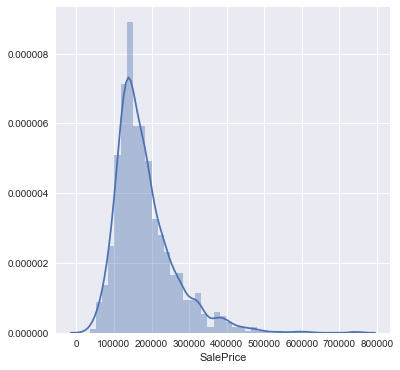

In [1238]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.distplot(df_train_y);

As can be seen, the distribution is a bit skewed. Let's try taking log of the target variable and then plotting the distribution.

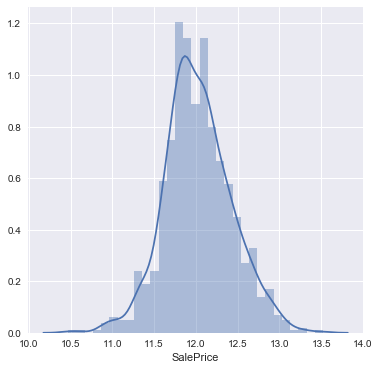

In [1239]:
sns.distplot(df_train_y.apply(math.log));

And as can be seen, this is very close to a normal distribution now. Let's build the next model by taking log transformation of the target variable.

In [1240]:
X = df_train_x.copy()
y = df_train_y.apply(math.log)
lm_log_1 = sm.OLS(y, X).fit()
lm_log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:23:23   Log-Likelihood:                 499.10
No. Observations:                1021   AIC:                            -890.2
Df Residuals:                     967   BIC:                            -624.1
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.8800      0.197     55.219      0.000      10.493      11.267
LotArea                   0.1152      0.013      8.738      0.000       0.089       0.141
BsmtFullBath              0.0755      0.011      7.010      0.000       0.054       0.097
BsmtHalfBath              0.0473      0.032      1.500      0.134      -0.015       0.109
FullBath                  0.1559      0.012     12.599      0.000       0.132       0.180
HalfBath                  0.0852      0.011      7.814      0.000       0.064       0.107
Fireplaces                0.0643      0.009      6.941      0.000       0.046       0.082
WoodDeckSF                0.0057      0.002      2.724      0.007       0.002       0.010
OpenPorchSF               0.0133      0.003      4.909      0.000       0.008       0.019
ScreenPorch               0.0116      0.004      3.184      0.002       0.004       0.019
LotConfig_CulDSac         0.0369      0.022      1.649      0.099      -0.007       0.081
LotConfig_FR             -0.0477      0.026     -1.808      0.071      -0.099       0.004
LotConfig_Inside         -0.0066      0.013     -0.511      0.610      -0.032       0.019
Neighborhood_Blueste     -0.1270      0.120     -1.058      0.290      -0.363       0.109
Neighborhood_BrDale      -0.2233      0.063     -3.551      0.000      -0.347      -0.100
Neighborhood_BrkSide     -0.1811      0.055     -3.303      0.001      -0.289      -0.073
Neighborhood_ClearCr     -0.0037      0.062     -0.060      0.952      -0.126       0.118
Neighborhood_CollgCr     -0.0475      0.050     -0.945      0.345      -0.146       0.051
Neighborhood_Crawfor     -0.0062      0.056     -0.111      0.912      -0.116       0.104
Neighborhood_Edwards     -0.2503      0.053     -4.759      0.000      -0.353      -0.147
Neighborhood_Gilbert     -0.1145      0.053     -2.160      0.031      -0.219      -0.010
Neighborhood_IDOTRR      -0.3472      0.058     -6.022      0.000      -0.460      -0.234
Neighborhood_MeadowV     -0.2477      0.064     -3.842      0.000      -0.374      -0.121
Neighborhood_Mitchel     -0.1187      0.055     -2.159      0.031      -0.227      -0.011
Neighborhood_NAmes       -0.1471      0.051     -2.877      0.004      -0.247      -0.047
Neighborhood_NPkVill     -0.1554      0.079     -1.979      0.048      -0.310      -0.001
Neighborhood_NWAmes      -0.0834      0.054     -1.532      0.126      -0.190       0.023
Neighborhood_NoRidge      0.1044      0.058      1.802      0.072      -0.009       0.218
Neighborhood_NridgHt      0.0743      0.053      1.415      0.157      -0.029       0.177
Neighborhood_OldTown     -0.2502      0.053     -4.763      0.000      -0.353      -0.147
Neighborhood_SWISU       -0.1886      0.061     -3.115      0.002      -0.307      -0.070
Neighborhood_Sawyer    

In [1241]:
X = df_test_x.copy()
y = df_test_y.apply(math.log)
rmse_log_1 = rmse(lm_log_1, X, y)
print(rmse_log_1)

0.1761


Our model has improved substantially from the last iteration using a log transformation of the target variable.
>* F-statistic, R-squared and Adjusted R-squared values have increased while RMSE has gone down. 
>* We have found some new variables that are insignificant.

Let's go for one more iteration by eliminating the remaining insignificant variables.

#### 4.6 Model No. 5
#### 4.6.1 Removing Insignificant Variables

In [1242]:
results_as_html = lm_log.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_df = results_df.reset_index()
results_df.sort_values(['index', 'P>|t|']).style.applymap(p_sig, subset = ['P>|t|'])

,index,coef,std err,t,P>|t|,[0.025,0.975]
43,BsmtExposure_Gd,0.0858,0.021,4.02,0,0.044,0.128
44,BsmtExposure_Mn,0.0339,0.022,1.557,0.12,-0.009,0.077
45,BsmtExposure_No,0.0062,0.015,0.404,0.686,-0.024,0.036
46,BsmtExposure_None,-0.1171,0.035,-3.324,0.001,-0.186,-0.048
2,BsmtFullBath,0.0755,0.011,7.01,0,0.054,0.097
3,BsmtHalfBath,0.0473,0.032,1.5,0.134,-0.015,0.109
6,Fireplaces,0.0643,0.009,6.941,0,0.046,0.082
4,FullBath,0.1559,0.012,12.599,0,0.132,0.18
5,HalfBath,0.0852,0.011,7.814,0,0.064,0.107
47,KitchenQual_Low,-0.2316,0.025,-9.19,0,-0.281,-0.182


In [1243]:
cols_to_drop = ['LotConfig_CulDSac', 'LotConfig_FR', 'LotConfig_Inside', 'SaleType_Other', 'SaleType_WD']
print(df_train_x.shape, df_test_x.shape)
df_train_x = df_train_x.drop(cols_to_drop, axis = 1)
df_test_x  = df_test_x.drop(cols_to_drop, axis = 1)
print(df_train_x.shape, df_test_x.shape)

(1021, 54) (438, 54)
(1021, 49) (438, 49)


#### 4.6.2 Building the Model

In [1244]:
X = df_train_x.copy()
y = df_train_y.apply(math.log)
lm_log_2 = sm.OLS(y, X).fit()
lm_log_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:23:32   Log-Likelihood:                 494.09
No. Observations:                1021   AIC:                            -890.2
Df Residuals:                     972   BIC:                            -648.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.8961      0.117     93.029      0.000      10.666      11.126
LotArea                   0.1211      0.013      9.318      0.000       0.096       0.147
BsmtFullBath              0.0749      0.011      6.951      0.000       0.054       0.096
BsmtHalfBath              0.0451      0.032      1.431      0.153      -0.017       0.107
FullBath                  0.1531      0.012     12.390      0.000       0.129       0.177
HalfBath                  0.0843      0.011      7.720      0.000       0.063       0.106
Fireplaces                0.0658      0.009      7.102      0.000       0.048       0.084
WoodDeckSF                0.0056      0.002      2.669      0.008       0.001       0.010
OpenPorchSF               0.0131      0.003      4.860      0.000       0.008       0.018
ScreenPorch               0.0115      0.004      3.169      0.002       0.004       0.019
Neighborhood_Blueste     -0.1107      0.120     -0.927      0.354      -0.345       0.124
Neighborhood_BrDale      -0.2180      0.063     -3.464      0.001      -0.342      -0.094
Neighborhood_BrkSide     -0.1868      0.055     -3.406      0.001      -0.294      -0.079
Neighborhood_ClearCr     -0.0026      0.062     -0.042      0.966      -0.125       0.120
Neighborhood_CollgCr     -0.0511      0.050     -1.017      0.310      -0.150       0.048
Neighborhood_Crawfor     -0.0124      0.056     -0.221      0.825      -0.122       0.097
Neighborhood_Edwards     -0.2522      0.053     -4.795      0.000      -0.355      -0.149
Neighborhood_Gilbert     -0.1166      0.053     -2.196      0.028      -0.221      -0.012
Neighborhood_IDOTRR      -0.3489      0.058     -6.051      0.000      -0.462      -0.236
Neighborhood_MeadowV     -0.2451      0.065     -3.794      0.000      -0.372      -0.118
Neighborhood_Mitchel     -0.1203      0.055     -2.186      0.029      -0.228      -0.012
Neighborhood_NAmes       -0.1516      0.051     -2.964      0.003      -0.252      -0.051
Neighborhood_NPkVill     -0.1592      0.079     -2.027      0.043      -0.313      -0.005
Neighborhood_NWAmes      -0.0847      0.055     -1.553      0.121      -0.192       0.022
Neighborhood_NoRidge      0.1034      0.058      1.788      0.074      -0.010       0.217
Neighborhood_NridgHt      0.0662      0.053      1.262      0.207      -0.037       0.169
Neighborhood_OldTown     -0.2521      0.052     -4.807      0.000      -0.355      -0.149
Neighborhood_SWISU       -0.1930      0.061     -3.184      0.001      -0.312      -0.074
Neighborhood_Sawyer      -0.1876      0.054     -3.478      0.001      -0.293      -0.082
Neighborhood_SawyerW     -0.0999      0.054     -1.862      0.063      -0.205       0.005
Neighborhood_Somerst     -0.0123      0.051     -0.241      0.809      -0.113       0.088
Neighborhood_StoneBr   

In [1245]:
X = df_test_x.copy()
y = df_test_y.apply(math.log)
rmse_log_2 = rmse(lm_log_2, X, y)
print(rmse_log_2)

0.1765


As can be seen in the summary
>* We have no insignificant variables
>* Our Adjusted R-squared value is a little over 0.85
>* Our F-statistic is 126
>* Our RMSE has barely shifted and still stands at a healthy 0.149

In order to consider this as our final model, we will do two tests.
>1. Compare all the models and select the best model.
>2. We will see if all assumptions are held true for this model.

### 5. Model Selection
#### 5.1 Model Comparison



In [1246]:
model_comp = pd.DataFrame({'Model Name': ['lm_base', 'lm_2', 'lm_3', 'lm_log_1', 'lm_log_2'],
                           'R-squared': [lm_base.rsquared, lm_2.rsquared, lm_3.rsquared,  lm_log_1.rsquared, lm_log_2.rsquared],
                           'Adj. R-squared': [lm_base.rsquared_adj, lm_2.rsquared_adj, lm_3.rsquared_adj,  lm_log_1.rsquared_adj, lm_log_2.rsquared_adj],
                           'F-Statistic': [lm_base.fvalue, lm_2.fvalue, lm_3.fvalue, lm_log_1.fvalue, lm_log_2.fvalue],
                           'RMSE': [rmse_base, rmse_2, rmse_3, rmse_log_1, rmse_log_2],
                           'RMSE (log scale)': [rmse_base_log_scale, rmse_2_log_scale, rmse_3_log_scale, rmse_log_1, rmse_log_2]})
model_comp

,Model Name,R-squared,Adj. R-squared,F-Statistic,RMSE,RMSE (log scale)
0,lm_base,0.875254,0.855078,43.382211,38323.7447,0.1744
1,lm_2,0.856679,0.845467,76.412847,37868.6155,0.1798
2,lm_3,0.848725,0.840434,102.365002,38344.1160,0.1793
3,lm_log_1,0.863426,0.855940,115.347202,0.1761,0.1761
4,lm_log_2,0.862079,0.855268,126.573092,0.1765,0.1765


As can be seen, to select the best model of these five can be quite a confusion. So, we are going to use Occam's Razor principle to select the best suited model.

> Occam’s Razor principle -  
“When presented with competing hypothetical answers to a problem, one should select the one that makes the fewest assumptions”. 

According to this statement we consider Linear Regression Model **lm_log_2** with **R-Squared value of 0.86** and **RMSE of 0.1491** to make the model perform better with new data as well.

#### 5.2 Validating Assumptions
Now that we have chosen our model, we will have to see that it satisfies all the assumptions given below.
>1. Mean of residuals is (close to) zero.
>2. Residuals have a constant variance
>3. Residuals are normally distributed.

In [1247]:
# Function to get residuals
def get_residuals(lm, X, y):
    predicted = lm.predict(X)
    actual = y
    residual = actual - predicted
    return residual

# Residual Mean
residuals = get_residuals(lm_log_2, X, y)
print("Residual Mean =", residuals.mean())

Residual Mean = -0.005373166441867121


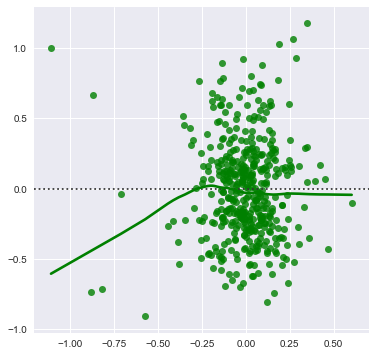

In [1248]:
# Residual Variance
y_hat = lm_log_2.predict(X)
sns.residplot(residuals, y_hat, lowess = True, color = 'g');

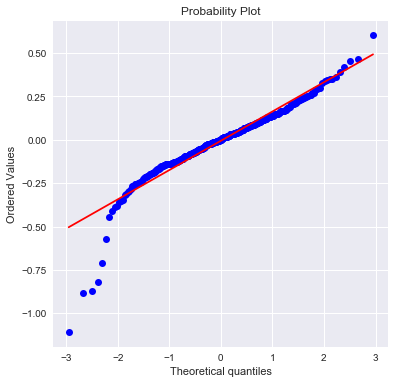

In [1249]:
# Residual Distribution
import scipy.stats as stats
import pylab
stats.probplot(residuals, dist = 'norm', plot = pylab);

We can safely say that our model is sound as all the assumptions are validated. We will now use this model to predict the values on the testing data set.

### 6. Predictions for the Test Dataset
#### 6.1 Cleaning test dataset

In [1251]:
df_train_x.shape

(1021, 49)

In [1260]:
cols_to_drop = list(set(test.columns).difference(set(df_train_x.columns)))
cols_to_drop.remove("Id")
test = test.drop(cols_to_drop, axis = 1)
test.shape

(1446, 47)

In [1261]:
list(set(df_train_x.columns).difference(set(test.columns)))

['OverallQual_Med', 'OverallQual_Low', 'const']

As can be seen, we need to add 3 more columns to the test dataset.

In [1265]:
test = sm.add_constant(test)
test['OverallQual_Med'], test['OverallQual_Low'] = 0, 0
test.shape

(1446, 50)

#### 6.2 Predictions

In [1271]:
predict = lm_log_2.predict(test.drop('Id', axis = 1))
result = pd.DataFrame({'Id': test['Id'],
                       'Sale Price': predict.apply(math.exp).apply(round)})
result.head(50)

,Id,Sale Price
0,1461,134003
1,1462,113130
2,1463,227001
3,1464,162470
4,1465,195826
5,1466,220449
6,1467,165296
7,1468,209465
8,1469,161873
9,1470,156845


#### --------------------------------- End of Markdown ---------------------------------
##### Thank You for reading